## Importing Libs

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
import highlight_text
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer import Pitch, VerticalPitch
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
#import soccerdata as sd
import re
from unidecode import unidecode
from scipy.spatial import ConvexHull
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import ax_text, fig_text


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import main
import visuals
import seaborn as sns
import requests
import utils
import os
%load_ext autoreload
%autoreload 2

pd.set_option("display.max_rows", None, "display.max_columns", None)
background = "#010b14"
text_color = 'black'
primary = '#C8102E'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [313]:
import matplotlib.font_manager as fm
from mplsoccer import FontManager

# Set the path to the locally downloaded font file
font_path = r'C:\Users\acer\Documents\GitHub\IndianCitizen\ScorePredict\Score Logos-20241022T100701Z-001\Score Logos\Sora_Font\Sora-Regular.ttf'

# Add the font to matplotlib
font_prop = fm.FontProperties(fname=font_path)

# You can now use this font in your plots
fm_sora = FontManager()
#fm_sora.prop = font_prop

print("Font loaded and registered successfully!")

Font loaded and registered successfully!


In [314]:
from sqlalchemy import create_engine
import psycopg2

# Database connection settings (replace with your credentials)
db_config = {
    'dbname': 'understat_shots_db',
    'user': 'ichadha',
    'password': 'ichadhapg',
    'host': 'localhost',
    'port': 5432,
}

# Create a connection engine
engine = create_engine(f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

## League Event Data

In [413]:
import glob
import os
import pandas as pd

# Specify the root directory containing all subfolders
root_folder = "D:/Scrape-Whoscored-Event-Data/data/laliga"

# Use glob to get all CSV file paths recursively from subdirectories
csv_files = glob.glob(os.path.join(root_folder, "**", "*.csv"), recursive=True)

# List to hold the DataFrames
dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    print(f"Reading: {file}")
    dfi = pd.read_csv(file)  # Read the CSV file
    dataframes.append(dfi)   # Append the DataFrame to the list

# Check if any CSV files were found
if dataframes:
    # Concatenate all DataFrames into a single DataFrame
    df = pd.concat(dataframes, ignore_index=True)
    print("All CSV files successfully merged into a single DataFrame.")
else:
    print("No CSV files found in the specified directory.")

Reading: D:/Scrape-Whoscored-Event-Data/data/laliga\laliga_events.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_149320\2444217362.py:17: DtypeWarning: Columns (37,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data/laliga\laliga_events2.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_149320\2444217362.py:17: DtypeWarning: Columns (37,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data/laliga\laliga_events3.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_149320\2444217362.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data/laliga\laliga_events4.csv
Reading: D:/Scrape-Whoscored-Event-Data/data/laliga\laliga_events5.csv
Reading: D:/Scrape-Whoscored-Event-Data/data/laliga\laliga_events6.csv
All CSV files successfully merged into a single DataFrame.


In [354]:
df['teamId'].unique()

array([  52,   41,   24,  587,  296,  607,   87,  129,  684,   37,   80,
         26,  361,  354,  304, 2783,  124,   44, 1706,   71,  167,   75,
        698,  103,   65,  248,   13,  300,  390, 2332, 7614,   63,  299,
        579,  256,   36], dtype=int64)

In [414]:
teams_dict = {
    65: 'Barcelona',
    63: 'Atletico Madrid',
    52: 'Real Madrid',
    53: 'Atletic Club',
    839: 'Villarreal',
    54: 'Real Betis',
    64: 'Rayo Vallecano',
    51: 'Mallorca',
    68: 'Real Sociedad',
    62: 'Celta Vigo',
    131: 'Osasuna',
    67: 'Sevilla',
    2783: 'Girona',
    819: 'Getafe',
    70: 'Espanyol',
    825: 'Leganes',
    838: 'Las Palmas',
    55 : 'Valencia',
    60 : 'Deportivo Alaves',
    58: 'Real Valladolid',
    13: 'Arsenal',
    161: 'Wolves',
    24: 'Aston Villa',
    211: 'Brighton',
    30: 'Tottenham',
    167: 'Man City',
    14: 'Leicester',
    18: 'Southampton',
    183: 'Bournemouth',
    26: 'Liverpool',
    23: 'Newcastle',
    15: 'Chelsea',
    174: 'Nottingham Forest',
    29: 'West Ham',
    32: 'Man Utd',
    170: 'Fulham',
    189: 'Brentford',
    162: 'Crystal Palace',
    31: 'Everton',
    165: 'Ipswich',
    37: 'Bayern Munich',
    36: 'Bayer Leverkusen',
    45: 'Eintracht Frankfurt',
    219: 'Mainz 05',
    50: 'Freiburg',
    7614: 'RB Leipzig',
    33: 'Wolfsburg',
    134: 'Borussia M.Gladbach',
    41: 'VfB Stuttgart',
    44: 'Borussia Dortmund',
    1730: 'Augsburg',
    42: 'Werder Bremen',
    1211: 'Hoffenheim',
    796: 'Union Berlin',
    283: 'St. Pauli',
    1206: 'Holstein Kiel',
    4852: 'FC Heidenheim',
    109: 'Bochum',
    75 : 'Inter',
    276 : 'Napoli',
    300 : 'Atalanta',
    87 : 'Juventus',
    77 : 'Lazio',
    71 : 'Bologna',
    73 : 'Fiorentina',
    84 : 'Roma',
    80 : 'AC Milan',
    86 : 'Udinese',
    72 : 'Torino',
    278 : 'Genoa',
    1290 : 'Como',
    76 : 'Verona',
    78 : 'Cagliari',
    79 : 'Lecce',
    24341 : 'Parma Calcio',
    272 : 'Empoli',
    85 : 'Venezia',
    269 : 'Monza',
    304 : 'PSG',
    249 : 'Marseille',
    613 : 'Nice',
    248 : 'Monaco',
    607 : 'Lille',
    228 : 'Lyon',
    148 : 'Strasbourg',
    246 : 'Toulouse',
    309 : 'Lens',
    2332 : 'Brest',
    313 : 'Rennes',
    308 : 'Auxerre',
    614 : 'Angers',
    302 : 'Nantes',
    950 : 'Reims',
    217 : 'Le Havre',
    145 : 'Saint-Etienne',
    311 : 'Montpellier',
    299 : 'Benfica',
    129 : 'PSV'
}

In [415]:
# temprary use of typeId of period column
df['period'] = df['period'].replace({'FirstHalf': 1, 'SecondHalf': 2, 'FirstPeriodOfExtraTime': 3, 'SecondPeriodOfExtraTime': 4,
                                     'PenaltyShootout': 5, 'PostGame': 14, 'PreMatch': 16})
# new column for cumulative minutes, This part is taken from the "jakeyk11.github.io" github repository and modified for my use
def cumulative_match_mins(events_df):
    events_out = pd.DataFrame()
    # Add cumulative time to events data, resetting for each unique match
    match_events = events_df.copy()
    match_events['cumulative_mins'] = match_events['minute'] + (1/60) * match_events['second']
    # Add time increment to cumulative minutes based on period of game.
    for period in np.arange(1, match_events['period'].max() + 1, 1):
        if period > 1:
            t_delta = match_events[match_events['period'] == period - 1]['cumulative_mins'].max() - \
                                   match_events[match_events['period'] == period]['cumulative_mins'].min()
        elif period == 1 or period == 5:
            t_delta = 0
        else:
            t_delta = 0
        match_events.loc[match_events['period'] == period, 'cumulative_mins'] += t_delta
    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events])
    return events_out

df = cumulative_match_mins(df)

# Extracting the carry data and merge it with the main df, This part is also taken from the "jakeyk11.github.io" github repository and modified for my use
def insert_ball_carries(events_df, min_carry_length=3, max_carry_length=60, min_carry_duration=1, max_carry_duration=10):
    events_out = pd.DataFrame()
    # Carry conditions (convert from metres to opta)
    min_carry_length = 3.0
    max_carry_length = 60.0
    min_carry_duration = 1.0
    max_carry_duration = 10.0
    # match_events = events_df[events_df['match_id'] == match_id].reset_index()
    match_events = events_df.reset_index()
    match_carries = pd.DataFrame()

    for idx, match_event in match_events.iterrows():

        if idx < len(match_events) - 1:
            prev_evt_team = match_event['teamId']
            next_evt_idx = idx + 1
            init_next_evt = match_events.loc[next_evt_idx]
            take_ons = 0
            incorrect_next_evt = True

            while incorrect_next_evt:

                next_evt = match_events.loc[next_evt_idx]

                if next_evt['type'] == 'TakeOn' and next_evt['outcomeType'] == 'Successful':
                    take_ons += 1
                    incorrect_next_evt = True

                elif ((next_evt['type'] == 'TakeOn' and next_evt['outcomeType'] == 'Unsuccessful')
                      or (next_evt['teamId'] != prev_evt_team and next_evt['type'] == 'Challenge' and next_evt['outcomeType'] == 'Unsuccessful')
                      or (next_evt['type'] == 'Foul')):
                    incorrect_next_evt = True

                else:
                    incorrect_next_evt = False

                next_evt_idx += 1

            # Apply some conditioning to determine whether carry criteria is satisfied
            same_team = prev_evt_team == next_evt['teamId']
            not_ball_touch = match_event['type'] != 'BallTouch'
            dx = 105*(match_event['endX'] - next_evt['x'])/100
            dy = 68*(match_event['endY'] - next_evt['y'])/100
            far_enough = dx ** 2 + dy ** 2 >= min_carry_length ** 2
            not_too_far = dx ** 2 + dy ** 2 <= max_carry_length ** 2
            dt = 60 * (next_evt['cumulative_mins'] - match_event['cumulative_mins'])
            min_time = dt >= min_carry_duration
            same_phase = dt < max_carry_duration
            same_period = match_event['period'] == next_evt['period']

            valid_carry = same_team & not_ball_touch & far_enough & not_too_far & min_time & same_phase &same_period

            if valid_carry:
                carry = pd.DataFrame()
                prev = match_event
                nex = next_evt

                carry.loc[0, 'eventId'] = prev['eventId'] + 0.5
                carry['minute'] = np.floor(((init_next_evt['minute'] * 60 + init_next_evt['second']) + (
                        prev['minute'] * 60 + prev['second'])) / (2 * 60))
                carry['second'] = (((init_next_evt['minute'] * 60 + init_next_evt['second']) +
                                    (prev['minute'] * 60 + prev['second'])) / 2) - (carry['minute'] * 60)
                carry['teamId'] = nex['teamId']
                carry['x'] = prev['endX']
                carry['y'] = prev['endY']
                carry['expandedMinute'] = np.floor(((init_next_evt['expandedMinute'] * 60 + init_next_evt['second']) +
                                                    (prev['expandedMinute'] * 60 + prev['second'])) / (2 * 60))
                carry['period'] = nex['period']
                carry['type'] = carry.apply(lambda x: {'value': 99, 'displayName': 'Carry'}, axis=1)
                carry['outcomeType'] = 'Successful'
                carry['qualifiers'] = carry.apply(lambda x: {'type': {'value': 999, 'displayName': 'takeOns'}, 'value': str(take_ons)}, axis=1)
                carry['satisfiedEventsTypes'] = carry.apply(lambda x: [], axis=1)
                carry['isTouch'] = True
                carry['playerId'] = nex['playerId']
                carry['endX'] = nex['x']
                carry['endY'] = nex['y']
                carry['blockedX'] = np.nan
                carry['blockedY'] = np.nan
                carry['goalMouthZ'] = np.nan
                carry['goalMouthY'] = np.nan
                carry['isShot'] = np.nan
                carry['relatedEventId'] = nex['eventId']
                carry['relatedPlayerId'] = np.nan
                carry['isGoal'] = np.nan
                carry['cardType'] = np.nan
                carry['isOwnGoal'] = np.nan
                carry['type'] = 'Carry'
                carry['cumulative_mins'] = (prev['cumulative_mins'] + init_next_evt['cumulative_mins']) / 2
                carry['playerName'] = nex['playerName']

                match_carries = pd.concat([match_carries, carry], ignore_index=True, sort=False)

    match_events_and_carries = pd.concat([match_carries, match_events], ignore_index=True, sort=False)
    match_events_and_carries = match_events_and_carries.sort_values(['period', 'cumulative_mins']).reset_index(drop=True)

    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events_and_carries])

    return events_out

df = insert_ball_carries(df, min_carry_length=3, max_carry_length=60, min_carry_duration=1, max_carry_duration=10)

df = df.reset_index(drop=True)
df['index'] = range(1, len(df) + 1)
df = df[['index'] + [col for col in df.columns if col != 'index']]

In [416]:
print(list(df.columns))

['index', 'eventId', 'minute', 'second', 'teamId', 'x', 'y', 'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers', 'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY', 'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY', 'isShot', 'relatedEventId', 'relatedPlayerId', 'isGoal', 'cardType', 'isOwnGoal', 'cumulative_mins', 'playerName', 'Unnamed: 0', 'id', 'h_a', 'matchId', 'startDate', 'startTime', 'score', 'ftScore', 'htScore', 'etScore', 'venueName', 'maxMinute', 'shotBodyType', 'situation', 'shotSixYardBox', 'shotPenaltyArea', 'shotOboxTotal', 'shotOpenPlay', 'shotCounter', 'shotSetPiece', 'shotDirectCorner', 'shotOffTarget', 'shotOnPost', 'shotOnTarget', 'shotsTotal', 'shotBlocked', 'shotRightFoot', 'shotLeftFoot', 'shotHead', 'shotObp', 'goalSixYardBox', 'goalPenaltyArea', 'goalObox', 'goalOpenPlay', 'goalCounter', 'goalSetPiece', 'penaltyScored', 'goalOwn', 'goalNormal', 'goalRightFoot', 'goalLeftFoot', 'goalHead', 'goalObp', 'shortPassInaccurate', 'shortPassAcc

In [417]:
df = df.sort_values(by='matchId')

In [418]:
# Assign xT values
df_base  = df
dfxT = df_base.copy()
dfxT['qualifiers'] = dfxT['qualifiers'].astype(str)
dfxT = dfxT[(~dfxT['qualifiers'].str.contains('Corner'))]
dfxT = dfxT[(dfxT['type'].isin(['Pass', 'Carry'])) & (dfxT['outcomeType']=='Successful')]


xT = pd.read_csv('https://raw.githubusercontent.com/mckayjohns/youtube-videos/main/data/xT_Grid.csv', header=None) # use this if you don't have your own xT value Grid
# xT = pd.read_csv("/content/xT_Grid.csv", header=None)    # use this if you have your own xT value Grid, then place your file path here
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

dfxT['x1_bin_xT'] = pd.cut(dfxT['x'], bins=xT_cols, labels=False)
dfxT['y1_bin_xT'] = pd.cut(dfxT['y'], bins=xT_rows, labels=False)
dfxT['x2_bin_xT'] = pd.cut(dfxT['endX'], bins=xT_cols, labels=False)
dfxT['y2_bin_xT'] = pd.cut(dfxT['endY'], bins=xT_rows, labels=False)

dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)

dfxT['xT'] = dfxT['end_zone_value_xT'] - dfxT['start_zone_value_xT']
columns_to_drop = ['eventId', 'minute', 'second', 'teamId', 'x', 'y', 'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers', 'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY', 'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY', 'isShot', 'relatedEventId', 'relatedPlayerId', 'isGoal', 'cardType', 'isOwnGoal', 'cumulative_mins', 'Unnamed: 0', 'id', 'h_a', 'matchId', 'startDate', 'startTime', 'score', 'ftScore', 'htScore', 'etScore', 'venueName', 'maxMinute', 'playerName', 'shotBodyType', 'situation', 'shotSixYardBox', 'shotPenaltyArea', 'shotOboxTotal', 'shotOpenPlay', 'shotCounter', 'shotSetPiece', 'shotDirectCorner', 'shotOffTarget', 'shotOnPost', 'shotOnTarget', 'shotsTotal', 'shotBlocked', 'shotRightFoot', 'shotLeftFoot', 'shotHead', 'shotObp', 'goalSixYardBox', 'goalPenaltyArea', 'goalObox', 'goalOpenPlay', 'goalCounter', 'goalSetPiece', 'penaltyScored', 'goalOwn', 'goalNormal', 'goalRightFoot', 'goalLeftFoot', 'goalHead', 'goalObp', 'shortPassInaccurate', 'shortPassAccurate', 'passCorner', 'passCornerAccurate', 'passCornerInaccurate', 'passFreekick', 'passBack', 'passForward', 'passLeft', 'passRight', 'keyPassLong', 'keyPassShort', 'keyPassCross', 'keyPassCorner', 'keyPassThroughball', 'keyPassFreekick', 'keyPassThrowin', 'keyPassOther', 'assistCross', 'assistCorner', 'assistThroughball', 'assistFreekick', 'assistThrowin', 'assistOther', 'dribbleLost', 'dribbleWon', 'challengeLost', 'interceptionWon', 'clearanceHead', 'outfielderBlock', 'passCrossBlockedDefensive', 'outfielderBlockedPass', 'offsideGiven', 'offsideProvoked', 'foulGiven', 'foulCommitted', 'yellowCard', 'voidYellowCard', 'secondYellow', 'redCard', 'turnover', 'dispossessed', 'saveLowLeft', 'saveHighLeft', 'saveLowCentre', 'saveHighCentre', 'saveLowRight', 'saveHighRight', 'saveHands', 'saveFeet', 'saveObp', 'saveSixYardBox', 'savePenaltyArea', 'saveObox', 'keeperDivingSave', 'standingSave', 'closeMissHigh', 'closeMissHighLeft', 'closeMissHighRight', 'closeMissLeft', 'closeMissRight', 'shotOffTargetInsideBox', 'touches', 'assist', 'ballRecovery', 'clearanceEffective', 'clearanceTotal', 'clearanceOffTheLine', 'dribbleLastman', 'errorLeadsToGoal', 'errorLeadsToShot', 'intentionalAssist', 'interceptionAll', 'interceptionIntheBox', 'keeperClaimHighLost', 'keeperClaimHighWon', 'keeperClaimLost', 'keeperClaimWon', 'keeperOneToOneWon', 'parriedDanger', 'parriedSafe', 'collected', 'keeperPenaltySaved', 'keeperSaveInTheBox', 'keeperSaveTotal', 'keeperSmother', 'keeperSweeperLost', 'keeperMissed', 'passAccurate', 'passBackZoneInaccurate', 'passForwardZoneAccurate', 'passInaccurate', 'passAccuracy', 'cornerAwarded', 'passKey', 'passChipped', 'passCrossAccurate', 'passCrossInaccurate', 'passLongBallAccurate', 'passLongBallInaccurate', 'passThroughBallAccurate', 'passThroughBallInaccurate', 'passThroughBallInacurate', 'passFreekickAccurate', 'passFreekickInaccurate', 'penaltyConceded', 'penaltyMissed', 'penaltyWon', 'passRightFoot', 'passLeftFoot', 'passHead', 'sixYardBlock', 'tackleLastMan', 'tackleLost', 'tackleWon', 'cleanSheetGK', 'cleanSheetDL', 'cleanSheetDC', 'cleanSheetDR', 'cleanSheetDML', 'cleanSheetDMC', 'cleanSheetDMR', 'cleanSheetML', 'cleanSheetMC', 'cleanSheetMR', 'cleanSheetAML', 'cleanSheetAMC', 'cleanSheetAMR', 'cleanSheetFWL', 'cleanSheetFW', 'cleanSheetFWR', 'cleanSheetSub', 'goalConcededByTeamGK', 'goalConcededByTeamDL', 'goalConcededByTeamDC', 'goalConcededByTeamDR', 'goalConcededByTeamDML', 'goalConcededByTeamDMC', 'goalConcededByTeamDMR', 'goalConcededByTeamML', 'goalConcededByTeamMC', 'goalConcededByTeamMR', 'goalConcededByTeamAML', 'goalConcededByTeamAMC', 'goalConcededByTeamAMR', 'goalConcededByTeamFWL', 'goalConcededByTeamFW', 'goalConcededByTeamFWR', 'goalConcededByTeamSub', 'goalConcededOutsideBoxGoalkeeper', 'goalScoredByTeamGK', 'goalScoredByTeamDL', 'goalScoredByTeamDC', 'goalScoredByTeamDR', 'goalScoredByTeamDML', 'goalScoredByTeamDMC', 'goalScoredByTeamDMR', 'goalScoredByTeamML', 'goalScoredByTeamMC', 'goalScoredByTeamMR', 'goalScoredByTeamAML', 'goalScoredByTeamAMC', 'goalScoredByTeamAMR', 'goalScoredByTeamFWL', 'goalScoredByTeamFW', 'goalScoredByTeamFWR', 'goalScoredByTeamSub', 'aerialSuccess', 'duelAerialWon', 'duelAerialLost', 'offensiveDuel', 'defensiveDuel', 'bigChanceMissed', 'bigChanceScored', 'bigChanceCreated', 'overrun', 'successfulFinalThirdPasses', 'punches', 'penaltyShootoutScored', 'penaltyShootoutMissedOffTarget', 'penaltyShootoutSaved', 'penaltyShootoutSavedGK', 'penaltyShootoutConcededGK', 'throwIn', 'subOn', 'subOff', 'defensiveThird', 'midThird', 'finalThird', 'pos']
dfxT.drop(columns=columns_to_drop, inplace=True)

df = df.merge(dfxT, on='index', how='left')

# New Column for Team Names and Oppositon TeamNames
df['teamName'] = df['teamId'].map(teams_dict)
team_names = list(teams_dict.values())
#opposition_dict = {team_names[i]: team_names[1-i] for i in range(len(team_names))}
#df['oppositionTeamName'] = df['teamName'].map(opposition_dict)

# Reshaping the data from 100x100 to 105x68, as I use the pitch_type='uefa', in the pitch function, you can consider according to your use
df['x'] = df['x']*1.05
df['y'] = df['y']*0.68
df['endX'] = df['endX']*1.05
df['endY'] = df['endY']*0.68
df['goalMouthY'] = df['goalMouthY']*0.68

df['qualifiers'] = df['qualifiers'].astype(str)
# Calculating passing distance, to find out progressive pass, this will just show the distance reduced by a pass, then will be able to filter passes which has reduced distance value more than 10yds as a progressive pass
df['prog_pass'] = np.where((df['type'] == 'Pass'),
                           np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['endX'])**2 + (34 - df['endY'])**2), 0)
# Calculating carrying distance, to find out progressive carry, this will just show the distance reduced by a carry, then will be able to filter carries which has reduced distance value more than 10yds as a progressive carry
df['prog_carry'] = np.where((df['type'] == 'Carry'),
                            np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['endX'])**2 + (34 - df['endY'])**2), 0)
df['pass_or_carry_angle'] = np.degrees(np.arctan2(df['endY'] - df['y'], df['endX'] - df['x']))

# Making all the alphabets in the name as English Alphabets only (for example: Á will be replaced by A)
df['playerName'] = df['playerName'].astype(str)
df['playerName'] = df['playerName'].apply(unidecode)

# Function to extract short names
def get_short_name(full_name):
    if pd.isna(full_name):
        return full_name
    parts = full_name.split()
    if len(parts) == 1:
        return full_name  # No need for short name if there's only one word
    elif len(parts) == 2:
        return parts[0][0] + ". " + parts[1]
    else:
        return parts[0][0] + ". " + parts[1][0] + ". " + " ".join(parts[2:])

# Applying the function to create 'shortName' column
df['shortName'] = df['playerName'].apply(get_short_name)

df['qualifiers'] = df['qualifiers'].astype(str)
columns_to_drop2 = ['id']
df.drop(columns=columns_to_drop2, inplace=True)

df['period'] = df['period'].replace({1: 'FirstHalf', 2: 'SecondHalf', 3: 'FirstPeriodOfExtraTime', 4: 'SecondPeriodOfExtraTime',
                                     5: 'PenaltyShootout', 14: 'PostGame', 16: 'PreMatch'})

C:\Users\acer\AppData\Local\Temp\ipykernel_149320\539181666.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
C:\Users\acer\AppData\Local\Temp\ipykernel_149320\539181666.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)


In [147]:
# Define league mapping based on teamId ranges
league_mapping = {
    'La Liga': list(teams_dict.keys())[:20],
    'Premier League': list(teams_dict.keys())[20:40],
    'Bundesliga': list(teams_dict.keys())[40:58],
    'Serie A': list(teams_dict.keys())[58:78],
    'Ligue 1': list(teams_dict.keys())[78:],
}

# Function to assign league based on teamId
def get_league(team_id):
    for league, team_ids in league_mapping.items():
        if team_id in team_ids:
            return league
    return "Unknown"  # Handle unmapped teamIds

# Apply function to create a new 'league' column
df['league'] = df['teamId'].apply(get_league)

# Verify the results
df[['teamId', 'teamName', 'league']].head()


teamId teamName          league
1071085     170   Fulham  Premier League
1070932     170   Fulham  Premier League
1070933     170   Fulham  Premier League
1070934     170   Fulham  Premier League
1070935     170   Fulham  Premier League

## Shot of the Week

### Creating DataFrame

### Top 5 Leagues

In [326]:
goal_low_xg = """select round("xG" :: numeric ,4) xg,"result",player,situation,h_team,a_team,league,h_a,"minute",date,player_assisted,"lastAction","X","Y"
from understat_shots_tb
where "date" > current_date - 7
and "result" = 'Goal' and "xG" > 0
order by "xG" 
limit 1;"""

with engine.connect() as conn:
    df_goal_low_xg = pd.read_sql(goal_low_xg, conn)

In [327]:
df_goal_low_xg

xg result           player situation      h_team         a_team  \
0  0.0108   Goal  Haris Tabakovic  OpenPlay  Hoffenheim  FC Heidenheim   

       league h_a  minute                date   player_assisted lastAction  \
0  Bundesliga   h      33 2025-03-09 16:30:00  Valentin Gendrey     Aerial   

       X      Y  
0  0.957  0.681

In [328]:
df_goal_low_xg['xGOT'] = 0.03
#df_goal_low_xg['score'] = '5:1'
#df_goal_low_xg['venueName'] = 'Thomas Léonard'
#df_goal_low_xg['second']

In [329]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://1xbet.whoscored.com/matches/1834401/live/germany-bundesliga-2024-2025-hoffenheim-fc-heidenheim"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: Germany, League: Bundesliga, Season: 2024/2025, Match Id: 1834401


In [330]:
events_df['playerName'].unique()

array([nan, 'Diadié Samassékou', 'Arthur Chaves', 'Oliver Baumann',
       'Benedikt Gimber', 'Haris Tabakovic', 'Gift Orban',
       'Valentin Gendrey', 'Finn Becker', 'Leo Østigård', 'Omar Traoré',
       'Pavel Kaderábek', 'Tom Bischof', 'Jan Schöppner',
       'Tim Siersleben', 'Marnon Busch', 'Marvin Pieringer',
       'Andrej Kramaric', 'Mathias Honsak', 'Adrian Beck',
       'Kevin Akpoguma', 'Patrick Mainka', 'Niklas Dorsch',
       'Kevin Müller', 'Budu Zivzivadze', 'Dennis Geiger', 'Paul Wanner',
       'Bazoumana Touré', 'Sirlord Conteh'], dtype=object)

In [331]:
events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Haris Tabakovic')]

id  eventId  minute  second  teamId h_a     x     y  \
531  2.786271e+09      333      33     1.0    1211   h  94.5  68.7   

     expandedMinute     period  type outcomeType  \
531              33  FirstHalf  Goal  Successful   

                                            qualifiers  \
531  [{'type': 'Zone', 'value': 'Center'}, {'type':...   

                                  satisfiedEventsTypes  isTouch  matchId  \
531  [touches, goalNormal, shotOnTarget, shotsTotal...     True  1834401   

               startDate            startTime  score ftScore htScore etScore  \
531  2025-03-09T00:00:00  2025-03-09T16:30:00  1 : 1   1 : 1   1 : 0           

         venueName  maxMinute playerId       playerName  endX  endY  \
531  PreZero Arena         96   119642  Haris Tabakovic   NaN   NaN   

     relatedEventId  relatedPlayerId cardType  goalMouthZ  goalMouthY  isShot  \
531           331.0         380637.0    False         5.1        47.4    True   

     blockedX  blockedY  isGoal shotBodyType situation  shotSixYardBox  \
531       NaN       NaN    True         Head       NaN           False   

     shotPenaltyArea  shotOboxTotal  shotOpenPlay  shotCounter  shotSetPiece  \
531             True          False         False        False          True   

     shotDirectCorner  shotOffTarget  shotOnPost  shotOnTarget  shotsTotal  \
531             False          False       False          True        True   

     shotBlocked  shotRightFoot  shotLeftFoot  shotHead  shotObp  \
531        False          False         False      True    False   

     goalSixYardBox  goalPenaltyArea  goalObox  goalOpenPlay  goalCounter  \
531           False             True     False         False        False   

     goalSetPiece  penaltyScored  goalOwn  goalNormal  goalRightFoot  \
531          True          False    False        True          False   

     goalLeftFoot  goalHead  goalObp  shortPassInaccurate  shortPassAccurate  \
531         False      True    False                False              False   

     passCorner  passCornerAccurate  passCornerInaccurate  passFreekick  \
531       False               False                 False         False   

     passBack  passForward  passLeft  passRight  keyPassLong  keyPassShort  \
531     False        False     False      False        False         False   

     keyPassCross  keyPassCorner  keyPassThroughball  keyPassFreekick  \
531         False          False               False            False   

     keyPassThrowin  keyPassOther  assistCross  assistCorner  \
531           False         False        False         False   

     assistThroughball  assistFreekick  assistThrowin  assistOther  \
531              False           False          False        False   

     dribbleLost  dribbleWon  challengeLost  interceptionWon  clearanceHead  \
531        False       False          False            False          False   

     outfielderBlock  passCrossBlockedDefensive  outfielderBlockedPass  \
531            False                      False                  False   

     offsideGiven  offsideProvoked  foulGiven  foulCommitted  yellowCard  \
531         False            False      False          False       False   

     voidYellowCard  secondYellow  redCard  turnover  dispossessed  \
531           False         False    False     False         False   

     saveLowLeft  saveHighLeft  saveLowCentre  saveHighCentre  saveLowRight  \
531        False         False          False           False         False   

     saveHighRight  saveHands  saveFeet  saveObp  saveSixYardBox  \
531          False      False     False    False           False   

     savePenaltyArea  saveObox  keeperDivingSave  standingSave  closeMissHigh  \
531            False     False             False         False          False   

     closeMissHighLeft  closeMissHighRight  closeMissLeft  closeMissRight  \
531              False               False          False           False   

     shotOffTargetInsideBo

In [332]:
player = 'Haris Tabakovic'
df_goal_low_xg['goalMouthZ'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['goalMouthZ'].iloc[0]
df_goal_low_xg['goalMouthY'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['goalMouthY'].iloc[0]
df_goal_low_xg['second'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['second'].iloc[0]
df_goal_low_xg['score'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['score'].iloc[0]
df_goal_low_xg['venueName'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['venueName'].iloc[0]

### UCL

In [3]:
import requests
import pandas as pd

# Define the range of match IDs
match_ids = [12763958, 12764006, 12764059,12764152,12764084,12764222,
            12764241,12764271,12764277,12764296,12764332,12764399,
            12764448,12764504,12764494,12764165,12764517,12764530]  # Replace with your match ID range

# Initialize an empty list to store shot data
all_shots = []

# Loop through each match ID
for match_id in match_ids:
    url = f'https://www.sofascore.com/api/v1/event/{match_id}/shotmap'
    
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        
        data = response.json()
        
        # Check if 'shotmap' exists and is a list
        if 'shotmap' in data and isinstance(data['shotmap'], list):
            shotmap_data = data['shotmap']
            
            # Normalize and add match ID for reference
            df = pd.json_normalize(shotmap_data, sep='_')
            df['matchId'] = match_id  # Add match ID as a column
            
            all_shots.append(df)  # Store DataFrame in list

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for match {match_id}: {e}")

# Combine all match data into a single DataFrame
if all_shots:
    final_df = pd.concat(all_shots, ignore_index=True)
else:
    final_df = pd.DataFrame()  # Empty DataFrame if no data found

In [6]:
df = final_df.drop(columns = ['draw_start_x', 'draw_start_y', 'draw_end_x',
       'draw_end_y', 'draw_goal_x', 'draw_goal_y', 'blockCoordinates_x',
       'blockCoordinates_y', 'blockCoordinates_z', 'draw_block_x',
       'draw_block_y', 'player_fieldTranslations_nameTranslation_ar',
       'player_fieldTranslations_nameTranslation_hi',
       'player_fieldTranslations_nameTranslation_bn',
       'player_fieldTranslations_shortNameTranslation_ar',
       'player_fieldTranslations_shortNameTranslation_hi',
       'player_fieldTranslations_shortNameTranslation_bn'],axis=1)

In [15]:
df[df['shotType'] == 'goal'].sort_values(by='xg', ascending=True).head(1)

isHome shotType goalType situation   bodyPart goalMouthLocation  \
268    True     goal  regular    corner  left-foot         low-right   

           xg      xgot       id  time  addedTime  timeSeconds  \
268  0.019988  0.295599  4347641    52        NaN         3362   

     reversedPeriodTime  reversedPeriodTimeSeconds incidentType  player_name  \
268                  34                       2038         shot  Angel Gomes   

    player_firstName player_lastName  player_slug player_shortName  \
268              NaN             NaN  angel-gomes         A. Gomes   

    player_position player_jerseyNumber  player_userCount  player_id  \
268               M                   8              2938     867441   

     playerCoordinates_x  playerCoordinates_y  playerCoordinates_z  \
268             2.416488            18.082825                    0   

     goalMouthCoordinates_x  goalMouthCoordinates_y  goalMouthCoordinates_z  \
268                       0               44.760042                    12.7   

      matchId  
268  12764296

In [17]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://1xbet.whoscored.com/matches/1866206/live/europe-champions-league-2024-2025-lille-feyenoord"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: Europe, League: Champions League, Season: 2024/2025, Match Id: 1866206


In [18]:
events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Angel Gomes')]

id  eventId  minute  second  teamId h_a     x     y  \
865  2.770264e+09      906      56     2.0     607   h  96.4  68.7   

     expandedMinute      period  type outcomeType  \
865              63  SecondHalf  Goal  Successful   

                                            qualifiers  \
865  [{'type': 'FromCorner'}, {'type': 'LeftFoot'},...   

                                  satisfiedEventsTypes  isTouch  matchId  \
865  [touches, goalNormal, shotOnTarget, shotsTotal...     True  1866206   

               startDate            startTime  score ftScore htScore etScore  \
865  2025-01-29T00:00:00  2025-01-29T20:00:00  6 : 1   6 : 1   2 : 1           

                                 venueName  maxMinute playerId   playerName  \
865  Decathlon Arena - Stade Pierre-Mauroy         93   338497  Angel Gomes   

     endX  endY  relatedEventId  relatedPlayerId  goalMouthZ  goalMouthY  \
865   NaN   NaN           576.0         352830.0        12.7        45.8   

     isShot  isGoal  blockedX  blockedY isOwnGoal cardType shotBodyType  \
865    True    True       NaN       NaN       NaN    False     LeftFoot   

      situation  shotSixYardBox  shotPenaltyArea  shotOboxTotal  shotOpenPlay  \
865  FromCorner           False             True          False         False   

     shotCounter  shotSetPiece  shotDirectCorner  shotOffTarget  shotOnPost  \
865        False          True             False          False       False   

     shotOnTarget  shotsTotal  shotBlocked  shotRightFoot  shotLeftFoot  \
865          True        True        False          False          True   

     shotHead  shotObp  goalSixYardBox  goalPenaltyArea  goalObox  \
865     False    False           False             True     False   

     goalOpenPlay  goalCounter  goalSetPiece  penaltyScored  goalOwn  \
865         False        False          True          False    False   

     goalNormal  goalRightFoot  goalLeftFoot  goalHead  goalObp  \
865        True          False          True     False    False   

     shortPassInaccurate  shortPassAccurate  passCorner  passCornerAccurate  \
865                False              False       False               False   

     passCornerInaccurate  passFreekick  passBack  passForward  passLeft  \
865                 False         False     False        False     False   

     passRight  keyPassLong  keyPassShort  keyPassCross  keyPassCorner  \
865      False        False         False         False          False   

     keyPassThroughball  keyPassFreekick  keyPassThrowin  keyPassOther  \
865               False            False           False         False   

     assistCross  assistCorner  assistThroughball  assistFreekick  \
865        False         False              False           False   

     assistThrowin  assistOther  dribbleLost  dribbleWon  challengeLost  \
865          False        False        False       False          False   

     interceptionWon  clearanceHead  outfielderBlock  \
865            False          False            False   

     passCrossBlockedDefensive  outfielderBlockedPass  offsideGiven  \
865                      False                  False         False   

     offsideProvoked  foulGiven  foulCommitted  yellowCard  voidYellowCard  \
865            False      False          False       False           False   

     secondYellow  redCard  turnover  dispossessed  saveLowLeft  saveHighLeft  \
865         False    False     False         False        False         False   

     saveLowCentre  saveHighCentre  saveLowRight  saveHighRight  saveHands  \
865          False           False         False          False      False   

     saveFeet  saveObp  saveSixYardBox  savePenaltyArea  saveObox  \
865     False    False           False            False     False   

     keeperDivingSave  standingSave  closeMissHigh  closeMissHighLeft  \
865             False         False          False              False   

     closeMissHighRight  closeMissLeft  closeMissRight  \
865 

In [31]:
player = 'Angel Gomes'
df_goal_low_xg = df[df['shotType'] == 'goal'].sort_values(by='xg', ascending=True).head(1)
#df_goal_low_xg['goalMouthZ'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['goalMouthZ'].iloc[0]
#df_goal_low_xg['goalMouthY'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['goalMouthY'].iloc[0]
df_goal_low_xg['second'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['second'].iloc[0]
df_goal_low_xg['score'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['score'].iloc[0]
df_goal_low_xg['venueName'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['venueName'].iloc[0]
df_goal_low_xg['date'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['startDate'].iloc[0]
df_goal_low_xg['date'] = df_goal_low_xg['date'].str.split('T').str[0]

In [20]:
df_goal_low_xg.columns

Index(['isHome', 'shotType', 'goalType', 'situation', 'bodyPart',
       'goalMouthLocation', 'xg', 'xgot', 'id', 'time', 'addedTime',
       'timeSeconds', 'reversedPeriodTime', 'reversedPeriodTimeSeconds',
       'incidentType', 'player_name', 'player_firstName', 'player_lastName',
       'player_slug', 'player_shortName', 'player_position',
       'player_jerseyNumber', 'player_userCount', 'player_id',
       'playerCoordinates_x', 'playerCoordinates_y', 'playerCoordinates_z',
       'goalMouthCoordinates_x', 'goalMouthCoordinates_y',
       'goalMouthCoordinates_z', 'matchId', 'second', 'score', 'venueName'],
      dtype='object')

### Plotting

In [333]:
df_goal_low_xg

xg result           player situation      h_team         a_team  \
0  0.0108   Goal  Haris Tabakovic  OpenPlay  Hoffenheim  FC Heidenheim   

       league h_a  minute                date   player_assisted lastAction  \
0  Bundesliga   h      33 2025-03-09 16:30:00  Valentin Gendrey     Aerial   

       X      Y  xGOT  goalMouthZ  goalMouthY  second  score      venueName  
0  0.957  0.681  0.03         5.1        47.4     1.0  1 : 1  PreZero Arena

In [11]:
df_goal_low_xg['date'].iloc[0].date()

datetime.date(2025, 2, 15)

In [45]:
df_goal_low_xg['X'] = 100 - df_goal_low_xg['playerCoordinates_x']
df_goal_low_xg['Y'] = 100 - df_goal_low_xg['playerCoordinates_y']
df_goal_low_xg['h_team'] = 'Lille'
df_goal_low_xg['a_team'] = 'Feyenoord'
df_goal_low_xg['league'] = 'UCL'
df_goal_low_xg['minute'] = df_goal_low_xg['time']
df_goal_low_xg['player'] = df_goal_low_xg['player_name']
df_goal_low_xg['player_assisted'] = 'None'
df_goal_low_xg['lastAction'] = 'Pass'

In [349]:
def plot_goal_low_xg(df):
    teamcolor = '#0057a3'
    #background = 'green'
    df['X'] = (df['X'] / 100) * 105 * 100
    df['Y'] = (df['Y'] / 100) * 68 * 100
    
    pitch = VerticalPitch(
    pitch_type='uefa',
    goal_type = 'box',
    half=True, 
    pitch_color=background, 
    stripe=False,
    pad_bottom=.5, 
    line_color='white',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(9, 12))
    fig.patch.set_facecolor(background)

    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
        x=0.29, 
        y=.9, 
        s='Shot Of The Week', 
        fontsize=28, 
        fontproperties=font_prop,  
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.37, 
        y=0.6, 
        s=f"Match - {df['h_team'].iloc[0]} v {df['a_team'].iloc[0]} ({df['league'].iloc[0]})", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white',
        ha='center'
    )

    ax1.text(
        x=0.21, 
        y=0.4, 
        s=f"Date - {df['date'].iloc[0].date()}",
        #s=f"Date - {df['date'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )
    
    ax1.text(
        x=0.815, 
        y=.6, 
        s=f"Time - {df['minute'].iloc[0]} : {df['second'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.25, 
        y=.2, 
        s=f"Player - {df['player'].iloc[0]} ({df['h_a'].iloc[0]})", 
        fontsize=15,
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center'
    )

    ax1.text(
        x=0.8, 
        y=.4, 
        s=f"Final Score - {df['score'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

    ax_image = add_image(
        logo, fig, left=0.82, bottom=0.85, width=0.08, height=0.08,aspect='equal'
    )
    

    ax1.set_axis_off()

    
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)

    pitch.scatter(
        df['X'].iloc[0], 
        df['Y'].iloc[0], 
        s=40000 * df['xg'].iloc[0], 
        c=background,
        marker='football',
        ax=ax2,
        alpha=.7,
        linewidths=.8,
        edgecolors=teamcolor
    )
    pitch.annotate(f"xG - {round(df['xg'].iloc[0],3)}",
        xy=(df['X'].iloc[0]-15,df['Y'].iloc[0]+7),
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center', va='center',
        ax=ax2
    )
    pitch.annotate(f"xGOT - {round(df['xGOT'].iloc[0],3)}",
        xy=(df['X'].iloc[0]-18,df['Y'].iloc[0]+7),
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center', va='center',
        ax=ax2
    )

    pitch.annotate(f"Situation - {df['situation'].iloc[0]}",
        xy=(df['X'].iloc[0]-21,df['Y'].iloc[0]+7),
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center', va='center',
        ax=ax2
    )

    pitch.arrows(
        df['X'].iloc[0], df['Y'].iloc[0],105,35,
        width=1.5,alpha=0.8,zorder=3,
        headwidth=8, headlength=10, color='white',
        ax=ax2
    )

    

        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, 0.2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)
    
    ax3.text(
        x=0.1, 
        y=0, 
        s=f"Assisted By : {df['player_assisted'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.7, 
        y=0, 
        s=f"Last Action : {df['lastAction'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )
    

    ax3.set_axis_off()

    plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/ShotOfTheWeek.png',dpi=500,bbox_inches = 'tight',facecolor=background)


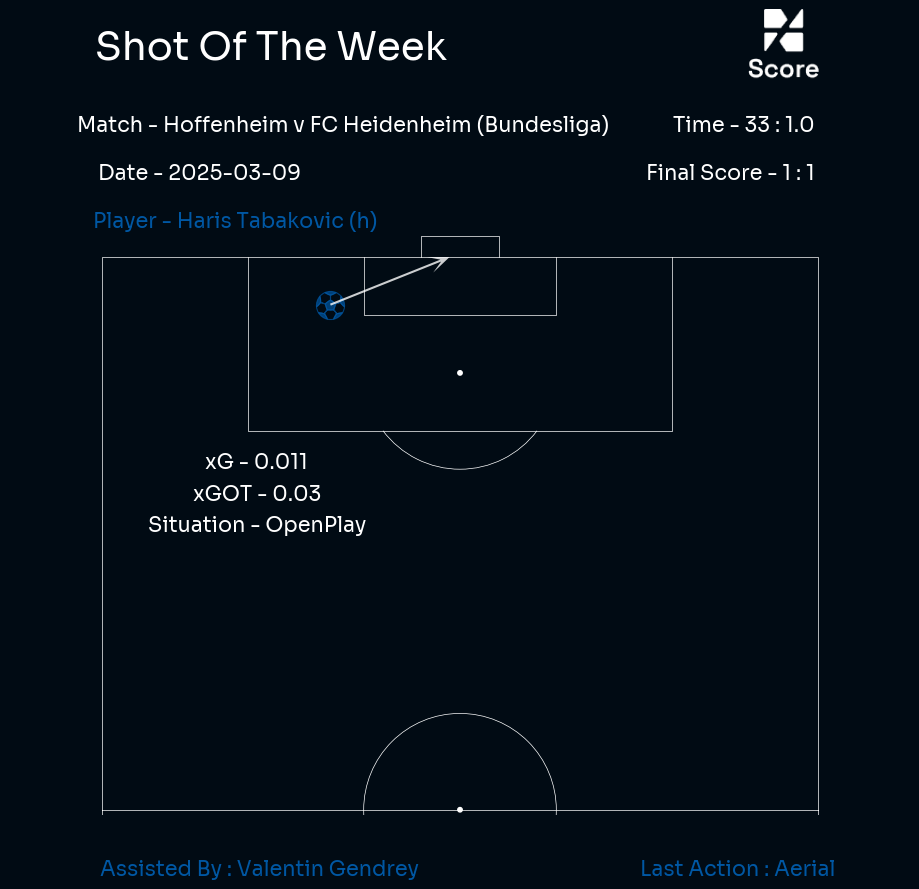

In [350]:
df_goal_low_xg1 = df_goal_low_xg.copy()
plot_goal_low_xg(df_goal_low_xg1)

## Miss of the Week

### Creating DataFrame

In [351]:
miss_high_xg = """select round("xG" :: numeric ,4) xg,"result",player,situation,h_team,a_team,league,h_a,"minute",date,player_assisted,"lastAction","X","Y"
from understat_shots_tb
where "date" > current_date - 7
and "result" != 'Goal' and situation != 'Penalty'
order by "xG" desc 
limit 1;"""

with engine.connect() as conn:
    df_miss_high_xg = pd.read_sql(miss_high_xg, conn)

In [32]:
#df_miss_high_xg = df[df['shotType'] != 'Goal'].sort_values(by='xg', ascending=False).head(1)

In [412]:
df_miss_high_xg

xg     result           player situation    h_team    a_team   league  \
0  0.75  SavedShot  Ademola Lookman  OpenPlay  Juventus  Atalanta  Serie_A   

  h_a  minute                date player_assisted lastAction      X      Y  
0   a      45 2025-03-09 19:45:00            None    Rebound  0.951  0.489

In [240]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://1xbet.whoscored.com/matches/1824845/live/france-ligue-1-2024-2025-saint-etienne-nice"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: France, League: Ligue 1, Season: 2024/2025, Match Id: 1824845


In [241]:
events_df['type'].unique()

array(['Start', 'Pass', 'Aerial', 'Clearance', 'BallRecovery',
       'Interception', 'BallTouch', 'Dispossessed', 'Tackle',
       'BlockedPass', 'TakeOn', 'Challenge', 'Foul', 'Card', 'SavedShot',
       'Save', 'Goal', 'Error', 'CornerAwarded', 'MissedShots',
       'KeeperPickup', 'End', 'OffsideGiven', 'OffsidePass',
       'OffsideProvoked', 'ShieldBallOpp', 'Claim', 'SubstitutionOff',
       'SubstitutionOn', 'FormationChange', 'FormationSet'], dtype=object)

In [242]:
player = df_miss_high_xg['player'].iloc[0]
minute = df_miss_high_xg['minute'].iloc[0]

#df_miss_high_xg['goalMouthZ'] = events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player) & (events_df['minute'] == minute)]['goalMouthZ'].iloc[0]
#df_miss_high_xg['goalMouthY'] = events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player) & (events_df['minute'] == minute)]['goalMouthY'].iloc[0]
df_miss_high_xg['second'] = events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player)]['second'].iloc[0]
df_miss_high_xg['score'] = events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player) ]['score'].iloc[0]
df_miss_high_xg['venueName'] =events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player)]['venueName'].iloc[0]
df_miss_high_xg['date'] = events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player)]['startDate'].iloc[0]
df_miss_high_xg['date'] = df_miss_high_xg['date'].str.split('T').str[0]

In [243]:
df_miss_high_xg

xg     result         player situation         h_team a_team   league  \
0  0.9348  SavedShot  Pablo Rosario  SetPiece  Saint-Etienne   Nice  Ligue_1   

  h_a  minute        date      player_assisted lastAction      X      Y  \
0   a       5  2025-03-01  Baptiste Santamaria    Rebound  0.977  0.505   

   second  score                venueName  
0    19.0  1 : 3  Stade Geoffroy-Guichard

In [132]:
df_miss_high_xg['X'] = 100 - df_miss_high_xg['playerCoordinates_x']
df_miss_high_xg['Y'] = 100 - df_miss_high_xg['playerCoordinates_y']
df_miss_high_xg['h_team'] = 'Young Boys'
df_miss_high_xg['a_team'] = 'Crvena Zvezda'
df_miss_high_xg['league'] = 'UCL'
df_miss_high_xg['minute'] = df_miss_high_xg['time']
df_miss_high_xg['player'] = df_miss_high_xg['player_name']
df_miss_high_xg['player_assisted'] = 'None'
df_miss_high_xg['lastAction'] = 'Pass'
df_miss_high_xg['result'] = df_miss_high_xg['shotType']
df_miss_high_xg['situation'] = 'OpenPlay'

### Plotting

In [248]:
def plot_miss_high_xg(df):
    teamcolor = '#ED1C24'
    #background = 'green'
    df['X'] = (df['X'] / 100) * 105 * 100
    df['Y'] = (df['Y'] / 100) * 68 * 100
    
    pitch = VerticalPitch(
    pitch_type='uefa',
    goal_type = 'box',
    half=True, 
    pitch_color=background, 
    stripe=False,
    pad_bottom=.5, 
    line_color='white',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(9, 12))
    fig.patch.set_facecolor(background)

    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
        x=0.29, 
        y=.9, 
        s='Miss Of The Week', 
        fontsize=28, 
        fontproperties=font_prop,  
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.32, 
        y=0.6, 
        s=f"Match - {df['h_team'].iloc[0]} v {df['a_team'].iloc[0]} ({df['league'].iloc[0]})", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )
    
    ax1.text(
        x=0.815, 
        y=.6, 
        s=f"Time - {df['minute'].iloc[0]} : {df['second'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.21, 
        y=0.4, 
        s=f"Date - {df['date'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.25, 
        y=.2, 
        s=f"Player - {df['player'].iloc[0]} ({df['h_a'].iloc[0]})", 
        fontsize=15,
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center'
    )

    ax1.text(
        x=0.8, 
        y=.4, 
        s=f"Final Score - {df['score'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

    ax_image = add_image(
        logo, fig, left=0.82, bottom=0.85, width=0.08, height=0.08,aspect='equal'
    )
    

    ax1.set_axis_off()

    
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)

    pitch.scatter(
        df['X'].iloc[0], 
        df['Y'].iloc[0], 
        s=1000 * df['xg'].iloc[0], 
        color=teamcolor,
        marker='o',
        ax=ax2,
        alpha=.7,
        linewidths=.8,
        edgecolor='white'
    )
    pitch.annotate(f"xG - {round(df['xg'].iloc[0],2)}",
        xy=(df['X'].iloc[0]-21,df['Y'].iloc[0]+1),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    pitch.annotate(f"Situation - {df['situation'].iloc[0]}",
        xy=(df['X'].iloc[0]-24,df['Y'].iloc[0]+1),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )
    pitch.annotate(f"Result - {df['result'].iloc[0]}",
        xy=(df['X'].iloc[0]-27,df['Y'].iloc[0]+1),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    

        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, 0.2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)

    ax3.text(
        x=0.1, 
        y=0, 
        s=f"Assisted By : {df['player_assisted'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.66, 
        y=0, 
        s=f"Last Action : {df['lastAction'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )


    ax3.set_axis_off()
    plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/MissOfTheWeek.png',dpi=500,bbox_inches = 'tight',facecolor=background)

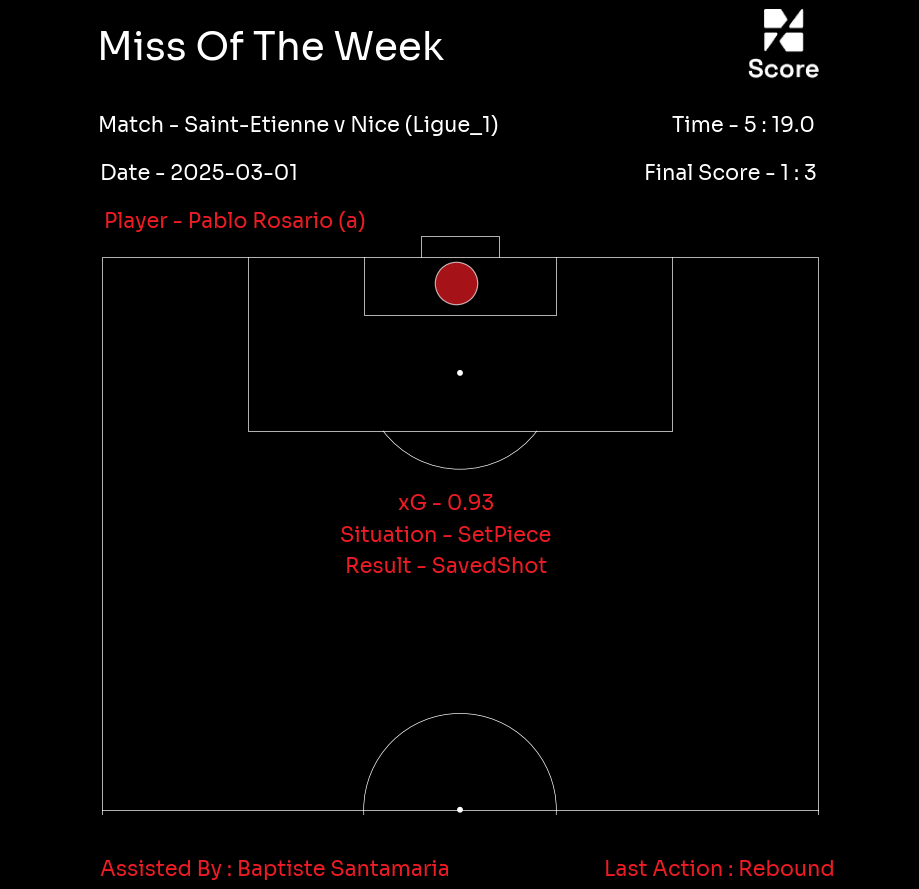

In [249]:
df_miss_high_xg1 = df_miss_high_xg.copy()
plot_miss_high_xg(df_miss_high_xg1)

## Goal Of the Week

## ShotMaps

### Top 9 Players Based on Number oof Shots Across Top 5 Leagues

In [153]:
query = """select player , count(*) as num_shots,
count(case when "result" = 'Goal' or "result" = 'SavedShot' or "result" = 'ShotOnPost' then 1 else null end) as num_shots_on_target,
count(case when "result" = 'Goal' then 1 else null end) as num_goals,
count(case when "result" = 'Goal' and situation != 'Penalty' then 1 else null end) as num_goals_non_penalty,
sum(round("xG" :: numeric ,2)) as total_xG,
sum(case when situation != 'Penalty' then round("xG" :: numeric ,2) else null end) as total_npxG
from understat_shots_tb ust
where season = '2024'
group by player
order by num_shots desc
limit 9;"""

with engine.connect() as conn:
    df_stats = pd.read_sql(query, conn)

In [154]:
df_stats

player  num_shots  num_shots_on_target  num_goals  \
0        Erling Haaland         89                   52         17   
1         Mohamed Salah         83                   44         18   
2       Antoine Semenyo         82                   26          6   
3       Nikola Krstovic         81                   28          6   
4  Kylian Mbappe-Lottin         80                   43         12   
5         Omar Marmoush         77                   38         15   
6           Cole Palmer         77                   35         14   
7  Valentín Castellanos         73                   29          7   
8    Robert Lewandowski         66                   36         16   

   num_goals_non_penalty  total_xg  total_npxg  
0                     16     19.26       17.74  
1                     13     16.73       12.93  
2                      6      9.03        9.03  
3                      5      7.77        6.25  
4                      8     14.51       10.81  
5                     13     10.47        8.95  
6                     11     10.87        8.59  
7                      5     12.15        9.87  
8                     14     18.34       16.12

In [155]:
df_stats['team'] = ['Man City','Liverpool','Bournemouth','Lecce','Real Madrid','Man City','Chelsea','Lazio','Barcelona']

In [156]:
query_shots = """ select "result","X","Y",situation,"shotType",player from understat_shots_tb ust
where season = '2024' and 
player in (select player from

(select player , count(*) as num_shots,
count(case when "result" = 'Goal' or "result" = 'SavedShot' or "result" = 'ShotOnPost' then 1 else null end) as num_shots_on_target,
count(case when "result" = 'Goal' then 1 else null end) as num_goals,
count(case when "result" = 'Goal' and situation != 'Penalty' then 1 else null end) as num_goals_non_penalty,
sum(round("xG" :: numeric ,2)) as total_xG,
sum(case when situation != 'Penalty' then round("xG" :: numeric ,2) else null end) as total_npxG
from understat_shots_tb ust
where season = '2024'
group by player
order by num_shots desc
limit 9) players);"""

with engine.connect() as conn:
    df_shots = pd.read_sql(query_shots, conn)

In [157]:
df_shots['player'].value_counts()

player
Erling Haaland          89
Mohamed Salah           83
Antoine Semenyo         82
Nikola Krstovic         81
Kylian Mbappe-Lottin    80
Omar Marmoush           77
Cole Palmer             77
Valentín Castellanos    73
Raphinha                66
Name: count, dtype: int64

### Top 9 Players Based on Number of Goals Across Top 5 Leagues

In [4]:
query = """select player , count(*) as num_shots,
count(case when "result" = 'Goal' or "result" = 'SavedShot' or "result" = 'ShotOnPost' then 1 else null end) as num_shots_on_target,
count(case when "result" = 'Goal' then 1 else null end) as num_goals,
count(case when "result" = 'Goal' and situation != 'Penalty' then 1 else null end) as num_goals_non_penalty,
sum(round("xG" :: numeric ,2)) as total_xG,
sum(case when situation != 'Penalty' then round("xG" :: numeric ,2) else null end) as total_npxG
from understat_shots_tb ust
where season = '2024'
group by player
order by num_goals desc
limit 9;"""

with engine.connect() as conn:
    df_stats = pd.read_sql(query, conn)

In [5]:
df_stats

player  num_shots  num_shots_on_target  num_goals  \
0         Mohamed Salah         90                   48         21   
1            Harry Kane         76                   39         21   
2         Mateo Retegui         65                   29         20   
3        Erling Haaland         93                   55         19   
4    Robert Lewandowski         72                   39         19   
5        Alexander Isak         64                   34         17   
6            Chris Wood         45                   27         17   
7  Kylian Mbappe-Lottin         92                   51         16   
8       Ousmane Dembélé         63                   36         16   

   num_goals_non_penalty  total_xg  total_npxg  
0                     15     18.01       13.45  
1                     12     18.74       11.90  
2                     18     13.33       11.05  
3                     18     20.13       18.61  
4                     17     19.94       17.72  
5                     16     14.10       13.34  
6                     14     11.93        9.65  
7                     11     17.18       12.74  
8                     15     12.06       11.30

In [6]:
df_stats['team'] = ['Liverpool','Bayern Munich','Atalanta','Man City','Barcelona','Newcastle','Nottingham Forest','Real Madrid','PSG']

In [7]:
query_shots = """ select "result","X","Y",situation,"shotType",player from understat_shots_tb ust
where season = '2024' and 
player in (select player from

(select player , count(*) as num_shots,
count(case when "result" = 'Goal' or "result" = 'SavedShot' or "result" = 'ShotOnPost' then 1 else null end) as num_shots_on_target,
count(case when "result" = 'Goal' then 1 else null end) as num_goals,
count(case when "result" = 'Goal' and situation != 'Penalty' then 1 else null end) as num_goals_non_penalty,
sum(round("xG" :: numeric ,2)) as total_xG,
sum(case when situation != 'Penalty' then round("xG" :: numeric ,2) else null end) as total_npxG
from understat_shots_tb ust
where season = '2024'
group by player
order by num_goals desc
limit 9) players);"""

with engine.connect() as conn:
    df_shots = pd.read_sql(query_shots, conn)

In [8]:
df_shots['player'].value_counts()

player
Erling Haaland          93
Kylian Mbappe-Lottin    92
Mohamed Salah           90
Harry Kane              76
Robert Lewandowski      72
Mateo Retegui           65
Alexander Isak          64
Ousmane Dembélé         63
Chris Wood              45
Name: count, dtype: int64

### Plot

In [9]:
df = df_shots.copy()
df['X'] = (df['X'] / 100) * 105 * 100
df['Y'] = (df['Y'] / 100) * 68 * 100

In [10]:
df.columns

Index(['result', 'X', 'Y', 'situation', 'shotType', 'player'], dtype='object')

In [11]:
df_stats['team'].unique()

array(['Liverpool', 'Bayern Munich', 'Atalanta', 'Man City', 'Barcelona',
       'Newcastle', 'Nottingham Forest', 'Real Madrid', 'PSG'],
      dtype=object)

In [12]:
df_stats.head()

player  num_shots  num_shots_on_target  num_goals  \
0       Mohamed Salah         90                   48         21   
1          Harry Kane         76                   39         21   
2       Mateo Retegui         65                   29         20   
3      Erling Haaland         93                   55         19   
4  Robert Lewandowski         72                   39         19   

   num_goals_non_penalty  total_xg  total_npxg           team  
0                     15     18.01       13.45      Liverpool  
1                     12     18.74       11.90  Bayern Munich  
2                     18     13.33       11.05       Atalanta  
3                     18     20.13       18.61       Man City  
4                     17     19.94       17.72      Barcelona

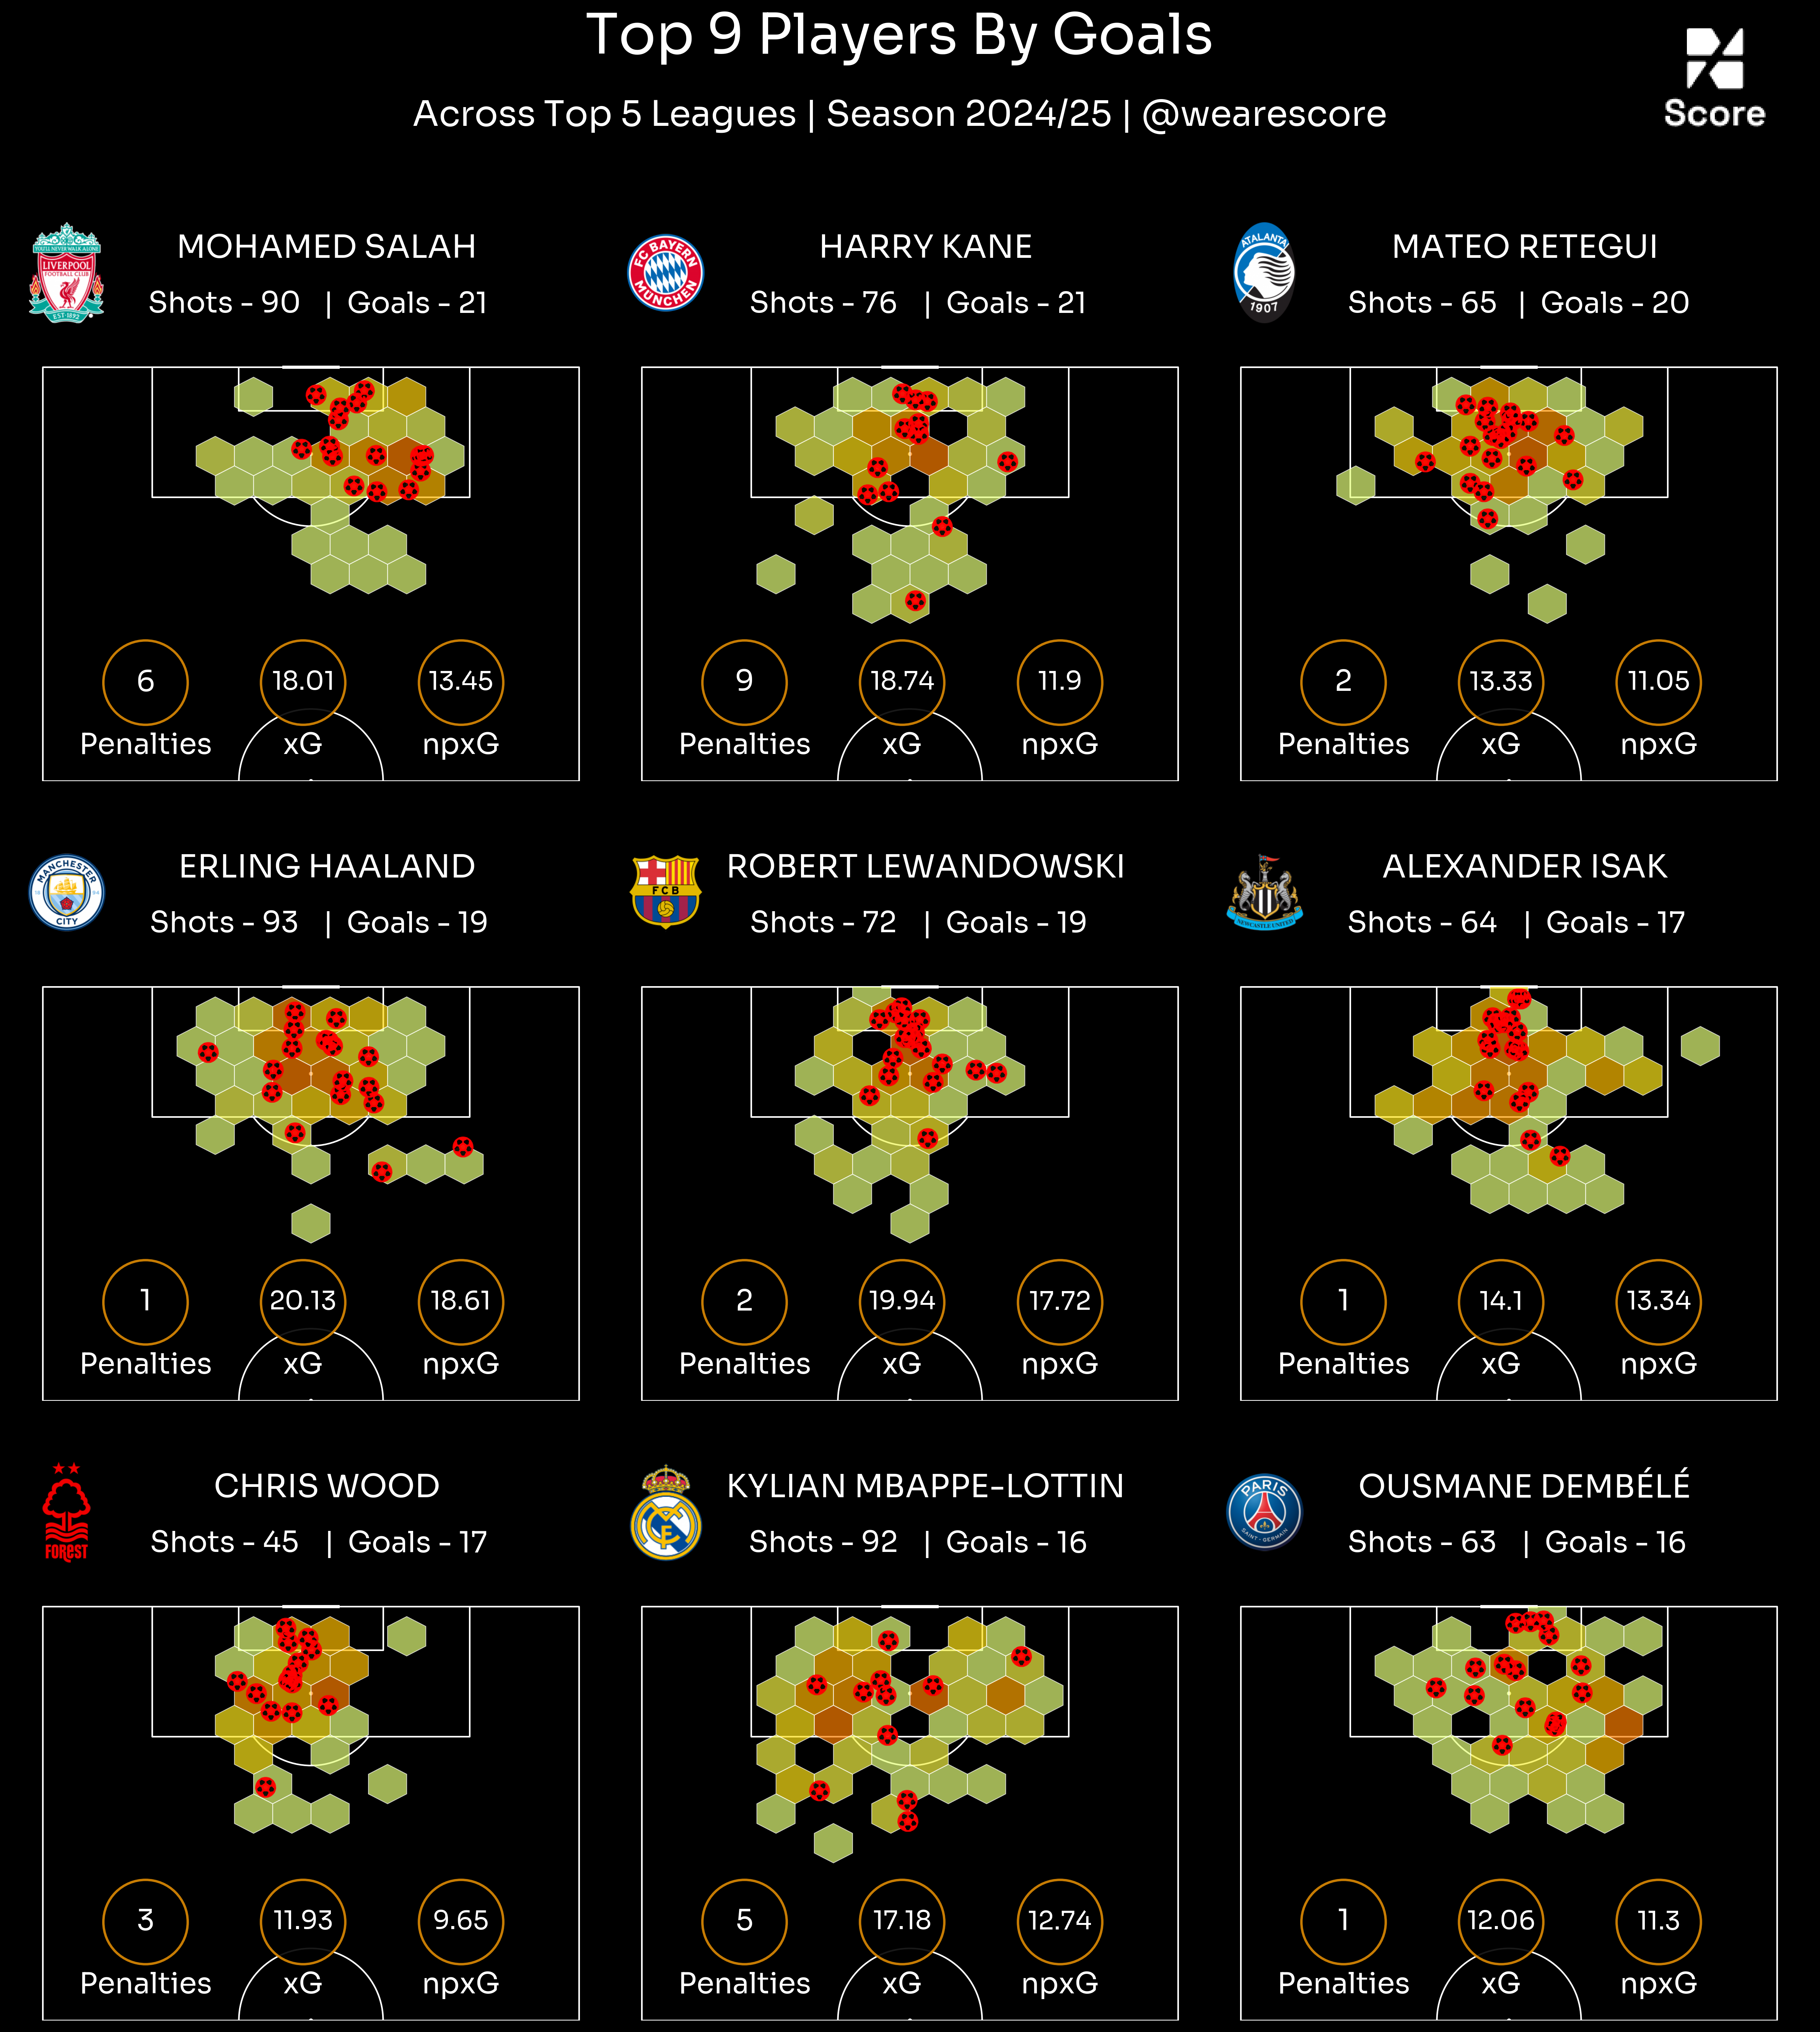

In [14]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

zoom_factor = 0.15

plt.rcParams['hatch.linewidth'] = 0.02
plt.rcParams['font.family'] = 'serif'
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18,30), dpi=300)
axs = axs.flatten()  # Flatten the axis array for easy iteration

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.88, bottom=0.75, width=0.05, height=0.05,aspect='equal'
)

img_url = 'C:\\Users\\acer\\Documents\\GitHub\\IndianCitizen\\ScorePredict\\Images\\TeamLogos'
for index, ax in enumerate(axs):
    pitch = VerticalPitch(
    pitch_type='uefa',
    goal_type = 'line',
    half=True, 
    pitch_color=background, 
    stripe=False, 
    line_color='white',
    linewidth=1,
    line_zorder=2,pad_bottom=0, pad_top=20
    )
    pitch.draw(ax=ax)

    ax.annotate(text=f"{df_stats['player'].iloc[index].upper()}", xy=(32, 120), size=20, color='white', ha='center', va='center', font=font_prop)
    team_name = df_stats['team'].iloc[index]
    img = plt.imread(f"{img_url}\\{team_name}.png")  # Adjust file path as needed
    im = OffsetImage(img, zoom=0.35)  # Adjust zoom for size
    ab = AnnotationBbox(
        im, 
        (65, 117),  # Adjust coordinates for image placement
        frameon=False,
        xycoords='data'
    )
    ax.add_artist(ab)
    
    
    ax.annotate(text=f"Shots - {df_stats['num_shots'].iloc[index]}", xy=(45, 113), size=18, color='white', ha='center', va='center', font=font_prop)

    ax.annotate(text=f"|  Goals - {df_stats['num_goals'].iloc[index]}", xy=(22, 113), size=18, color='white', ha='center', va='center', font=font_prop)

    player_shots = df[df['player'] == df_stats['player'].iloc[index]]

    if not player_shots.empty:
        # Plot hexbin for the player's shots
        pitch.hexbin(
            player_shots.X, 
            player_shots.Y, 
            ax=ax, 
            edgecolors='white',
            gridsize=(14, 14), 
            cmap='Wistia', 
            alpha=0.7, 
            zorder=3
        )

    player_goals = player_shots[(player_shots['result'] == 'Goal') & (player_shots['situation'] != 'Penalty')]
    pitch.scatter(player_goals.X, player_goals.Y,s=150, ax=ax, zorder=4, edgecolors='red',marker='football',
                          alpha=0.9, linewidths=1.2, c=background)

    pitch.scatter(65, 55,s=2800, ax=ax, zorder=4, edgecolors='#DE8A04',alpha=0.9, lw=1.5, color=background)
    pitch.scatter(65, 35,s=2800, ax=ax, zorder=4, edgecolors='#DE8A04',alpha=0.9, lw=1.5, color=background)
    pitch.scatter(65, 15,s=2800, ax=ax, zorder=4, edgecolors='#DE8A04',alpha=0.9, lw=1.5, color=background)

    pitch.annotate(text=f"{df_stats['num_goals'].iloc[index] - df_stats['num_goals_non_penalty'].iloc[index]}",ax=ax, xy=(65, 55), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)
    pitch.annotate(text="Penalties",ax=ax, xy=(57, 55), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)

    pitch.annotate(text=f"{df_stats['total_xg'].iloc[index]}",ax=ax, xy=(65, 35), size=16, color='white', ha='center', va='center',zorder=5, font=font_prop)
    pitch.annotate(text="xG",ax=ax, xy=(57, 35), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)

    pitch.annotate(text=f"{df_stats['total_npxg'].iloc[index]}",ax=ax, xy=(65, 15), size=16, color='white', ha='center', va='center',zorder=5, font=font_prop)
    pitch.annotate(text="npxG",ax=ax, xy=(57, 15), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)


    
    

fig.patch.set_facecolor(background)
plt.subplots_adjust(wspace=0, hspace=-0.6)

fig.text(x=0.51, y=0.78, s=f"Top 9 Players By Goals", va="bottom", ha="center",
             fontsize=35, color="white", font=font_prop, weight="bold")
fig.text(x=0.51, y=0.76, s=f"Across Top 5 Leagues | Season 2024/25 | @wearescore",color="white",
         va="bottom", ha="center", fontsize=22, font=font_prop)

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Top9EuropeGoals.png',dpi=500,bbox_inches = 'tight',facecolor=background)


In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cmr.amber', 'cmr.amber_r', 'cmr.amethyst', 'cmr.amethyst_r', 'cmr.apple', 'cmr.apple_r', 'cmr.arctic', 'cmr.arctic_r', 'cmr.bubblegum', 'cmr.bubblegum_r', 'cmr.chroma', 'cmr.chroma_r', 'cmr.copper', 'cmr.copper_r', 'cmr.copper_s', 'cmr.copper_s_r', 'cmr.cosmic', 'cmr.cosmic_r', 'cmr.dusk', 'cmr.dusk_r', 'cmr.eclipse', 'cmr.eclipse_r', 'cmr.ember', 'cmr.ember_r', 'cmr.emerald', 'cmr.emerald_r', 'cmr.emergency', 'cmr.emergency_r', 'cmr.emergency_s', 'cmr.emergency_s_r', 'cmr.fall', 'cmr.fall_r', 'cmr.flamingo', 'cmr.flamingo_r', 'cmr.freeze', 'cmr.freeze_r', 'cmr.fusion', 'cmr.fusion_r', 'cmr.gem', 'cmr.gem_r', 'cmr.ghostlight', 'cmr.ghostlight_r', 'cmr.gothic', 'cmr.gothic_r', 'cmr.guppy', 'cmr.guppy_r', 'cmr.holly', 'cmr.holly_r', 'cmr.horizon', 'cmr.horizon_r', 'cmr.iceburn', 'cmr.iceburn_r', 'cmr.infinity', 'cmr.infinity_r', 'cmr.infinity_s', 'cmr.infinity_s_r', 'cmr.jungle', 'cmr.jungle_r', 'cmr.lavender', 'cmr.lavender_r', 'cmr.lilac', 'cmr.lilac_r', 'cmr.neon', 'cmr.neon_r', 'cmr.neutral', 'cmr.neutral_r', 'cmr.nuclear', 'cmr.nuclear_r', 'cmr.ocean', 'cmr.ocean_r', 'cmr.pepper', 'cmr.pepper_r', 'cmr.pride', 'cmr.pride_r', 'cmr.prinsenvlag', 'cmr.prinsenvlag_r', 'cmr.rainforest', 'cmr.rainforest_r', 'cmr.redshift', 'cmr.redshift_r', 'cmr.sapphire', 'cmr.sapphire_r', 'cmr.savanna', 'cmr.savanna_r', 'cmr.seasons', 'cmr.seasons_r', 'cmr.seasons_s', 'cmr.seasons_s_r', 'cmr.seaweed', 'cmr.seaweed_r', 'cmr.sepia', 'cmr.sepia_r', 'cmr.sunburst', 'cmr.sunburst_r', 'cmr.swamp', 'cmr.swamp_r', 'cmr.torch', 'cmr.torch_r', 'cmr.toxic', 'cmr.toxic_r', 'cmr.tree', 'cmr.tree_r', 'cmr.tropical', 'cmr.tropical_r', 'cmr.viola', 'cmr.viola_r', 'cmr.voltage', 'cmr.voltage_r', 'cmr.waterlily', 'cmr.waterlily_r', 'cmr.watermelon', 'cmr.watermelon_r', 'cmr.wildfire', 'cmr.wildfire_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

## Scatter Plots for Different Metrics

In [526]:
#https://x.com/DataAnalyticEPL/status/1869757409042006186

### OpenPlay V SetPiece xG

In [315]:
query = """SELECT 
    CASE 
        WHEN h_a = 'h' THEN h_team 
        ELSE a_team 
    END AS team,
    SUM(ROUND(CASE WHEN situation = 'OpenPlay' THEN "xG"::NUMERIC ELSE 0 END, 2)) AS xG_openplay,
    SUM(ROUND(CASE WHEN situation = 'SetPiece' or situation = 'FromCorner' or situation = 'DirectFreekick' THEN "xG"::NUMERIC ELSE 0 END, 2)) AS xG_setpiece
FROM understat_shots_tb ust
WHERE 
    season = '2024' 
    AND league = 'EPL'
GROUP BY 
    CASE 
        WHEN h_a = 'h' THEN h_team 
        ELSE a_team 
    END;"""

with engine.connect() as conn:
    df = pd.read_sql(query, conn)

In [316]:
df

team  xg_openplay  xg_setpiece
0                   Arsenal        36.50        17.27
1               Aston Villa        33.04        13.82
2               Bournemouth        42.94         8.27
3                 Brentford        39.06         6.24
4                  Brighton        38.62         6.40
5                   Chelsea        44.04        11.83
6            Crystal Palace        34.92        11.61
7                   Everton        24.33         8.42
8                    Fulham        34.40         6.98
9                   Ipswich        22.25         6.28
10                Leicester        21.99         5.84
11                Liverpool        55.74         7.09
12          Manchester City        42.48         9.93
13        Manchester United        31.54         7.60
14         Newcastle United        36.88         7.41
15        Nottingham Forest        28.77        11.81
16              Southampton        22.59         7.82
17                Tottenham        40.50         9.49
18                 West Ham        29.39         7.52
19  Wolverhampton Wanderers        26.07         5.47

In [317]:
df.loc[19, "team"] = "Wolves"

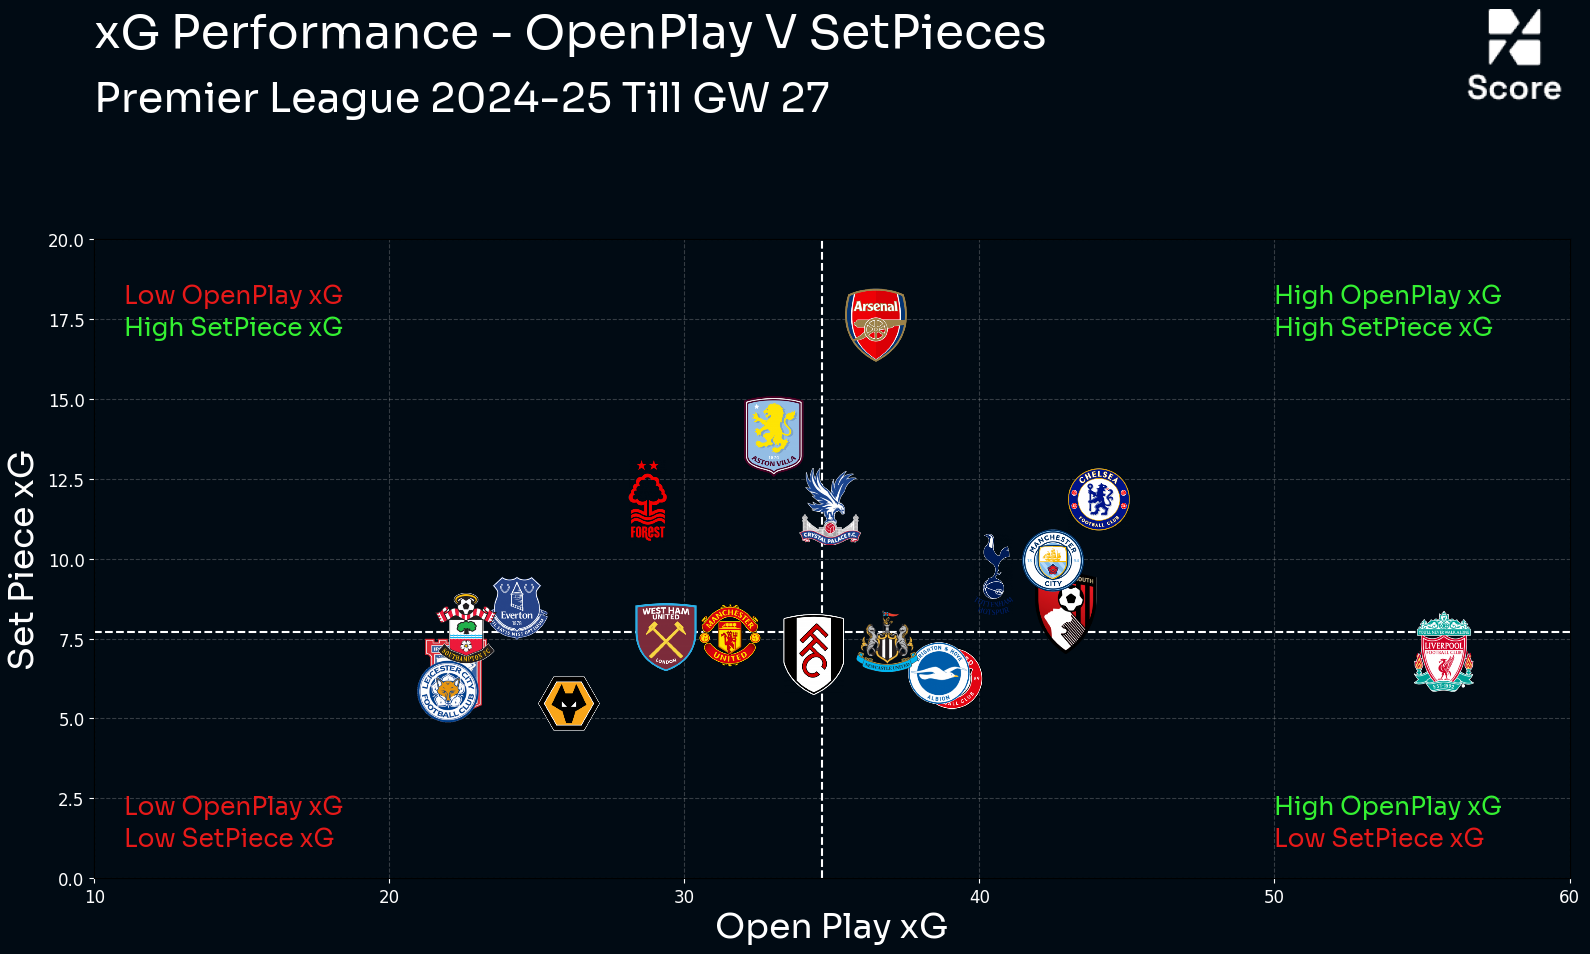

In [325]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
from PIL import Image

# Function to load logos
def get_team_logo(team_name, logo_dir='C://Users//acer//Desktop//IndianCityzen//football-logos-master//logos//England - Premier League//'):
    logo_path = f"{logo_dir}{team_name}.png"
    try:
        logo = Image.open(logo_path)
        return logo
    except FileNotFoundError:
        print(f"Logo for {team_name} not found at {logo_path}")
        return None

# Create scatter plot
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor(background)
ax.patch.set_facecolor(background)

for _, row in df.iterrows():
    team, xg_openplay, xg_setpiece = row['team'], row['xg_openplay'], row['xg_setpiece']
    logo = get_team_logo(team)
    if logo:
        imagebox = OffsetImage(logo, zoom=0.32)  # Adjust zoom for size
        ab = AnnotationBbox(imagebox, (xg_openplay, xg_setpiece), frameon=False)
        ax.add_artist(ab)
    else:
        # Plot a regular scatter point if logo not found
        ax.scatter(xg_openplay, xg_setpiece, color='red', label=team)

median_openplay_xG = df['xg_openplay'].median()
median_setpiece_xG = df['xg_setpiece'].median()
ax.axvline(median_openplay_xG, color='white', linestyle='--', lw=1.5, label=f'Median Open Play xG ({median_openplay_xG:.2f})')
ax.axhline(median_setpiece_xG, color='white', linestyle='--', lw=1.5, label=f'Median Set Piece xG ({median_setpiece_xG:.2f})')

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.9, bottom=0.85, width=0.1, height=0.1,aspect='equal'
)

# Customize the plot
ax.set_xlim(10, 60)
ax.set_ylim(0, 20)
ax.set_xlabel('Open Play xG',font=font_prop,color='white', fontsize=25)
ax.set_ylabel('Set Piece xG',font=font_prop,color='white', fontsize=25)
#ax.set_title('Premier League\n 2024-25 Till GW 27',font=font_prop,color='white', fontsize=30,y=1.08, fontweight='bold')

title_text = f"xG Performance - OpenPlay V SetPieces"
subtitle_text = "Premier League 2024-25 Till GW 27"

# Title
ax.text(10, 26, title_text, fontweight="bold",fontproperties=font_prop, fontsize=34, color='w')
ax.text(10, 24, subtitle_text, fontweight="regular",fontproperties=font_prop, fontsize=30, color='w')

ax.text(50,18,'High OpenPlay xG',font=font_prop,color='#34F132', fontsize=18)
ax.text(50,17,'High SetPiece xG',font=font_prop,color='#34F132', fontsize=18)


ax.text(11,18,'Low OpenPlay xG',font=font_prop,color='#E61919', fontsize=18)
ax.text(11,17,'High SetPiece xG',font=font_prop,color='#34F132', fontsize=18)

ax.text(50,2,'High OpenPlay xG',font=font_prop,color='#34F132', fontsize=18)
ax.text(50,1,'Low SetPiece xG',font=font_prop,color='#E61919', fontsize=18)

ax.text(11,2,'Low OpenPlay xG',font=font_prop,color='#E61919', fontsize=18)
ax.text(11,1,'Low SetPiece xG',font=font_prop,color='#E61919', fontsize=18)


ax.tick_params(axis='x', colors='white', labelsize=12)  # X-axis tick labels in green
ax.tick_params(axis='y', colors='white', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/OpenPlayVSetPieceEPL.png',dpi=500,bbox_inches = 'tight',facecolor=background)


### xG Home V Away

In [182]:
query = """SELECT 
    CASE 
        WHEN h_a = 'h' THEN h_team  -- Home team shot
        WHEN h_a = 'a' THEN a_team  -- Away team shot
    END AS team,
    SUM(CASE WHEN h_a = 'h' THEN "xG" ELSE 0 END) AS xG_home,
    SUM(CASE WHEN h_a = 'a' THEN "xG" ELSE 0 END) AS xG_away
FROM understat_shots_tb
where season = 2024 and league = 'Ligue_1'
GROUP BY team;"""

with engine.connect() as conn:
    df = pd.read_sql(query, conn)

In [190]:
df['xg_away'].min()

9.805295955389738

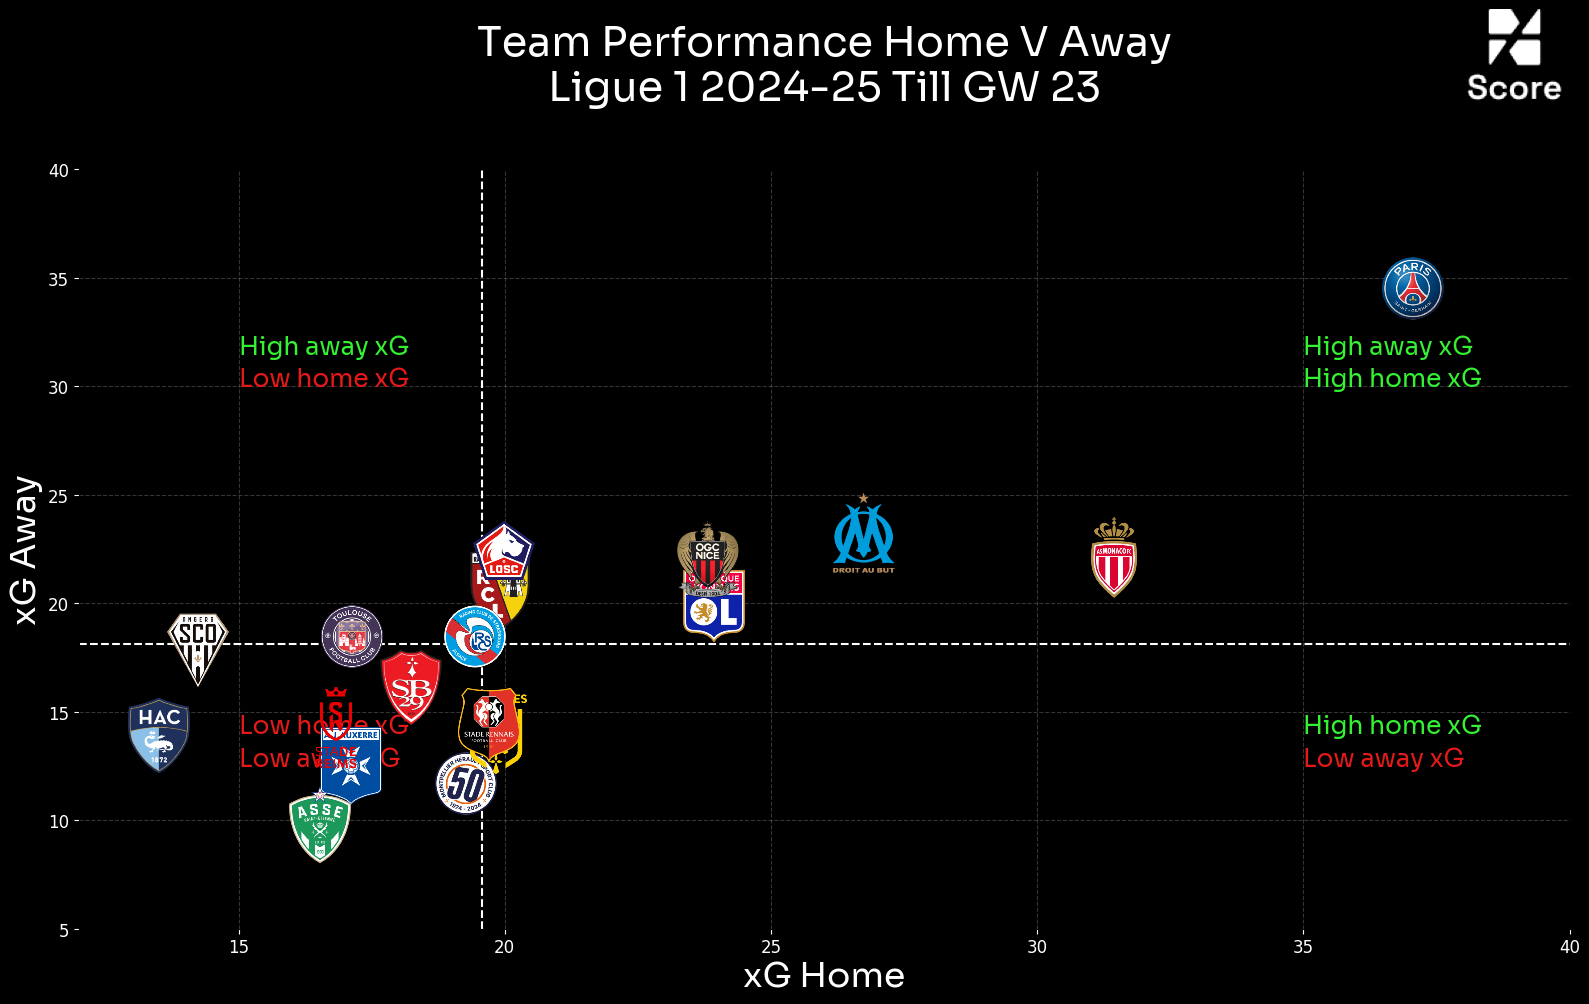

In [202]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
from PIL import Image

# Function to load logos
def get_team_logo(team_name, logo_dir='C://Users//acer//Desktop//IndianCityzen//football-logos-master//logos//France - Ligue 1//'):
    logo_path = f"{logo_dir}{team_name}.png"
    try:
        logo = Image.open(logo_path)
        return logo
    except FileNotFoundError:
        print(f"Logo for {team_name} not found at {logo_path}")
        return None

# Create scatter plot
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor(background)
ax.patch.set_facecolor(background)

for _, row in df.iterrows():
    team, xg_home, xg_away = row['team'], row['xg_home'], row['xg_away']
    logo = get_team_logo(team)
    if logo:
        imagebox = OffsetImage(logo, zoom=0.32)  # Adjust zoom for size
        ab = AnnotationBbox(imagebox, (xg_home, xg_away), frameon=False)
        ax.add_artist(ab)
    else:
        # Plot a regular scatter point if logo not found
        ax.scatter(xg_home, xg_away, color='red', label=team)

median_home_xG = df['xg_home'].median()
median_away_xG = df['xg_away'].median()
ax.axvline(median_home_xG, color='white', linestyle='--', lw=1.5, label=f'Median Open Play xG ({median_home_xG:.2f})')
ax.axhline(median_away_xG, color='white', linestyle='--', lw=1.5, label=f'Median Set Piece xG ({median_away_xG:.2f})')

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.9, bottom=0.9, width=0.1, height=0.1,aspect='equal'
)

# Customize the plot
ax.set_xlim(12, 40)
ax.set_ylim(5, 40)
ax.set_xlabel('xG Home',font=font_prop,color='white', fontsize=25)
ax.set_ylabel('xG Away',font=font_prop,color='white', fontsize=25)
ax.set_title('Team Performance Home V Away\nLigue 1 2024-25 Till GW 23',font=font_prop,color='white', fontsize=30,y=1.08, fontweight='bold')

ax.text(35,30,'High home xG',font=font_prop,color='#34F132', fontsize=18)
ax.text(35,31.5,'High away xG',font=font_prop,color='#34F132', fontsize=18)


ax.text(15,30,'Low home xG',font=font_prop,color='#E61919', fontsize=18)
ax.text(15,31.5,'High away xG',font=font_prop,color='#34F132', fontsize=18)

ax.text(35,14,'High home xG',font=font_prop,color='#34F132', fontsize=18)
ax.text(35,12.5,'Low away xG',font=font_prop,color='#E61919', fontsize=18)

ax.text(15,14,'Low home xG',font=font_prop,color='#E61919', fontsize=18,zorder=2)
ax.text(15,12.5,'Low away xG',font=font_prop,color='#E61919', fontsize=18,zorder=2)


ax.tick_params(axis='x', colors='white', labelsize=12)  # X-axis tick labels in green
ax.tick_params(axis='y', colors='white', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/homeVawayLigue1.png',dpi=500,bbox_inches = 'tight',facecolor=background)


### Saves P90 V Passing Accuracy - GK

In [102]:
# Making all the alphabets in the name as English Alphabets only (for example: Á will be replaced by A)
df['playerName'] = df['playerName'].astype(str)
df['playerName'] = df['playerName'].apply(unidecode)

# Function to extract short names
def get_short_name(full_name):
    if pd.isna(full_name):
        return full_name
    parts = full_name.split()
    if len(parts) == 1:
        return full_name  # No need for short name if there's only one word
    elif len(parts) == 2:
        return parts[0][0] + ". " + parts[1]
    else:
        return parts[0][0] + ". " + parts[1][0] + ". " + " ".join(parts[2:])

# Applying the function to create 'shortName' column
df['shortName'] = df['playerName'].apply(get_short_name)

In [103]:
df['teamName'] = df['teamId'].map(teams_dict)
team_names = list(teams_dict.values())

In [10]:
df.columns

Index(['Unnamed: 0', 'id', 'eventId', 'minute', 'second', 'teamId', 'h_a', 'x',
       'y', 'expandedMinute',
       ...
       'subOn', 'subOff', 'defensiveThird', 'midThird', 'finalThird', 'pos',
       'isOwnGoal', 'EPV', 'cumulative_mins', 'teamName'],
      dtype='object', length=263)

In [104]:
player_minutes = df.groupby(['shortName', 'teamName', 'matchId'])['maxMinute'].max().reset_index()

# Step 2: Sum total minutes played across all matches
total_minutes_played = player_minutes.groupby(['shortName', 'teamName'])['maxMinute'].sum().reset_index()
total_minutes_played.rename(columns={'maxMinute': 'TotalMinutesPlayed'}, inplace=True)

eligible_players = total_minutes_played[total_minutes_played['TotalMinutesPlayed'] >= 1000]

goalkeepers = df[df['type'] == 'KeeperSweeper']['shortName'].unique()
eligible_goalkeepers = eligible_players[eligible_players['shortName'].isin(goalkeepers)]

eligible_goalkeepers_names = eligible_goalkeepers['shortName'].unique()
gk_saves_df = df[(df['type'] == 'Save') & (df['shortName'].isin(eligible_goalkeepers_names))]
gk_passes_df = df[(df['type'] == 'Pass') & (df['shortName'].isin(eligible_goalkeepers_names))]

# Calculate saves per match
saves_per_match = gk_saves_df.groupby(['shortName', 'teamName', 'matchId']).size().reset_index(name='saves')
saves_per90 = saves_per_match.groupby(['shortName', 'teamName'])['saves'].mean().reset_index()
saves_per90.rename(columns={'saves': 'SavesPer90'}, inplace=True)

# Calculate passes per match
passes_per_match = gk_passes_df.groupby(['shortName', 'teamName', 'matchId']).size().reset_index(name='total_passes')
successful_passes_per_match = gk_passes_df[gk_passes_df['outcomeType'] == 'Successful'].groupby(['shortName', 'teamName', 'matchId']).size().reset_index(name='successful_passes')

# Compute per 90 values for passing
passes_per90 = passes_per_match.groupby(['shortName', 'teamName'])['total_passes'].mean().reset_index()
passes_per90.rename(columns={'total_passes': 'PassesPer90'}, inplace=True)

successful_passes_per90 = successful_passes_per_match.groupby(['shortName', 'teamName'])['successful_passes'].mean().reset_index()
successful_passes_per90.rename(columns={'successful_passes': 'SuccessfulPassesPer90'}, inplace=True)

# Merge pass stats
passing_per90 = pd.merge(passes_per90, successful_passes_per90, on=['shortName', 'teamName'], how='left')
passing_per90['SuccessfulPassesPer90'].fillna(0, inplace=True)  # Handle keepers with no successful passes

# Compute Passing Accuracy Per 90
passing_per90['PassingAccuracyPer90'] = (passing_per90['SuccessfulPassesPer90'] / passing_per90['PassesPer90']) * 100

# Merge with SavesPer90
gk_metrics_df = pd.merge(saves_per90, passing_per90[['shortName','PassingAccuracyPer90']], on=['shortName'], how='left')

gk_metrics_df = pd.merge(gk_metrics_df, eligible_goalkeepers , on = ['shortName','teamName'],how='left')

# Sort by SavesPer90 (optional, for better readability)
gk_metrics_df = gk_metrics_df.sort_values(by='SavesPer90', ascending=False)

In [116]:
# Ensure unique records before merging
saves_per90 = saves_per90.drop_duplicates(subset=['shortName', 'teamName'])
passing_per90 = passing_per90.drop_duplicates(subset=['shortName', 'teamName'])
eligible_goalkeepers = eligible_goalkeepers.drop_duplicates(subset=['shortName', 'teamName'])

# Merging
gk_metrics_df = pd.merge(saves_per90, 
                         passing_per90[['shortName', 'teamName', 'PassingAccuracyPer90']], 
                         on=['shortName', 'teamName'], 
                         how='left')

gk_metrics_df = pd.merge(gk_metrics_df, eligible_goalkeepers, 
                         on=['shortName', 'teamName'], 
                         how='left')

# Drop duplicates after merging
gk_metrics_df = gk_metrics_df.drop_duplicates(subset=['shortName'], keep='first')

# Final check
print(gk_metrics_df.duplicated(subset=['shortName']).sum())  # Should be 0


0


In [113]:
print(gk_metrics_df['SavesPer90'].min() , gk_metrics_df['SavesPer90'].max() , gk_metrics_df['PassingAccuracyPer90'].min() , gk_metrics_df['PassingAccuracyPer90'].max())

1.0 4.681818181818182 45.45454545454546 91.13924050632912


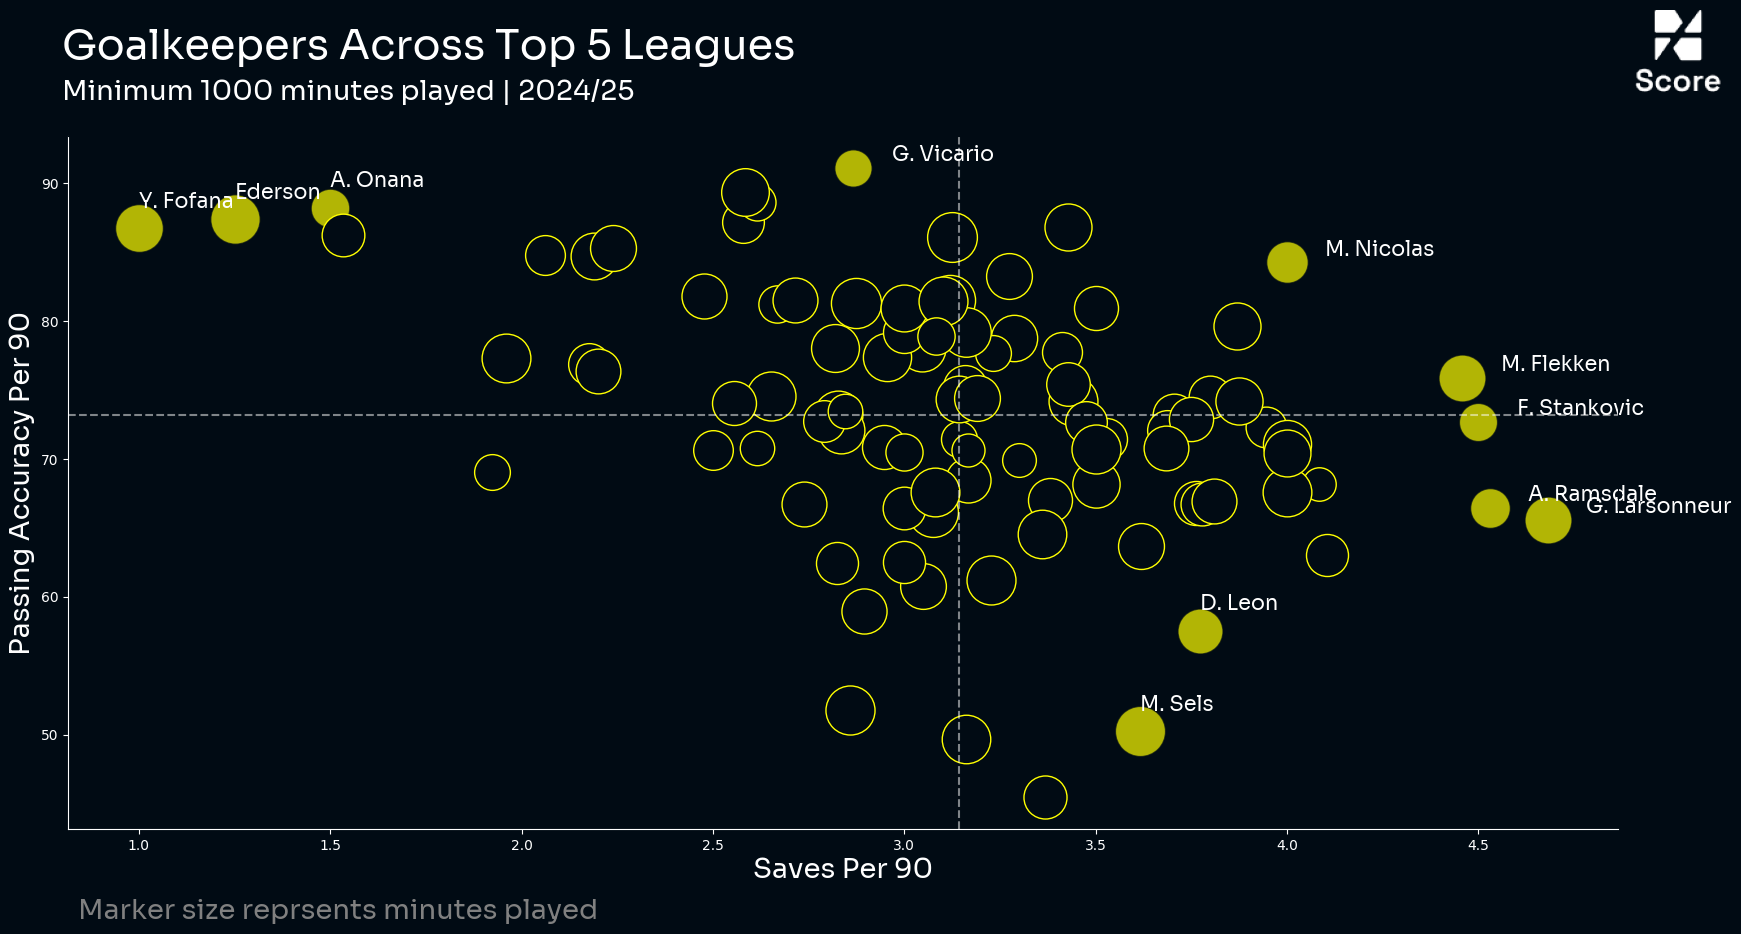

In [146]:
fig, ax = plt.subplots(figsize=(20,9))
fig.set_facecolor(background)
ax.set_facecolor(background)
ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.7)

for index,row in gk_metrics_df.iterrows():
  if ( ((row['SavesPer90'] >= 3.8) & (row['PassingAccuracyPer90'] >= 84.0)) or (row['PassingAccuracyPer90'] >= 90) or (row['SavesPer90'] >= 4.2)):
    ax.scatter(row['SavesPer90'], row['PassingAccuracyPer90'],color='yellow',s=row['TotalMinutesPlayed'] * 0.5,edgecolor=background,zorder=1,alpha=0.7)
    ax.annotate(row['shortName'],xy = (row['SavesPer90']+0.1,row['PassingAccuracyPer90']+0.5),fontproperties=font_prop,color='white',fontsize=15,zorder=2)
  elif ( ((row['PassingAccuracyPer90'] >= 84.0) & (row['SavesPer90'] <= 1.5)) or ((row['PassingAccuracyPer90'] <= 60.0) & (row['SavesPer90'] >= 3.5)) ):
    ax.scatter(row['SavesPer90'], row['PassingAccuracyPer90'],color='yellow',s=row['TotalMinutesPlayed'] * 0.5,edgecolor=background,zorder=1,alpha=0.7)
    ax.annotate(row['shortName'],xy = (row['SavesPer90'],row['PassingAccuracyPer90']+1.5),fontproperties=font_prop,color='white',fontsize=15,zorder=2)
  else:
    ax.scatter(row['SavesPer90'], row['PassingAccuracyPer90'],color=background,s=row['TotalMinutesPlayed'] * 0.5,edgecolor='yellow')


median_saves = gk_metrics_df['SavesPer90'].median()
median_passes = gk_metrics_df['PassingAccuracyPer90'].median()
ax.axvline(median_saves, color='white', linestyle='--', lw=1.5,alpha=0.5,zorder=1)
ax.axhline(median_passes, color='white', linestyle='--', lw=1.5,alpha=0.5,zorder=1)

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.88, bottom=0.92, width=0.1, height=0.1,aspect='equal'
)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['top'].set_color(background)
ax.spines['right'].set_color(background)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.set_xlabel("Saves Per 90",fontproperties=font_prop,color='white',fontsize=20)
ax.set_ylabel("Passing Accuracy Per 90",fontproperties=font_prop,color='white',fontsize=20)
ax.grid(False)
#ax.set_title("Top GoalKeepers - LaLiga 2024/25",fontproperties=font_prop,color='white',fontsize=32,y=1.07)
#ax.suptitle("Players With 100+ Passes and Carries",fontsize=18,color='white')
ax.text(0.8, 99, "Goalkeepers Across Top 5 Leagues", fontproperties=font_prop,ha='left', fontsize=30,color='white')
ax.text(0.8, 96, "Minimum 1000 minutes played | 2024/25", fontproperties=font_prop,ha='left', fontsize=20,color='white')

fig.text(0.13,0.01, "Marker size reprsents minutes played", fontproperties=font_prop,ha='left', fontsize=20,color='grey')


#ax.scatter(2, 99,edgecolor='yellow',s=500,color=background)
plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/GoalkeepersTop5.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## Crossing Analysis

### Number of Crosses P90 Vs xG From Crosses

In [425]:
df[df['passCrossAccurate'] == True].shape

(2288, 273)

In [509]:
df[(df['passCrossAccurate'] == True) & (~df['qualifiers'].str.contains('CornerTaken|Freekick'))].shape

(1489, 273)

In [510]:
df_crosses = df[(df['type'] =='Pass') & (df['passCrossAccurate'] == True)  & (~df['qualifiers'].str.contains('CornerTaken|Freekick'))]

In [511]:
# Count the number of crosses per team per match
crosses_per_match = df_crosses.groupby(['teamName']).size().reset_index(name='crosses')

In [530]:
query = """SELECT 
    "teamName",
    ROUND(SUM("xG")::NUMERIC, 2) AS total_xG, 
    SUM(goals) AS total_goals
FROM (
    SELECT 
        h_team AS  "teamName", 
        "xG",
        CASE WHEN result = 'Goal' THEN 1 ELSE 0 END AS goals
    FROM understat_shots_tb
    WHERE league = 'La_Liga' 
      AND season = 2024 
      AND h_a = 'h' 
      AND "lastAction" = 'Cross' and situation = 'OpenPlay'

    UNION ALL

    SELECT 
        a_team AS  "teamName", 
        "xG",
        CASE WHEN result = 'Goal' THEN 1 ELSE 0 END AS goals
    FROM understat_shots_tb
    WHERE league = 'La_Liga' 
      AND season = 2024 
      AND h_a = 'a' 
      AND "lastAction" = 'Cross'and situation = 'OpenPlay'
) AS team_xG
GROUP BY  "teamName"
ORDER BY total_xG DESC;"""

with engine.connect() as conn:
    df_xg_crosses = pd.read_sql(query, conn)

In [531]:
df_xg_crosses.loc[10, "teamName"] = "Deportivo Alaves"
df_xg_crosses.loc[0, "teamName"] = "Atletic Club"

In [532]:
df_crosses_final = pd.merge(crosses_per_match, df_xg_crosses, on=['teamName'], how='left')

In [533]:
df_crosses_final.loc[0, "teamName"] = "Athletic Club"
df_crosses_final.loc[4, "teamName"] = "Alaves"

In [534]:
df_crosses_final

teamName  crosses  total_xg  total_goals
0     Athletic Club       91      7.58            7
1   Atletico Madrid       80      6.39            5
2         Barcelona       68      6.67            5
3        Celta Vigo       59      4.29            5
4            Alaves       92      4.71            5
5          Espanyol       66      3.10            4
6            Getafe       91      2.42            1
7            Girona       86      5.53            5
8        Las Palmas       75      3.39            1
9           Leganes       34      1.37            1
10         Mallorca      105      4.69            5
11          Osasuna      101      4.77            2
12   Rayo Vallecano       74      5.69            2
13       Real Betis       70      4.13            3
14      Real Madrid       38      4.74            3
15    Real Sociedad       67      5.87            4
16  Real Valladolid       75      2.77            1
17          Sevilla       52      2.66            4
18         Valencia       79      5.65            2
19       Villarreal       86      6.80            6

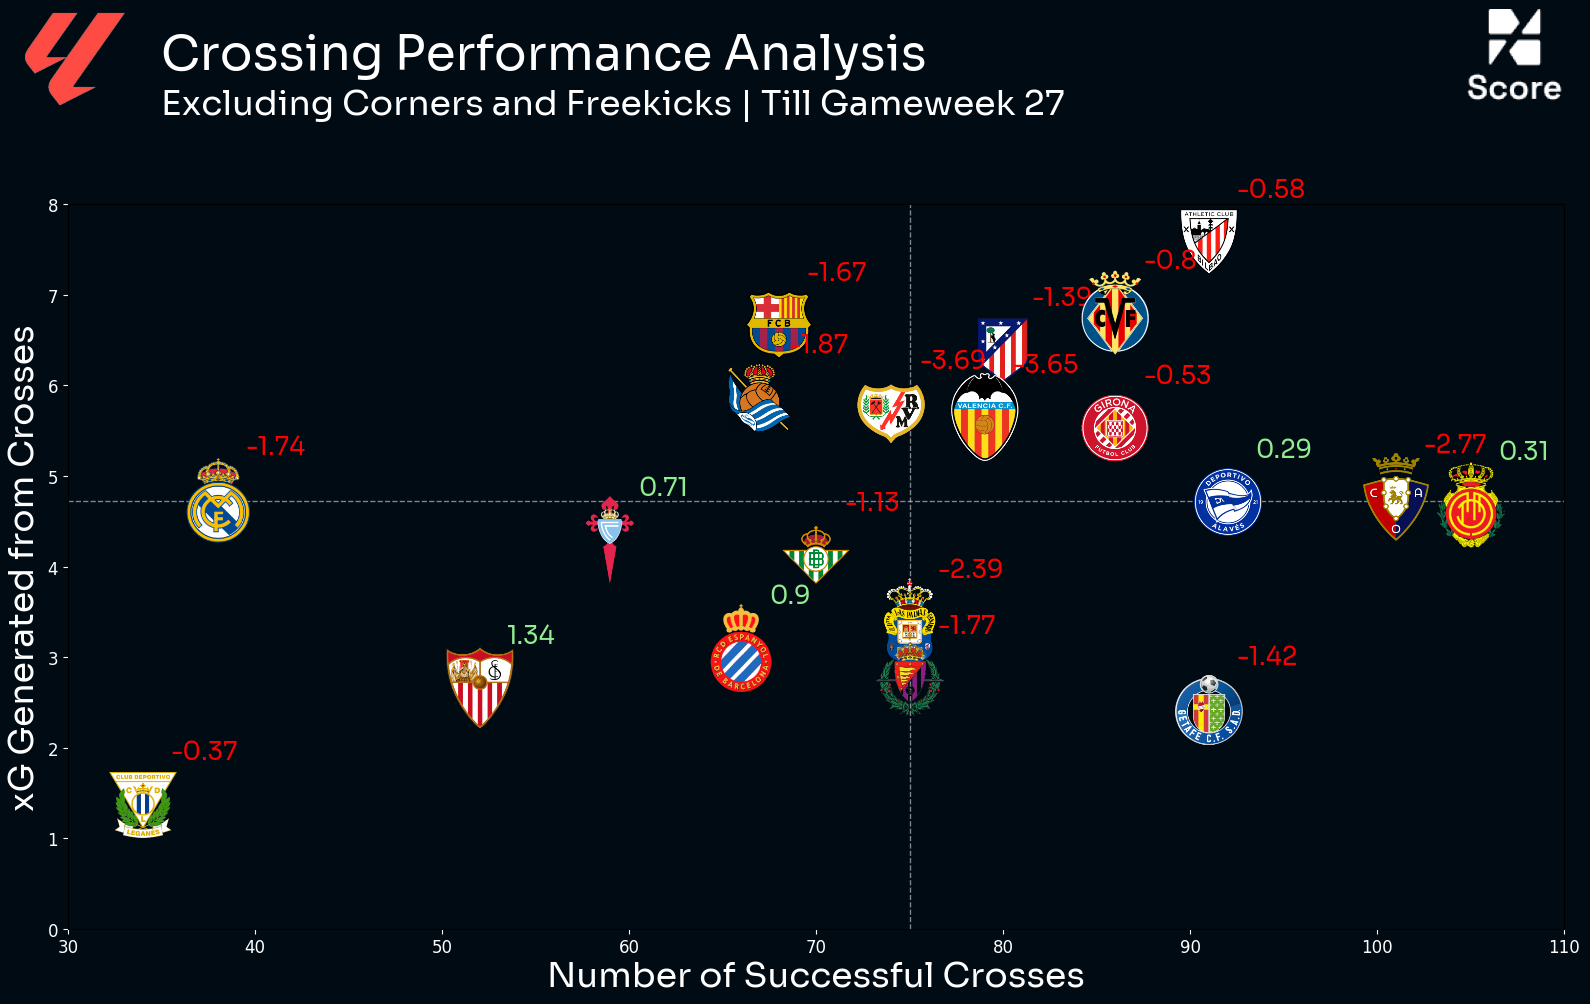

In [793]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
from PIL import Image

# Function to load logos
def get_team_logo(team_name, logo_dir='C://Users//acer//Desktop//IndianCityzen//football-logos-master//logos//Spain - LaLiga//'):
    logo_path = f"{logo_dir}{team_name}.png"
    try:
        logo = Image.open(logo_path)
        return logo
    except FileNotFoundError:
        print(f"Logo for {team_name} not found at {logo_path}")
        return None

# Create scatter plot
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor(background)
ax.patch.set_facecolor(background)

for _, row in df_crosses_final.iterrows():
    team, crosses, xg , diff = row['teamName'], row['crosses'], row['total_xg'] , round(row['total_goals'] - row['total_xg'],2)
    logo = get_team_logo(team)
    if logo:
        imagebox = OffsetImage(logo, zoom=0.35)  # Adjust zoom for size
        ab = AnnotationBbox(imagebox, (crosses, xg), frameon=False)
        ax.add_artist(ab)
        text_color = 'lightgreen'
        if diff < 0:
            text_color = 'red'
        ax.text(crosses+1.5,xg+0.5,f'{diff}',font=font_prop,color=text_color, fontsize=18)
    else:
        # Plot a regular scatter point if logo not found
        ax.scatter(crosses, xg, color='red', label=team)

median_crosses = df_crosses_final['crosses'].median()
median_xG = df_crosses_final['total_xg'].median()
ax.axvline(median_crosses, color='white', linestyle='--', lw=1,alpha=0.5, label=f'Median Number of Crosses ({median_crosses:.2f})')
ax.axhline(median_xG, color='white', linestyle='--', lw=1,alpha=0.5, label=f'Median xG ({median_xG:.2f})')

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.9, bottom=0.9, width=0.1, height=0.1,aspect='equal'
)

league_logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/LaLiga.png')

ax_image = add_image(
    league_logo, fig, left=0, bottom=0.9, width=0.1, height=0.1,aspect='equal'
)

# Customize the plot
ax.set_xlim(30, 110)
ax.set_ylim(0, 8)
ax.set_xlabel('Number of Successful Crosses',font=font_prop,color='white', fontsize=25)
ax.set_ylabel('xG Generated from Crosses',font=font_prop,color='white', fontsize=25)
ax.text(35,9.5,'Crossing Performance Analysis',font=font_prop,color='white', fontsize=35,fontweight='bold')
ax.text(35,9,'Excluding Corners and Freekicks | Till Gameweek 27',font=font_prop,color='white', fontsize=25,fontweight='regular')

'''
ax.text(35,30,'High home xG',font=font_prop,color='#34F132', fontsize=18)
ax.text(35,31.5,'High away xG',font=font_prop,color='#34F132', fontsize=18)


ax.text(15,30,'Low home xG',font=font_prop,color='#E61919', fontsize=18)
ax.text(15,31.5,'High away xG',font=font_prop,color='#34F132', fontsize=18)

ax.text(35,14,'High home xG',font=font_prop,color='#34F132', fontsize=18)
ax.text(35,12.5,'Low away xG',font=font_prop,color='#E61919', fontsize=18)

ax.text(15,14,'Low home xG',font=font_prop,color='#E61919', fontsize=18,zorder=2)
ax.text(15,12.5,'Low away xG',font=font_prop,color='#E61919', fontsize=18,zorder=2)
'''

ax.tick_params(axis='x', colors='white', labelsize=12)  # X-axis tick labels in green
ax.tick_params(axis='y', colors='white', labelsize=12)
ax.grid(False)
plt.tight_layout()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/LaLigaCrossing_1.png',dpi=500,bbox_inches = 'tight',facecolor=background)


### Crosses from high performing teams

In [540]:
df_crosses_final.loc[0, "teamName"] = "Atletic Club"
high_performing_teams = df_crosses_final[df_crosses_final['total_xg']>6.7]['teamName']
df_crosses_team = df_crosses[df_crosses['teamName'].isin(high_performing_teams)]

In [541]:
df_crosses_team['teamName'].unique()

array(['Atletic Club', 'Villarreal'], dtype=object)

In [542]:
cross_counts = df_crosses_team.groupby(['teamName', 'playerName'])['playerName'].count().reset_index(name='cross_count')
cross_counts = cross_counts.sort_values(by=['teamName','cross_count'], ascending=[True,False])
top_2_per_team = cross_counts.groupby('teamName').head(2)

In [543]:
top_2_per_team

teamName      playerName  cross_count
6   Atletic Club  Inaki Williams           16
11  Atletic Club   Nico Williams           13
28    Villarreal   Sergi Cardona           22
16    Villarreal      Alex Baena           16

In [776]:
from scipy.ndimage import gaussian_filter
def player_passmap(ax,df_crosses_team, pname,team,team_color):
    pitch = VerticalPitch(pitch_type='uefa',half=True, corner_arcs=True, pitch_color=background, line_color='white', linewidth=0.5)
    pitch.draw(ax=ax)
    dfpass = df_crosses_team[df_crosses_team['playerName'] == pname]

    key_pass = dfpass[dfpass['qualifiers'].str.contains('KeyPass')]
    big_chnc = dfpass[dfpass['qualifiers'].str.contains('BigChanceCreated')]
    assist = dfpass[(dfpass['qualifiers'].str.contains('IntentionalGoalAssist'))]
    #fnl_thd = acc_pass[(acc_pass['endX']>=70) & (~acc_pass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    #pen_box = dfpass[(dfpass['endX']>=88.5) & (dfpass['endY']>=13.6) & (dfpass['endY']<=54.4) &
    #                   (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]

    df_xT_inc = dfpass[dfpass['xT']>0]
    df_xT_dec = dfpass[dfpass['xT']<0]
    xT_by_Pass = dfpass['xT'].sum().round(2)

    pitch.lines(dfpass.x, dfpass.y, dfpass.endX, dfpass.endY, color='white', lw=1, alpha=0.6, comet=False, zorder=2, ax=ax)
    #pitch.lines(pen_box.x, pen_box.y, pen_box.endX, pen_box.endY, color='blue', lw=1, alpha=0.8,comet=False, zorder=3, ax=ax)
    pitch.lines(key_pass.x, key_pass.y, key_pass.endX, key_pass.endY, color='#33efff',  lw=1.5, alpha=0.7,comet=True, zorder=4, ax=ax)
    pitch.lines(assist.x, assist.y, assist.endX, assist.endY, color=team_color, lw=3, alpha=0.9,comet=True, zorder=5, ax=ax)
    
    ax.scatter(dfpass.endY, dfpass.endX, s=30, color=background,edgecolor='white', alpha=0.8, zorder=2)
    #ax.scatter(pen_box.endY, pen_box.endX, s=100, color=background,edgecolor='blue', alpha=0.8, zorder=3)
    ax.scatter(key_pass.endY, key_pass.endX, s=70, color=background,edgecolor='#33efff', alpha=0.8, zorder=4)
    ax.scatter(assist.endY, assist.endX, s=80, color=background,edgecolor=team_color, alpha=1, zorder=5)


    df_xT = dfpass[(dfpass['xT'] > 0)]
    cmap = LinearSegmentedColormap.from_list('custom_cmap', [background, team_color])  # White to team color

    bin_statistic = pitch.bin_statistic(df_xT.x, df_xT.y, statistic='count', bins=(20, 20))
    bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
    pcm = pitch.heatmap(bin_statistic, ax=ax, cmap=cmap, edgecolors=background,alpha=0.5,zorder=1)
    
    logo = get_team_logo(team)
    if logo:
        imagebox = OffsetImage(logo, zoom=0.2)  # Adjust zoom for size
        ab = AnnotationBbox(imagebox, (5, 109), frameon=False,transform=ax.transAxes,zorder=10)
        ax.add_artist(ab)
    else:
        print('No')
    ax.text(65,110,f"{pname}", color='white', fontsize=20,fontproperties=font_prop)
    ax_text(34, 60, f'''Crosses: {len(dfpass)}                     <Assists: {len(assist)}>\n<xT: {xT_by_Pass}>                    <Key Crosses: {len(key_pass)}>
    ''',
    color='white',fontproperties=font_prop,transform=ax.transAxes,
    highlight_textprops=[{'color':team_color}, {'color':'#33efff'},{'color':'#33efff'}],zorder=10, fontsize=15, ha='center', va='center', ax=ax)
    
    return

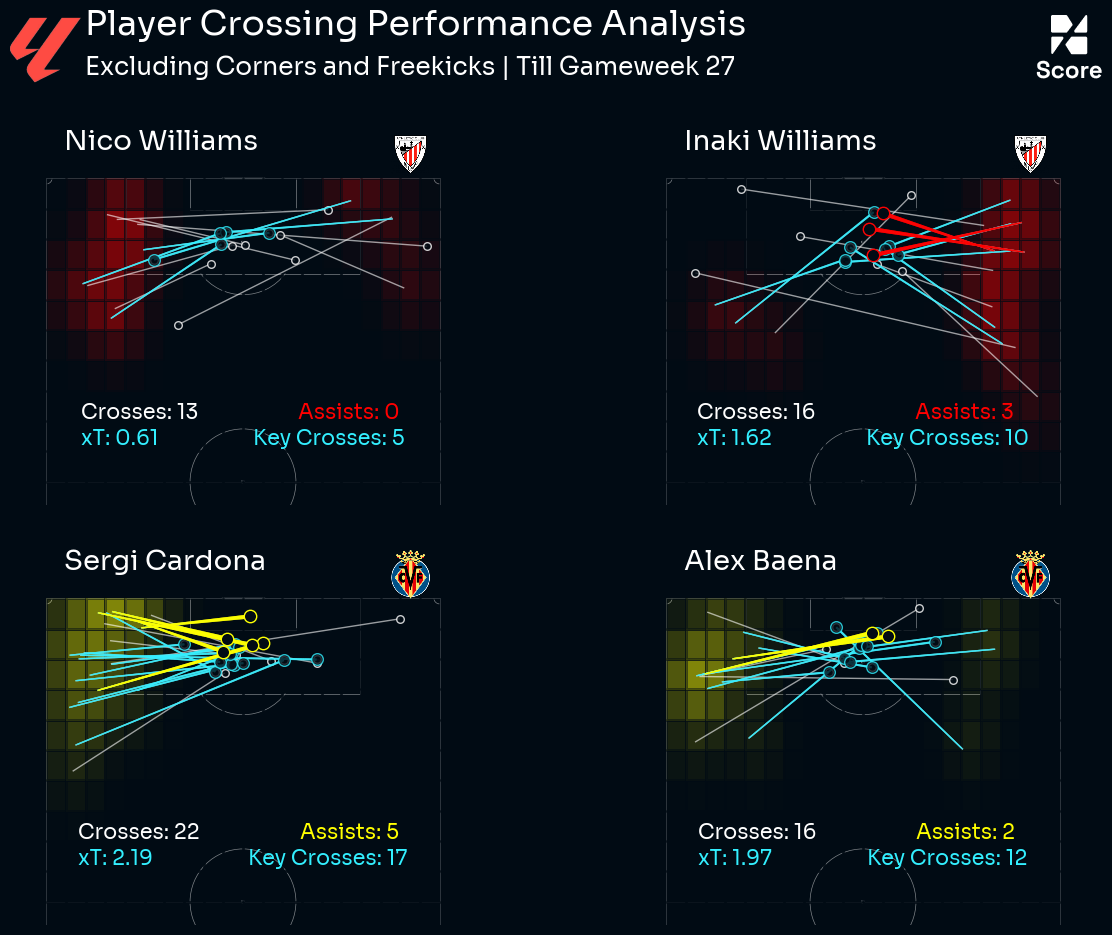

In [778]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10), facecolor=background)


fig.text(0.22,1,'Player Crossing Performance Analysis',font=font_prop,color='white', fontsize=25,fontweight='bold')
fig.text(0.22,0.96,'Excluding Corners and Freekicks | Till Gameweek 27',font=font_prop,color='white', fontsize=18,fontweight='regular')

player_passmap(axes[0,0],df_crosses_team, 'Nico Williams','Atletic Club','red')
player_passmap(axes[0,1],df_crosses_team, 'Inaki Williams','Atletic Club','red')
player_passmap(axes[1,0],df_crosses_team, 'Sergi Cardona','Villarreal','yellow')
player_passmap(axes[1,1],df_crosses_team, 'Alex Baena','Villarreal','yellow')

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.8, bottom=0.95, width=0.07, height=0.07,aspect='equal'
)

league_logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/LaLiga.png')

ax_image = add_image(
    league_logo, fig, left=0.16, bottom=0.95, width=0.07, height=0.07,aspect='equal'
)
plt.subplots_adjust(wspace=0)

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/LaLigaCrossing_2.png',dpi=500,bbox_inches = 'tight',facecolor=background)


### Players with the most shots from Crosses

In [794]:
query = """SELECT *
FROM understat_shots_tb
WHERE 
    league = 'La_Liga' 
    AND season = 2024 
    AND "lastAction" = 'Cross' 
    AND situation = 'OpenPlay'
    AND player IN (
        SELECT player
        FROM understat_shots_tb
        WHERE 
            league = 'La_Liga' 
            AND season = 2024 
            AND "lastAction" = 'Cross' 
            AND situation = 'OpenPlay'
        GROUP BY player
        ORDER BY COUNT(*) DESC
        LIMIT 4
    )
ORDER BY player, "xG" DESC;"""

with engine.connect() as conn:
    df_crosses_shots = pd.read_sql(query, conn)

In [796]:
df_crosses_shots['player'].unique()

array(['Ante Budimir', 'Kike García', 'Mikel Oyarzabal', 'Vedat Muriqi'],
      dtype=object)

In [798]:
df_crosses_shots.columns

Index(['id', 'minute', 'result', 'X', 'Y', 'xG', 'player', 'h_a', 'player_id',
       'situation', 'season', 'shotType', 'match_id', 'h_team', 'a_team',
       'h_goals', 'a_goals', 'date', 'player_assisted', 'lastAction',
       'league'],
      dtype='object')

In [800]:
# Convert 'X' to integer and then to float for accurate calculations
df_crosses_shots['X'] = pd.to_numeric(df_crosses_shots['X'], errors='coerce')
df_crosses_shots['X'] = (df_crosses_shots['X'] / 100) * 105 * 100  # Convert to cm based on 105m length

# Convert 'Y' similarly
df_crosses_shots['Y'] = pd.to_numeric(df_crosses_shots['Y'], errors='coerce')
df_crosses_shots['Y'] = (df_crosses_shots['Y'] / 100) * 68 * 100  # Convert to cm based on 68m width

df_crosses_shots['expectedGoals'] = df_crosses_shots['xG']
df_crosses_shots['expectedGoals'] = df_crosses_shots['xG']

df_crosses_shots['expectedGoals'] = pd.to_numeric(df_crosses_shots['expectedGoals'], errors='coerce')
df_crosses_shots['expectedGoals'] = pd.to_numeric(df_crosses_shots['expectedGoals'], errors='coerce')

In [829]:
def shotmap_player(ax,df_crosses_shots,player,team,team_color):
    shots_df = df_crosses_shots[df_crosses_shots['player'] == player]
    df_team = shots_df[(shots_df.result != 'Goal') & (shots_df.shotType != 'Head')].copy()
    
    df_team_goals = shots_df[(shots_df.result == 'Goal') & (shots_df.shotType != 'Head')].copy()
    
    df_team_headers_goals = shots_df[(shots_df.result == 'Goal') & (shots_df.shotType == 'Head')].copy()
    
    df_team_own_goals = shots_df[(shots_df.result == 'OwnGoal')].copy()
    
    df_team_headers = shots_df[(shots_df.result != 'Goal') & (shots_df.shotType == 'Head')].copy()
    
    team_xg = round(shots_df['expectedGoals'].astype(float).sum(),2)
    
    
    pitch = VerticalPitch(pitch_type='uefa',half=True, line_zorder=1
              ,pitch_color=background, line_color='white',linewidth=1)
    pitch.draw(ax=ax)
    
    #pitch.scatter(2,2,s=100,edgecolors='white', c='grey',marker='football',ax=ax,alpha=0.5,zorder=2)
    #ax.text(6, 2, 'GOAL', color = 'white', ha='center', va='center',fontsize=12,fontproperties=font_prop,zorder=2)
    pitch.scatter(55,20,s=100,edgecolors='yellow', c=background,marker='o',ax=ax,zorder=2)
    ax.text(10, 55, 'Header', color = 'white', ha='center', va='center',fontsize=10,fontproperties=font_prop,zorder=2)
    
    sc_team = pitch.scatter(df_team.X, df_team.Y, s=df_team.expectedGoals * 400,
                             edgecolors=background, c=team_color, ax=ax,zorder=2)
    sc_team_goals = pitch.scatter(df_team_goals.X, df_team_goals.Y, s=df_team_goals.expectedGoals * 700,
                             edgecolors='white', c=team_color,marker='football', ax=ax,zorder=2)
    sc_team_headers = pitch.scatter(df_team_headers.X, df_team_headers.Y, s=df_team_headers.expectedGoals * 400,
                             edgecolors='yellow', c=team_color,marker='o', ax=ax,zorder=2)
    sc_team_headers_goals = pitch.scatter(df_team_headers_goals.X, df_team_headers_goals.Y, s=df_team_headers_goals.expectedGoals * 700,
                             edgecolors='yellow', c=team_color,marker='football', ax=ax,zorder=2)
    sc_team_own_goals = pitch.scatter(df_team_own_goals.X, df_team_own_goals.Y, s=500,
                             edgecolors='orange', c=team_color,marker='football', ax=ax,zorder=2)

    ax.text(65, 75, f'Shots - {shots_df.shape[0]} (Headers - {df_team_headers.shape[0]})', color = 'white', ha='left', va='center',fontsize=15,fontproperties=font_prop,zorder=2)
    ax.text(65, 70, f'Goals - {df_team_goals.shape[0] + df_team_headers_goals.shape[0]}', color = 'white', ha='left', va='center',fontsize=15,fontproperties=font_prop,zorder=2)
    ax.text(65, 65, f'xG - {team_xg}', color = 'white', ha='left', va='center',fontsize=15,fontproperties=font_prop,zorder=2)

    
    fig.set_facecolor(background)
    ax.text(65,110,f"{player}", color='white', fontsize=20,fontproperties=font_prop)
    logo = get_team_logo(team)
    if logo:
        imagebox = OffsetImage(logo, zoom=0.2)  # Adjust zoom for size
        ab = AnnotationBbox(imagebox, (5, 109), frameon=False,transform=ax.transAxes,zorder=10)
        ax.add_artist(ab)
    else:
        print('No')

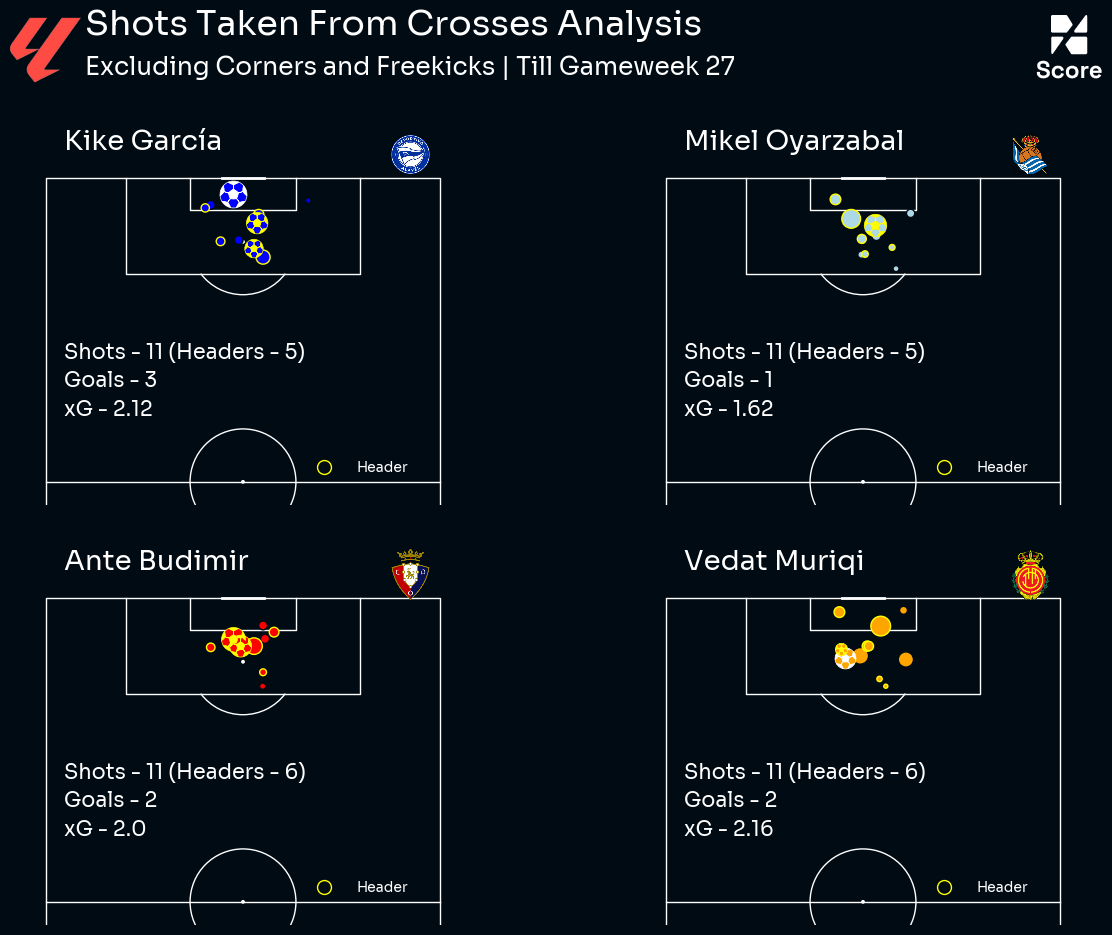

In [830]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10), facecolor=background)


fig.text(0.22,1,'Shots Taken From Crosses Analysis',font=font_prop,color='white', fontsize=25,fontweight='bold')
fig.text(0.22,0.96,'Excluding Corners and Freekicks | Till Gameweek 27',font=font_prop,color='white', fontsize=18,fontweight='regular')

shotmap_player(axes[0,0],df_crosses_shots, 'Kike García','Alaves','blue')
shotmap_player(axes[0,1],df_crosses_shots, 'Mikel Oyarzabal','Real Sociedad','lightblue')
shotmap_player(axes[1,0],df_crosses_shots, 'Ante Budimir','Osasuna','red')
shotmap_player(axes[1,1],df_crosses_shots, 'Vedat Muriqi','Mallorca','orange')

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.8, bottom=0.95, width=0.07, height=0.07,aspect='equal'
)

league_logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/LaLiga.png')

ax_image = add_image(
    league_logo, fig, left=0.16, bottom=0.95, width=0.07, height=0.07,aspect='equal'
)
plt.subplots_adjust(wspace=0)

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/LaLigaCrossing_3.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## Radar / Pizza Plots

In [35]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.image as mpimg

font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab[wght].ttf')
img1 = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/Images/Players/AK.jpg')

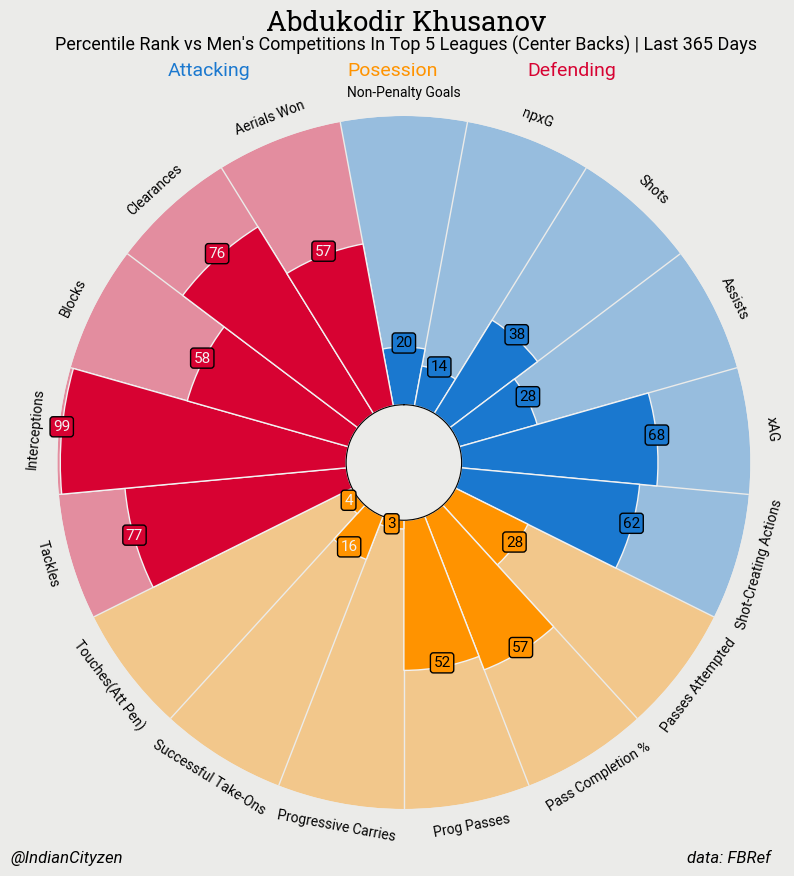

In [4]:
# parameter list
params = ["Non-Penalty Goals", "npxG", "Shots", "Assists", "xAG","Shot-Creating Actions",
          "Passes Attempted","Pass Completion %", "Prog Passes", "Progressive Carries", "Successful Take-Ons","Touches(Att Pen)",
          "Tackles","Interceptions","Blocks","Clearances","Aerials Won"]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [
    20, 14, 38, 28, 68,62,
    28, 57, 52, 3, 16,4,
    77, 99, 58, 76, 57
]

# color for the slices and text
slice_colors = ["#1A78CF"] * 6 + ["#FF9300"] * 6 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 7

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(9, 9),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=10,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Abdukodir Khusanov", size=20,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs Men's Competitions In Top 5 Leagues (Center Backs) | Last 365 Days",
    size=13,
    ha="center", fontproperties=font_normal.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: FBRef"

fig.text(
    0.92, 0.05, f"{CREDIT_1}", size=12,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

fig.text(
    0.2, 0.05, f"@IndianCityzen", size=12,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

# add text
fig.text(
    0.25, 0.925, "Attacking", size=14,
    fontproperties=font_normal.prop, color="#1a78cf"
)

fig.text(
    0.45, 0.925, "Posession", size=14,
    fontproperties=font_normal.prop, color="#ff9300"
)

fig.text(
    0.65, 0.925, "Defending", size=14,
    fontproperties=font_normal.prop, color="#d70232"
)

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/PlayerReports/AK.png',dpi=500,bbox_inches = 'tight',facecolor="#EBEBE9")

## xG For V xG Against Time Series Plot

In [94]:
query = """WITH team_shots AS (
    SELECT 
        h_team AS team,
        match_id,
        season,
        date,
        SUM("xG") AS xg_sum
    FROM understat_shots_tb
    WHERE league = 'Serie_A' AND season >= EXTRACT(YEAR FROM CURRENT_DATE) - 4 AND h_a = 'h'
    GROUP BY h_team, match_id, season, date
    
    UNION
    
    SELECT 
        a_team AS team,
        match_id,
        season,
        date,
        SUM("xG") AS xg_sum
    FROM understat_shots_tb
    WHERE league = 'Serie_A' AND season >= EXTRACT(YEAR FROM CURRENT_DATE) - 4 AND h_a = 'a'
    GROUP BY a_team, match_id, season, date
),
team_shots_against AS (
    SELECT 
        a_team AS team,
        match_id,
        season,
        date,
        SUM("xG") AS xg_against_sum
    FROM understat_shots_tb
    WHERE league = 'Serie_A' AND season >= EXTRACT(YEAR FROM CURRENT_DATE) - 4 AND h_a = 'h'
    GROUP BY a_team, match_id, season, date
    
    UNION
    
    SELECT 
        h_team AS team,
        match_id,
        season,
        date,
        SUM("xG") AS xg_against_sum
    FROM understat_shots_tb
    WHERE league = 'Serie_A' AND season >= EXTRACT(YEAR FROM CURRENT_DATE) - 4 AND h_a = 'a'
    GROUP BY h_team, match_id, season, date
),
team_matches AS (
    SELECT 
        shots.team,
        shots.season,
        shots.match_id,
        shots.date,
        shots.xg_sum,
        COALESCE(against.xg_against_sum, 0) AS xg_against_sum,
        ROW_NUMBER() OVER (PARTITION BY shots.team, shots.season ORDER BY shots.date) AS match_number
    FROM team_shots AS shots
    LEFT JOIN team_shots_against AS against
        ON shots.team = against.team AND shots.match_id = against.match_id
),
rolling_xg AS (
    SELECT 
        team,
        season,
        match_id,
        date,
        match_number,
        xg_sum,
        xg_against_sum,
        SUM(xg_sum) OVER (PARTITION BY team, season ORDER BY match_number ROWS BETWEEN 9 PRECEDING AND CURRENT ROW) AS rolling_xg,
        SUM(xg_against_sum) OVER (PARTITION BY team, season ORDER BY match_number ROWS BETWEEN 9 PRECEDING AND CURRENT ROW) AS rolling_xg_against
    FROM team_matches
)
SELECT 
    team,
    season,
    --match_id,
    date,
    xg_sum AS xg_per_game,            -- Sum of xG for the current game
    xg_against_sum AS xg_against_per_game, -- Sum of xG conceded for the current game
    rolling_xg,                       -- Rolling sum of xG over 10 games
    rolling_xg_against,                -- Rolling sum of xG conceded over 10 games
    rolling_xg - rolling_xg_against as rolling_diff
FROM rolling_xg
ORDER BY team, season, date;"""

with engine.connect() as conn:
    df_xg = pd.read_sql(query, conn)

In [95]:
df_xg['team'].unique()

array(['AC Milan', 'Atalanta', 'Bologna', 'Cagliari', 'Como', 'Cremonese',
       'Empoli', 'Fiorentina', 'Frosinone', 'Genoa', 'Inter', 'Juventus',
       'Lazio', 'Lecce', 'Monza', 'Napoli', 'Parma Calcio 1913', 'Roma',
       'Salernitana', 'Sampdoria', 'Sassuolo', 'Spezia', 'Torino',
       'Udinese', 'Venezia', 'Verona'], dtype=object)

In [96]:
df_team = df_xg[df_xg['team'] == 'AC Milan']

In [98]:
df_team.head(10)

team  season                date  xg_per_game  xg_against_per_game  \
0  AC Milan    2021 2021-08-23 18:45:00     0.807511             1.247570   
1  AC Milan    2021 2021-08-29 18:45:00     2.671691             0.406709   
2  AC Milan    2021 2021-09-12 16:00:00     3.761252             0.247830   
3  AC Milan    2021 2021-09-19 18:45:00     1.050324             1.315180   
4  AC Milan    2021 2021-09-22 18:45:00     2.114092             0.607282   
5  AC Milan    2021 2021-09-25 13:00:00     1.741024             0.953769   
6  AC Milan    2021 2021-10-03 18:45:00     2.739849             2.673553   
7  AC Milan    2021 2021-10-16 18:45:00     1.518525             1.583192   
8  AC Milan    2021 2021-10-23 18:45:00     0.917683             0.631008   
9  AC Milan    2021 2021-10-26 18:45:00     1.147733             0.488007   

   rolling_xg  rolling_xg_against  rolling_diff  
0    0.807511            1.247570     -0.440059  
1    3.479202            1.654279      1.824923  
2    7.240455            1.902109      5.338345  
3    8.290778            3.217289      5.073489  
4   10.404870            3.824571      6.580299  
5   12.145895            4.778341      7.367554  
6   14.885743            7.451894      7.433850  
7   16.404268            9.035085      7.369183  
8   17.321951            9.666093      7.655858  
9   18.469684           10.154100      8.315585

In [99]:
# Sort the dataframe by date
df_team = df_team.sort_values(by='date')

# Assign match numbers
df_team['Match Number'] = range(1, len(df_team) + 1)

# Reset the index (optional)
df_team = df_team.reset_index(drop=True)

In [91]:
df_team.columns

Index(['team', 'season', 'date', 'xg_per_game', 'xg_against_per_game',
       'rolling_xg', 'rolling_xg_against', 'rolling_diff', 'Match Number'],
      dtype='object')

In [92]:
38*4

152

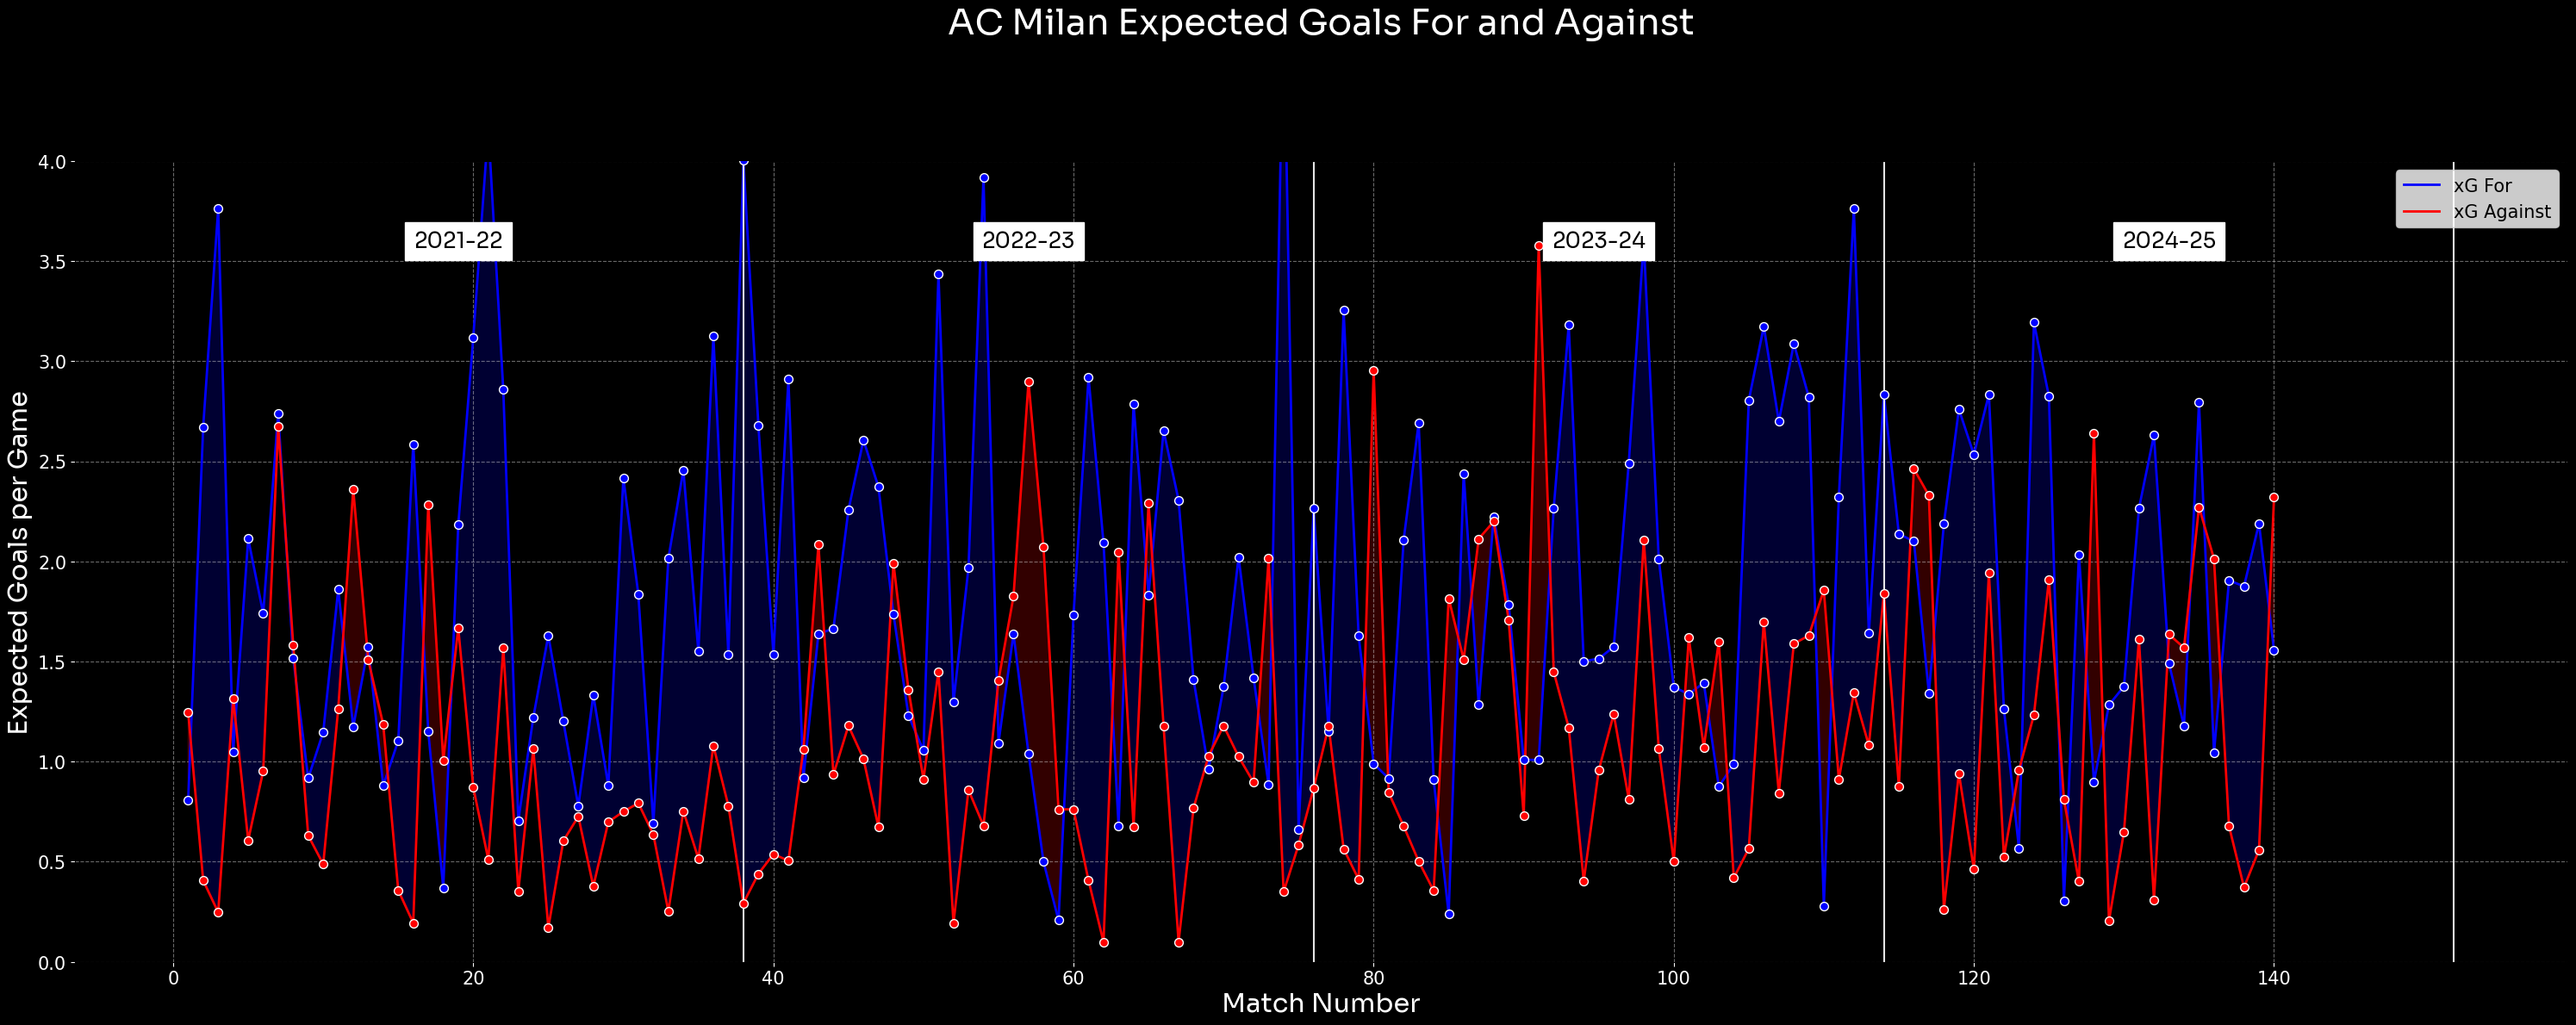

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import FancyArrow

fig, ax = plt.subplots(figsize=(30, 12))
fig.patch.set_facecolor(background)
ax.patch.set_facecolor(background)
# Plot xG For and Against
ax.plot(df_team['Match Number'], df_team['xg_per_game'], label='xG For', color='blue', lw=2)
ax.plot(df_team['Match Number'], df_team['xg_against_per_game'], label='xG Against', color='red', lw=2)

# Shaded area between xG For and Against
ax.fill_between(df_team['Match Number'], df_team['xg_per_game'], df_team['xg_against_per_game'],
                where=(df_team['xg_per_game'] > df_team['xg_against_per_game']), interpolate=True, color='blue', alpha=0.2)
ax.fill_between(df_team['Match Number'], df_team['xg_per_game'], df_team['xg_against_per_game'],
                where=(df_team['xg_per_game'] <= df_team['xg_against_per_game']), interpolate=True, color='red', alpha=0.2)


# Scatter points for actual xG For and xG Against
ax.scatter(df_team['Match Number'], df_team['xg_per_game'], color='blue', edgecolors='white', s=50, zorder=3)
ax.scatter(df_team['Match Number'], df_team['xg_against_per_game'], color='red', edgecolors='white', s=50, zorder=3)

# Add vertical lines and season annotations
season_splits = [38, 76, 114,152]  # Match numbers where seasons end
seasons = ['2021-22','2022-23','2023-24','2024-25']
for i, split in enumerate(season_splits):
    ax.axvline(split, color='white', linestyle='-', alpha=0.9)
    ax.text(split - 19, 3.6, seasons[i], color='black', backgroundcolor='white',
            ha='center', va='center', fontsize=18, font=font_prop)

# Customize chart
ax.set_title("AC Milan Expected Goals For and Against",font=font_prop,color='white',fontsize=30,y=1.15)
#ax.text(30,4.25,'Steve Cooper',color='black', backgroundcolor='white',
#            ha='center', va='center', fontsize=22, font=font_prop)

#ax.text(78,4.25,'Nuno Santo',color='black', backgroundcolor='white',
#            ha='center', va='center', fontsize=22, font=font_prop)

ax.set_xlabel('Match Number',color='white',font=font_prop, fontsize=22)
ax.set_ylabel('Expected Goals per Game',color='white',font=font_prop, fontsize=22)
ax.set_ylim(0, 4)
ax.grid(ls='--', color='lightgrey', alpha=0.5)
ax.legend(fontsize=15, loc='upper right')
ax.tick_params(axis='both', which='major',color='white', labelsize=10)


ax.tick_params(axis='x', colors='white', labelsize=15)  # X-axis tick labels in green
ax.tick_params(axis='y', colors='white', labelsize=15)
# Show plot
plt.tight_layout()

#plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/NotFor.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## Passing Networks

In [3]:
# Put the match HTML file path here
match_html_path = "C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/ManCity/29.html"

def extract_json_from_html(html_path, save_output=False):
    with open(html_path, 'r', encoding='utf-8') as html_file:
        html = html_file.read()

    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for JSON parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')

    if save_output:
        # save JSON data to txt
        output_file = open(f"{html_path}.txt", "wt", encoding='utf-8')
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt

def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict


json_data_txt = extract_json_from_html(match_html_path)
data = json.loads(json_data_txt)
events_dict, players_df, teams_dict = extract_data_from_dict(data)

df = pd.DataFrame(events_dict)
dfp = pd.DataFrame(players_df)

# Extract the 'displayName' value
df['type'] = df['type'].apply(lambda x: x['displayName'] if isinstance(x, dict) else None)
df['outcomeType'] = df['outcomeType'].apply(lambda x: x['displayName'] if isinstance(x, dict) else None)
df['period'] = df['period'].apply(lambda x: x['displayName'] if isinstance(x, dict) else None)

# temprary use of typeId of period column
df['period'] = df['period'].replace({'FirstHalf': 1, 'SecondHalf': 2, 'FirstPeriodOfExtraTime': 3, 'SecondPeriodOfExtraTime': 4,
                                     'PenaltyShootout': 5, 'PostGame': 14, 'PreMatch': 16})

# new column for cumulative minutes, This part is taken from the "jakeyk11.github.io" github repository and modified for my use
def cumulative_match_mins(events_df):
    events_out = pd.DataFrame()
    # Add cumulative time to events data, resetting for each unique match
    match_events = events_df.copy()
    match_events['cumulative_mins'] = match_events['minute'] + (1/60) * match_events['second']
    # Add time increment to cumulative minutes based on period of game.
    for period in np.arange(1, match_events['period'].max() + 1, 1):
        if period > 1:
            t_delta = match_events[match_events['period'] == period - 1]['cumulative_mins'].max() - \
                                   match_events[match_events['period'] == period]['cumulative_mins'].min()
        elif period == 1 or period == 5:
            t_delta = 0
        else:
            t_delta = 0
        match_events.loc[match_events['period'] == period, 'cumulative_mins'] += t_delta
    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events])
    return events_out

df = cumulative_match_mins(df)

# Extracting the carry data and merge it with the main df, This part is also taken from the "jakeyk11.github.io" github repository and modified for my use
def insert_ball_carries(events_df, min_carry_length=3, max_carry_length=60, min_carry_duration=1, max_carry_duration=10):
    events_out = pd.DataFrame()
    # Carry conditions (convert from metres to opta)
    min_carry_length = 3.0
    max_carry_length = 60.0
    min_carry_duration = 1.0
    max_carry_duration = 10.0
    # match_events = events_df[events_df['match_id'] == match_id].reset_index()
    match_events = events_df.reset_index()
    match_carries = pd.DataFrame()

    for idx, match_event in match_events.iterrows():

        if idx < len(match_events) - 1:
            prev_evt_team = match_event['teamId']
            next_evt_idx = idx + 1
            init_next_evt = match_events.loc[next_evt_idx]
            take_ons = 0
            incorrect_next_evt = True

            while incorrect_next_evt:

                next_evt = match_events.loc[next_evt_idx]

                if next_evt['type'] == 'TakeOn' and next_evt['outcomeType'] == 'Successful':
                    take_ons += 1
                    incorrect_next_evt = True

                elif ((next_evt['type'] == 'TakeOn' and next_evt['outcomeType'] == 'Unsuccessful')
                      or (next_evt['teamId'] != prev_evt_team and next_evt['type'] == 'Challenge' and next_evt['outcomeType'] == 'Unsuccessful')
                      or (next_evt['type'] == 'Foul')):
                    incorrect_next_evt = True

                else:
                    incorrect_next_evt = False

                next_evt_idx += 1

            # Apply some conditioning to determine whether carry criteria is satisfied
            same_team = prev_evt_team == next_evt['teamId']
            not_ball_touch = match_event['type'] != 'BallTouch'
            dx = 105*(match_event['endX'] - next_evt['x'])/100
            dy = 68*(match_event['endY'] - next_evt['y'])/100
            far_enough = dx ** 2 + dy ** 2 >= min_carry_length ** 2
            not_too_far = dx ** 2 + dy ** 2 <= max_carry_length ** 2
            dt = 60 * (next_evt['cumulative_mins'] - match_event['cumulative_mins'])
            min_time = dt >= min_carry_duration
            same_phase = dt < max_carry_duration
            same_period = match_event['period'] == next_evt['period']

            valid_carry = same_team & not_ball_touch & far_enough & not_too_far & min_time & same_phase &same_period

            if valid_carry:
                carry = pd.DataFrame()
                prev = match_event
                nex = next_evt

                carry.loc[0, 'eventId'] = prev['eventId'] + 0.5
                carry['minute'] = np.floor(((init_next_evt['minute'] * 60 + init_next_evt['second']) + (
                        prev['minute'] * 60 + prev['second'])) / (2 * 60))
                carry['second'] = (((init_next_evt['minute'] * 60 + init_next_evt['second']) +
                                    (prev['minute'] * 60 + prev['second'])) / 2) - (carry['minute'] * 60)
                carry['teamId'] = nex['teamId']
                carry['x'] = prev['endX']
                carry['y'] = prev['endY']
                carry['expandedMinute'] = np.floor(((init_next_evt['expandedMinute'] * 60 + init_next_evt['second']) +
                                                    (prev['expandedMinute'] * 60 + prev['second'])) / (2 * 60))
                carry['period'] = nex['period']
                carry['type'] = carry.apply(lambda x: {'value': 99, 'displayName': 'Carry'}, axis=1)
                carry['outcomeType'] = 'Successful'
                carry['qualifiers'] = carry.apply(lambda x: {'type': {'value': 999, 'displayName': 'takeOns'}, 'value': str(take_ons)}, axis=1)
                carry['satisfiedEventsTypes'] = carry.apply(lambda x: [], axis=1)
                carry['isTouch'] = True
                carry['playerId'] = nex['playerId']
                carry['endX'] = nex['x']
                carry['endY'] = nex['y']
                carry['blockedX'] = np.nan
                carry['blockedY'] = np.nan
                carry['goalMouthZ'] = np.nan
                carry['goalMouthY'] = np.nan
                carry['isShot'] = np.nan
                carry['relatedEventId'] = nex['eventId']
                carry['relatedPlayerId'] = np.nan
                carry['isGoal'] = np.nan
                carry['cardType'] = np.nan
                carry['isOwnGoal'] = np.nan
                carry['type'] = 'Carry'
                carry['cumulative_mins'] = (prev['cumulative_mins'] + init_next_evt['cumulative_mins']) / 2

                match_carries = pd.concat([match_carries, carry], ignore_index=True, sort=False)

    match_events_and_carries = pd.concat([match_carries, match_events], ignore_index=True, sort=False)
    match_events_and_carries = match_events_and_carries.sort_values(['period', 'cumulative_mins']).reset_index(drop=True)

    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events_and_carries])

    return events_out

df = insert_ball_carries(df, min_carry_length=3, max_carry_length=60, min_carry_duration=1, max_carry_duration=10)

df = df.reset_index(drop=True)
df['index'] = range(1, len(df) + 1)
df = df[['index'] + [col for col in df.columns if col != 'index']]

# Assign xT values
df_base  = df
dfxT = df_base.copy()
dfxT['qualifiers'] = dfxT['qualifiers'].astype(str)
dfxT = dfxT[(~dfxT['qualifiers'].str.contains('Corner'))]
dfxT = dfxT[(dfxT['type'].isin(['Pass', 'Carry'])) & (dfxT['outcomeType']=='Successful')]


xT = pd.read_csv('https://raw.githubusercontent.com/mckayjohns/youtube-videos/main/data/xT_Grid.csv', header=None) # use this if you don't have your own xT value Grid
# xT = pd.read_csv("/content/xT_Grid.csv", header=None)    # use this if you have your own xT value Grid, then place your file path here
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

dfxT['x1_bin_xT'] = pd.cut(dfxT['x'], bins=xT_cols, labels=False)
dfxT['y1_bin_xT'] = pd.cut(dfxT['y'], bins=xT_rows, labels=False)
dfxT['x2_bin_xT'] = pd.cut(dfxT['endX'], bins=xT_cols, labels=False)
dfxT['y2_bin_xT'] = pd.cut(dfxT['endY'], bins=xT_rows, labels=False)

dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)

dfxT['xT'] = dfxT['end_zone_value_xT'] - dfxT['start_zone_value_xT']
columns_to_drop = ['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y', 'expandedMinute', 'period', 'outcomeType', 'qualifiers',  'type',
                   'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY', 'relatedEventId', 'relatedPlayerId', 'blockedX', 'blockedY',
                   'goalMouthZ', 'goalMouthY', 'isShot', 'cumulative_mins']
dfxT.drop(columns=columns_to_drop, inplace=True)

df = df.merge(dfxT, on='index', how='left')

# New Column for Team Names and Oppositon TeamNames
df['teamName'] = df['teamId'].map(teams_dict)
team_names = list(teams_dict.values())
opposition_dict = {team_names[i]: team_names[1-i] for i in range(len(team_names))}
df['oppositionTeamName'] = df['teamName'].map(opposition_dict)

# Reshaping the data from 100x100 to 105x68, as I use the pitch_type='uefa', in the pitch function, you can consider according to your use
df['x'] = df['x']*1.05
df['y'] = df['y']*0.68
df['endX'] = df['endX']*1.05
df['endY'] = df['endY']*0.68
df['goalMouthY'] = df['goalMouthY']*0.68

columns_to_drop = ['height', 'weight', 'age', 'isManOfTheMatch', 'field', 'stats',
                   'subbedInPlayerId', 'subbedOutPeriod',
                   'subbedOutExpandedMinute', 'subbedInPeriod', 'subbedInExpandedMinute', 'subbedOutPlayerId',
                   'teamId']
dfp.drop(columns=columns_to_drop, inplace=True)

# adding player name, shirt no. etc info
df = df.merge(dfp, on='playerId', how='left')

df['qualifiers'] = df['qualifiers'].astype(str)
# Calculating passing distance, to find out progressive pass, this will just show the distance reduced by a pass, then will be able to filter passes which has reduced distance value more than 10yds as a progressive pass
df['prog_pass'] = np.where((df['type'] == 'Pass'),
                           np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['endX'])**2 + (34 - df['endY'])**2), 0)
# Calculating carrying distance, to find out progressive carry, this will just show the distance reduced by a carry, then will be able to filter carries which has reduced distance value more than 10yds as a progressive carry
df['prog_carry'] = np.where((df['type'] == 'Carry'),
                            np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['endX'])**2 + (34 - df['endY'])**2), 0)
df['pass_or_carry_angle'] = np.degrees(np.arctan2(df['endY'] - df['y'], df['endX'] - df['x']))

# Making all the alphabets in the name as English Alphabets only (for example: Á will be replaced by A)
df['name'] = df['name'].astype(str)
df['name'] = df['name'].apply(unidecode)

# Function to extract short names
def get_short_name(full_name):
    if pd.isna(full_name):
        return full_name
    parts = full_name.split()
    if len(parts) == 1:
        return full_name  # No need for short name if there's only one word
    elif len(parts) == 2:
        return parts[0][0] + ". " + parts[1]
    else:
        return parts[0][0] + ". " + parts[1][0] + ". " + " ".join(parts[2:])

# Applying the function to create 'shortName' column
df['shortName'] = df['name'].apply(get_short_name)

df['qualifiers'] = df['qualifiers'].astype(str)
columns_to_drop2 = ['id']
df.drop(columns=columns_to_drop2, inplace=True)

df['period'] = df['period'].replace({1: 'FirstHalf', 2: 'SecondHalf', 3: 'FirstPeriodOfExtraTime', 4: 'SecondPeriodOfExtraTime',
                                     5: 'PenaltyShootout', 14: 'PostGame', 16: 'PreMatch'})

C:\Users\acer\AppData\Local\Temp\ipykernel_10760\1654932490.py:206: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
C:\Users\acer\AppData\Local\Temp\ipykernel_10760\1654932490.py:207: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)


In [38]:
team1_name = 'Man City'
team2_name = 'Club Bruges'

team1_facecolor = 'white'
team2_facecolor = '#76b4e5'

In [42]:
import matplotlib.patheffects as path_effects
from matplotlib.colors import to_rgba

def get_passes_df(df):
    df1 = df[~df['type'].str.contains('SubstitutionOn|FormationChange|FormationSet|Card')]
    df = df1
    df.loc[:, "receiver"] = df["playerId"].shift(-1)
    passes_ids = df.index[df['type'] == 'Pass']
    df_passes = df.loc[passes_ids, ["index", "x", "y","minute", "endX", "endY", "teamName", "playerId", "receiver", "type", "outcomeType", "pass_or_carry_angle"]]

    return df_passes

passes_df = get_passes_df(df)
path_eff = [path_effects.Stroke(linewidth=3, foreground=background), path_effects.Normal()]

def passing_stats(teamName, df):
    dfpass = df[(df['teamName'] == teamName) & (df['type'] == 'Pass')]

    total_passes = dfpass.shape[0]
    acc_pass = dfpass[dfpass['outcomeType'] == 'Successful']
    through_pass = dfpass[(dfpass['qualifiers'].str.contains('Throughball')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    Lng_ball = dfpass[(dfpass['qualifiers'].str.contains('Longball')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    Crosses = dfpass[(dfpass['qualifiers'].str.contains('Cross')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    pen_box = acc_pass[(acc_pass['endX'] >= 88.5) & (acc_pass['endY'] >= 13.6) & (acc_pass['endY'] <= 54.4) & 
                       (~acc_pass['qualifiers'].str.contains('CornerTaken|Freekick'))]

    return total_passes, acc_pass.shape[0], Lng_ball.shape[0], Crosses.shape[0], pen_box.shape[0]

import pandas as pd
from unidecode import unidecode

def get_passes_and_stats(teamName, passes_df, players_df, events_df, time_range):
    """
    Computes passing networks and key passing statistics for a given team within a specified time range.

    Parameters:
    - teamName (str): Name of the team to analyze.
    - passes_df (pd.DataFrame): DataFrame containing pass events.
    - players_df (pd.DataFrame): DataFrame with player details.
    - events_df (pd.DataFrame): DataFrame with all match events (for player positions).
    - time_range (tuple): (start_min, end_min) time range to filter events.

    Returns:
    - passes_between_df (pd.DataFrame): Pass network between players.
    - average_locs_and_count_df (pd.DataFrame): Average player locations and pass count.
    - pass_stats (dict): Dictionary containing key passing statistics.
    """
    start_min, end_min = time_range

    # Filter passes within the given time range and team
    passes_df = passes_df[
        (passes_df["teamName"] == teamName) & 
        (passes_df["minute"] >= start_min) & (passes_df["minute"] < end_min)
    ]

    # Filter events within the given time range and team
    dfteam = events_df[
        (events_df['teamName'] == teamName) & 
        (events_df['minute'] >= start_min) & (events_df['minute'] < end_min) & 
        (~events_df['type'].str.contains('SubstitutionOn|FormationChange|FormationSet|Card'))
    ]

    # Merge with player information
    passes_df = passes_df.merge(players_df[["playerId", "isFirstEleven"]], on='playerId', how='left')

    # Calculate median positions for players
    average_locs_and_count_df = dfteam.groupby('playerId').agg({'x': ['median'], 'y': ['median', 'count']})
    average_locs_and_count_df.columns = ['pass_avg_x', 'pass_avg_y', 'count']

    # Merge player details
    average_locs_and_count_df = average_locs_and_count_df.merge(
        players_df[['playerId', 'name', 'shirtNo', 'position', 'isFirstEleven']], 
        on='playerId', how='left'
    ).set_index('playerId')

    # Normalize player names
    average_locs_and_count_df['name'] = average_locs_and_count_df['name'].apply(unidecode)

    # Get passes between each player
    passes_player_ids_df = passes_df[['playerId', 'receiver']]
    passes_player_ids_df['pos_max'] = passes_player_ids_df[['playerId', 'receiver']].max(axis='columns')
    passes_player_ids_df['pos_min'] = passes_player_ids_df[['playerId', 'receiver']].min(axis='columns')

    # Count passes between player pairs
    passes_between_df = passes_player_ids_df.groupby(['pos_min', 'pos_max']).size().reset_index(name='pass_count')

    # Merge with player locations
    passes_between_df = passes_between_df.merge(
        average_locs_and_count_df, left_on='pos_min', right_index=True
    ).merge(
        average_locs_and_count_df, left_on='pos_max', right_index=True, suffixes=['', '_end']
    )

    ### Passing Statistics ###
    dfpass = dfteam[dfteam['type'] == 'Pass'].copy()

    # Assign receivers by shifting playerId
    dfpass.loc[:, "receiver"] = dfpass["playerId"].shift(-1)

    # Pass count per player
    passes_count = dfpass["playerId"].value_counts()

    # Most passes made
    most_passes_player = players_df.loc[players_df["playerId"] == passes_count.idxmax(), "name"].values[0]
    most_passes_count = passes_count.max()

    # Key passes
    key_pass = dfpass[dfpass['qualifiers'].str.contains('KeyPass', na=False)]
    key_passes_count = key_pass["playerId"].value_counts()

    if not key_passes_count.empty:
        most_key_passes_player = players_df.loc[players_df["playerId"] == key_passes_count.idxmax(), "name"].values[0]
        most_key_passes_count = key_passes_count.max()
    else:
        most_key_passes_player, most_key_passes_count = None, 0

    # Most passes received
    most_passes_received_count = dfpass["receiver"].value_counts()

    if not most_passes_received_count.empty:
        most_passes_received_player = players_df.loc[players_df["playerId"] == most_passes_received_count.idxmax(), "name"].values[0]
        most_passes_received_count = most_passes_received_count.max()
    else:
        most_passes_received_player, most_passes_received_count = None, 0

    # Most key passes received
    most_key_passes_received_count = dfpass[dfpass['qualifiers'].str.contains('KeyPass', na=False)]["receiver"].value_counts()

    if not most_key_passes_received_count.empty:
        most_key_passes_received_player = players_df.loc[players_df["playerId"] == most_key_passes_received_count.idxmax(), "name"].values[0]
        most_key_passes_received_count = most_key_passes_received_count.max()
    else:
        most_key_passes_received_player, most_key_passes_received_count = None, 0

    # Expected Threat (xT) Contribution
    if "xT" in dfpass.columns:
        player_xT_sum = dfpass.groupby("playerId")["xT"].sum()

        if not player_xT_sum.empty:
            top_xT_player = players_df.loc[players_df["playerId"] == player_xT_sum.idxmax(), "name"].values[0]
            top_xT_value = player_xT_sum.max()
        else:
            top_xT_player, top_xT_value = None, 0
    else:
        top_xT_player, top_xT_value = None, 0

    # Store stats in a dictionary
    pass_stats = {
        "most_passes_player": most_passes_player,
        "most_passes_count": most_passes_count,
        "most_key_passes_player": most_key_passes_player,
        "most_key_passes_count": most_key_passes_count,
        "most_passes_received_player": most_passes_received_player,
        "most_passes_received_count": most_passes_received_count,
        "most_key_passes_received_player": most_key_passes_received_player,
        "most_key_passes_received_count": most_key_passes_received_count,
        "top_xT_player": top_xT_player,
        "top_xT_value": top_xT_value
    }

    return passes_between_df, average_locs_and_count_df, pass_stats


In [81]:
def calculate_centralization_index(teamName, passes_df, players_df, events_df, time_range):
    """
    Calculate the centralization index for a given team within a specified time range.

    Parameters:
    - teamName (str): Name of the team to analyze.
    - passes_df (pd.DataFrame): DataFrame containing pass events.
    - players_df (pd.DataFrame): DataFrame with player details.
    - events_df (pd.DataFrame): DataFrame with all match events (for player positions).
    - time_range (tuple): (start_min, end_min) time range to filter events.

    Returns:
    - centralization_index (float): The calculated centralization index for the team.
    """
    start_min, end_min = time_range

    # Filter passes within the given time range and team
    passes_df = passes_df[
        (passes_df["teamName"] == teamName) & 
        (passes_df["minute"] >= start_min) & (passes_df["minute"] < end_min)
    ]

    # Calculate number of passes made by each player
    player_passes_count = passes_df["playerId"].value_counts()

    # Get the total number of passes made by the team
    total_passes = player_passes_count.sum()

    # Get the maximal number of passes made by a single player
    max_passes = player_passes_count.max()

    # Number of players in the team
    num_players = len(player_passes_count)

    # Calculate the denominator (Total passes * (Number of players - 1))
    denominator = total_passes * 10

    # Calculate the numerator (sum of (Max passes - Player passes))
    numerator = sum(max_passes - player_passes_count)

    # Calculate the centralization index
    centralization_index = numerator / denominator if denominator != 0 else 0

    return centralization_index

In [101]:
def pass_network_visualization(ax, passes_between_df, average_locs_and_count_df, col, teamName,MAX_LINE_WIDTH, flipped=False):
    home_passes_between_df_1st_half, home_avg_locs_1st_half, home_pass_stats_1st_half  = get_passes_and_stats(
    team1_name, passes_df, players_df, df, time_range=(0, 45)
    )
    
    # Compute passing network for team1 after 45 minutes
    home_passes_between_df_2nd_half, home_avg_locs_2nd_half, home_pass_stats_2nd_half  = get_passes_and_stats(
        team1_name, passes_df, players_df, df, time_range=(46, 80)
    )
    MAX_MARKER_SIZE = 1500
    line_color='white'
    passes_between_df['width'] = (passes_between_df.pass_count / passes_between_df.pass_count.max()) * MAX_LINE_WIDTH
    average_locs_and_count_df['marker_size'] = (average_locs_and_count_df['count']/ average_locs_and_count_df['count'].max() * MAX_MARKER_SIZE) #You can plot variable size of each player's node according to their passing volume, in the plot using this
    MIN_TRANSPARENCY = 0.25
    MAX_TRANSPARENCY = 0.95
    color = np.array(to_rgba(col))
    color = np.tile(color, (len(passes_between_df), 1))
    c_transparency = passes_between_df.pass_count / passes_between_df.pass_count.max()
    c_transparency = (c_transparency * (MAX_TRANSPARENCY - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency

    pitch = VerticalPitch(pitch_type='uefa', corner_arcs=True, pitch_color=background, line_color='white', linewidth=0.5,
                         positional=True, shade_middle=True, positional_color='#C94948', shade_color='grey',shade_alpha=0.3,positional_alpha=0.5)
    pitch.draw(ax=ax)
    ax.set_aspect('equal')
    #ax.set_xlim(-0.5, 105.5)
    #ax.set_ylim(-0.5, 68.5)

    # Plotting those lines between players
    pass_lines = pitch.lines(passes_between_df.pass_avg_x, passes_between_df.pass_avg_y, passes_between_df.pass_avg_x_end, passes_between_df.pass_avg_y_end,
                             lw=passes_between_df.width, color=color, zorder=1, ax=ax)
    #pitch.arrows(passes_between_df.pass_avg_x, passes_between_df.pass_avg_y,
    #         passes_between_df.pass_avg_x_end, passes_between_df.pass_avg_y_end, width=passes_between_df.width,
    #         headwidth=10, headlength=10, color=col, ax=ax,label='')
    
    # Plotting the player nodes
    for index, row in average_locs_and_count_df.iterrows():
      #if row['isFirstEleven'] == True:
        pass_nodes = pitch.scatter(row['pass_avg_x'], row['pass_avg_y'], s=row['marker_size'], marker='o', color=background, edgecolor=line_color, linewidth=2, alpha=1, ax=ax)
      #else:
        #pass_nodes = pitch.scatter(row['pass_avg_x'], row['pass_avg_y'], s=900, marker='s', color=background, edgecolor=line_color, linewidth=2, alpha=0.7, ax=ax)

    # Plotting the shirt no. of each player
    for index, row in average_locs_and_count_df.iterrows():
        #if row['isFirstEleven'] == True:
        player_initials = row["shirtNo"]
        pitch.annotate(player_initials, xy=(row.pass_avg_x, row.pass_avg_y), c=col, ha='center', va='center', size=14, ax=ax)

    # Defense line Passing Height (avg. height of all the passes made by the Center Backs)
    center_backs_height = average_locs_and_count_df[average_locs_and_count_df['position']=='DC']
    def_line_h = round(center_backs_height['pass_avg_x'].median(), 2)
    #ax.axvline(x=def_line_h, color='white', linestyle='dotted', alpha=0.7, linewidth=2)

    # Getting the top passers combination
    passes_between_df = passes_between_df.sort_values(by='pass_count', ascending=False).head(1).reset_index(drop=True)
    most_pass_from = passes_between_df['name'][0]
    most_pass_from_no = passes_between_df['shirtNo'][0]
    most_pass_to = passes_between_df['name_end'][0]
    most_pass_to_no = passes_between_df['shirtNo_end'][0]
    most_pass_count = passes_between_df['pass_count'][0]

    # Calculate centralization index for team1 during the first half (0-45 minutes)
    centralization_index_1st_half = calculate_centralization_index(team1_name, passes_df, players_df, df, time_range=(0, 45))

    # Calculate centralization index for team1 during the second half (46-90 minutes)
    centralization_index_2nd_half = calculate_centralization_index(team1_name, passes_df, players_df, df, time_range=(46, 80))

    # Headlines and other texts
    if col == team1_facecolor:
        #ax.text(0.85, -0.05, f"Average On Ball Defensive Line = {def_line_h}m", color='white',fontproperties=font_prop, size=13,ha='right', transform=ax.transAxes)
        #ax.text(0.99, -0.1, f"{most_pass_from} ({most_pass_from_no}) to {most_pass_to} ({most_pass_to_no}) {most_pass_count} Passes", color='white',fontproperties=font_prop, size=13,ha='right', transform=ax.transAxes)
        ax.text(0.5,1,f"Before First Sub (0-45)", color=line_color,fontproperties=font_prop, size=20,ha='center', transform=ax.transAxes)
        ax_text(70,-12,f"Most Passes From <{home_pass_stats_1st_half['most_passes_player']}> {home_pass_stats_1st_half['most_passes_count']}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team1_facecolor}], size=13,ha='left', ax=ax)
        
        ax_text(70,-5,f"Centralization Index <{round(centralization_index_1st_half,3)}>",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team1_facecolor}], size=13,ha='left', ax=ax)
        
        ax_text(70,-19,f"Most Key Passes From <{home_pass_stats_1st_half['most_key_passes_player']}> {home_pass_stats_1st_half['most_key_passes_count']}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team1_facecolor}], size=13,ha='left', ax=ax)
        ax_text(70,-26,f"Most Key Passes To <{home_pass_stats_1st_half['most_key_passes_received_player']}> {home_pass_stats_1st_half['most_key_passes_received_count']}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team1_facecolor}], size=13,ha='left', ax=ax)
        ax_text(70,-33,f"Highest xT Passes From <{home_pass_stats_1st_half['top_xT_player']}> {round(home_pass_stats_1st_half['top_xT_value'],2)}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team1_facecolor}], size=13,ha='left',ax=ax)
        
    else:
        
      #ax.text(0.9, -0.05, f"Average On Ball Defensive Line = {def_line_h}m", color='white',fontproperties=font_prop, size=13,ha='right', transform=ax.transAxes)
      #ax.text(0.99, -0.1, f"{most_pass_from} ({most_pass_from_no}) to {most_pass_to} ({most_pass_to_no}) {most_pass_count} Passes", color='white',fontproperties=font_prop, size=13,ha='right', transform=ax.transAxes)
      ax.text(0.5,1,f"After First Sub (46-80)", color=line_color,fontproperties=font_prop, size=20,ha='center', transform=ax.transAxes)
      ax_text(70,-12,f"Most Passes From <{home_pass_stats_2nd_half['most_passes_player']}> {home_pass_stats_2nd_half['most_passes_count']}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team2_facecolor}], size=13,ha='left', ax=ax)
      
      ax_text(70,-5,f"Centralization Index <{round(centralization_index_2nd_half,3)}>",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team2_facecolor}], size=13,ha='left', ax=ax)
      
      ax_text(70,-19,f"Most Key Passes From <{home_pass_stats_2nd_half['most_key_passes_player']}> {home_pass_stats_2nd_half['most_key_passes_count']}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team2_facecolor}], size=13,ha='left', ax=ax)
      ax_text(70,-26,f"Most Key Passes To <{home_pass_stats_2nd_half['most_key_passes_received_player']}> {home_pass_stats_2nd_half['most_key_passes_received_count']}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team2_facecolor}], size=13,ha='left', ax=ax)
      ax_text(70,-33,f"Highest xT Passes From <{home_pass_stats_2nd_half['top_xT_player']}> {round(home_pass_stats_2nd_half['top_xT_value'],2)}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team2_facecolor}], size=13,ha='left',ax=ax)

    return

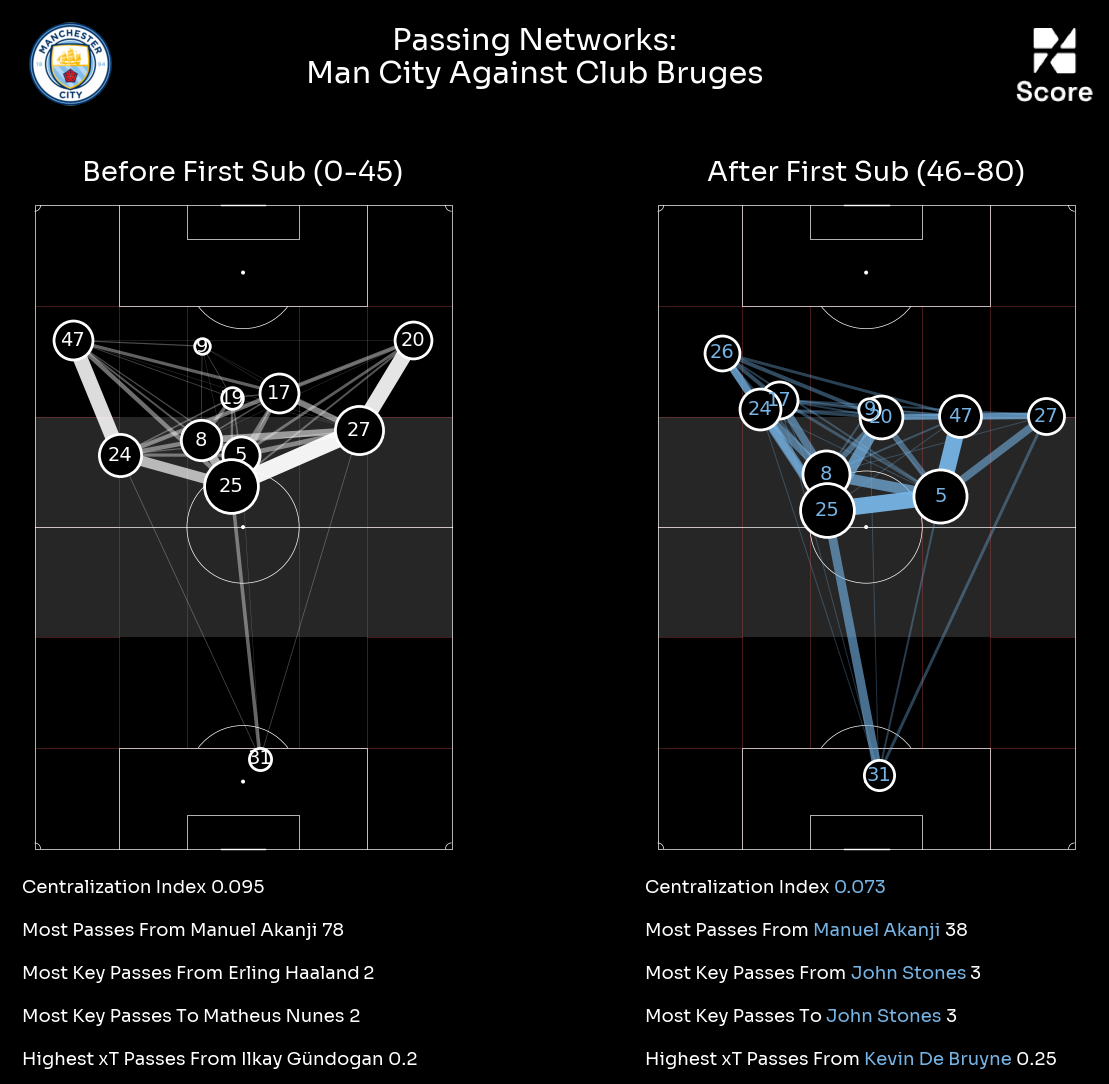

In [118]:
fig,axs=plt.subplots(1,2, figsize=(16,9), facecolor=background)

plt.subplots_adjust(wspace=0.01)

fig.suptitle(f'Passing Networks:\n{team1_name} Against {team2_name}', fontsize=22,fontproperties=font_prop, color='white', y=1.05)

img_team1 = mpimg.imread(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/{team1_name}.png')
ax_image = add_image(
    img_team1, fig, left=0.15, bottom=0.95, width=0.12, height=0.12,aspect='equal'
)

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')
ax_image = add_image(
    logo, fig, left=0.78, bottom=0.96, width=0.09, height=0.09,aspect='equal'
)

pass_network_stats_home = pass_network_visualization(axs[0], home_passes_between_df_1st_half, home_avg_locs_1st_half, team1_facecolor, team1_name,12)
pass_network_stats_away = pass_network_visualization(axs[1], home_passes_between_df_2nd_half, home_avg_locs_2nd_half, team2_facecolor, team1_name,12)
#action_types = ['Passes', 'Acc Passes', 'Long Ball','Crosses', 'Penalty Box']
#plot_donut_charts(axs[1],action_types,passing_stats(team1_name,df),passing_stats(team2_name,df),team1_name,team2_name)
plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/PassingNetworks.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## xG Per Game State

### When Losing/Drawing

In [201]:
query = """WITH ShotGameState AS (
    SELECT 
        s.*,
        CASE 
            WHEN h_a = 'h' AND h_goals > a_goals THEN 'winning'
            WHEN h_a = 'h' AND h_goals = a_goals THEN 'drawing'
            WHEN h_a = 'h' AND h_goals < a_goals THEN 'losing'
            WHEN h_a = 'a' AND a_goals > h_goals THEN 'winning'
            WHEN h_a = 'a' AND a_goals = h_goals THEN 'drawing'
            WHEN h_a = 'a' AND a_goals < h_goals THEN 'losing'
        END AS game_state,
        CASE WHEN h_a = 'h' THEN h_team ELSE a_team END AS team
    FROM understat_shots_tb s
    WHERE season = '2024' and league = 'EPL'
), 

StateChange AS (
    SELECT 
        team, 
        league,
        match_id,
        minute,
        game_state,
        result,
        "xG",
        (CASE WHEN result = 'goal' THEN 1 ELSE 0 END) AS goal,
        LAG(game_state) OVER (PARTITION BY team, match_id ORDER BY minute) AS prev_game_state
    FROM ShotGameState
),

FilteredShots AS (
    SELECT 
        team, 
        league,
        match_id,
        SUM(CASE WHEN game_state IN ('losing') THEN "xG" ELSE 0 END) AS total_xG,
        SUM(CASE WHEN game_state IN ('losing') AND result = 'Goal' THEN 1 ELSE 0 END) AS total_goals
    FROM StateChange
    WHERE game_state IN ('losing')
    GROUP BY team, league, match_id
),

AggregatedTeams AS (
    SELECT 
        team,
        league,
        SUM(total_xG) AS total_xG,
        SUM(total_goals) AS total_goals
    FROM FilteredShots
    GROUP BY team, league
),

RankedTeams AS (
    SELECT 
        team,
        league,
        total_xG,
        total_goals,
        RANK() OVER (ORDER BY total_xG DESC) AS rank
    FROM AggregatedTeams
)

SELECT team, total_xG, total_goals
FROM RankedTeams;"""

with engine.connect() as conn:
    df1 = pd.read_sql(query, conn)

In [202]:
df1['xG_Losing'] = df1['total_xg']
df1['Goals_Losing'] = df1['total_goals']

df1.drop(columns = ['total_xg','total_goals'],inplace=True)


In [203]:
query = """WITH ShotGameState AS (
    SELECT 
        s.*,
        CASE 
            WHEN h_a = 'h' AND h_goals > a_goals THEN 'winning'
            WHEN h_a = 'h' AND h_goals = a_goals THEN 'drawing'
            WHEN h_a = 'h' AND h_goals < a_goals THEN 'losing'
            WHEN h_a = 'a' AND a_goals > h_goals THEN 'winning'
            WHEN h_a = 'a' AND a_goals = h_goals THEN 'drawing'
            WHEN h_a = 'a' AND a_goals < h_goals THEN 'losing'
        END AS game_state,
        CASE WHEN h_a = 'h' THEN h_team ELSE a_team END AS team
    FROM understat_shots_tb s
    WHERE season = '2024' and league = 'EPL'
), 

StateChange AS (
    SELECT 
        team, 
        league,
        match_id,
        minute,
        game_state,
        result,
        "xG",
        (CASE WHEN result = 'goal' THEN 1 ELSE 0 END) AS goal,
        LAG(game_state) OVER (PARTITION BY team, match_id ORDER BY minute) AS prev_game_state
    FROM ShotGameState
),

FilteredShots AS (
    SELECT 
        team, 
        league,
        match_id,
        SUM(CASE WHEN game_state = 'winning' THEN "xG" ELSE 0 END) AS total_xG,
        SUM(CASE WHEN game_state = 'winning' AND result = 'Goal' THEN 1 ELSE 0 END) AS total_goals
    FROM StateChange
    WHERE game_state = 'winning'
    GROUP BY team, league, match_id
),

AggregatedTeams AS (
    SELECT 
        team,
        league,
        SUM(total_xG) AS total_xG,
        SUM(total_goals) AS total_goals
    FROM FilteredShots
    GROUP BY team, league
),

RankedTeams AS (
    SELECT 
        team,
        league,
        total_xG,
        total_goals,
        RANK() OVER (ORDER BY total_xG DESC) AS rank
    FROM AggregatedTeams
)

SELECT team, total_xG, total_goals
FROM RankedTeams;"""

with engine.connect() as conn:
    df2 = pd.read_sql(query, conn)

In [204]:
df2['xG_Winning'] = df2['total_xg']
df2['Goals_Winning'] = df2['total_goals']

df2.drop(columns = ['total_xg','total_goals'],inplace=True)

In [205]:
query = """WITH ShotGameState AS (
    SELECT 
        s.*,
        CASE 
            WHEN h_a = 'h' AND h_goals > a_goals THEN 'winning'
            WHEN h_a = 'h' AND h_goals = a_goals THEN 'drawing'
            WHEN h_a = 'h' AND h_goals < a_goals THEN 'losing'
            WHEN h_a = 'a' AND a_goals > h_goals THEN 'winning'
            WHEN h_a = 'a' AND a_goals = h_goals THEN 'drawing'
            WHEN h_a = 'a' AND a_goals < h_goals THEN 'losing'
        END AS game_state,
        CASE WHEN h_a = 'h' THEN h_team ELSE a_team END AS team
    FROM understat_shots_tb s
    WHERE season = '2024' and league = 'EPL'
), 

StateChange AS (
    SELECT 
        team, 
        league,
        match_id,
        minute,
        game_state,
        result,
        "xG",
        (CASE WHEN result = 'goal' THEN 1 ELSE 0 END) AS goal,
        LAG(game_state) OVER (PARTITION BY team, match_id ORDER BY minute) AS prev_game_state
    FROM ShotGameState
),

FilteredShots AS (
    SELECT 
        team, 
        league,
        match_id,
        SUM(CASE WHEN game_state = 'drawing' THEN "xG" ELSE 0 END) AS total_xG,
        SUM(CASE WHEN game_state = 'drawing' AND result = 'Goal' THEN 1 ELSE 0 END) AS total_goals
    FROM StateChange
    WHERE game_state = 'drawing'
    GROUP BY team, league, match_id
),

AggregatedTeams AS (
    SELECT 
        team,
        league,
        SUM(total_xG) AS total_xG,
        SUM(total_goals) AS total_goals
    FROM FilteredShots
    GROUP BY team, league
),

RankedTeams AS (
    SELECT 
        team,
        league,
        total_xG,
        total_goals,
        RANK() OVER (ORDER BY total_xG DESC) AS rank
    FROM AggregatedTeams
)

SELECT team, total_xG, total_goals
FROM RankedTeams;"""

with engine.connect() as conn:
    df3 = pd.read_sql(query, conn)

In [206]:
df3['xG_Drawing'] = df3['total_xg']
df3['Goals_Drawing'] = df3['total_goals']

df3.drop(columns = ['total_xg','total_goals'],inplace=True)

In [207]:
df12 = df1.merge(df2, on='team', how='inner') 
df = df12.merge(df3, on='team', how='inner')

In [208]:
df['xG_Losing'] = round(df['xG_Losing'],2)
df['xG_Winning'] = round(df['xG_Winning'],2)
df['xG_Drawing'] = round(df['xG_Drawing'],2)

In [209]:
df.loc[19, "team"] = "Wolves"

In [215]:
df['Goals_Losing'] = df['Goals_Losing'].astype(int)
df['Goals_Winning'] = df['Goals_Winning'].astype(int)
df['Goals_Drawing'] = df['Goals_Drawing'].astype(int)

In [216]:
df.head()

team  xG_Losing  Goals_Losing  xG_Winning  Goals_Winning  \
0      Arsenal       1.75             0       36.63             39   
1  Aston Villa       7.77             2       23.29             21   
2  Bournemouth      11.04             3       32.21             33   
3    Brentford      10.78             7       28.72             32   
4     Brighton       6.05             4       17.13             21   

   xG_Drawing  Goals_Drawing  
0       14.25             10  
1       13.62             11  
2       10.91              8  
3        5.07              3  
4       15.57             12

In [217]:
# Define local logo folder path
logo_dir = r"C:/Users/acer/Desktop/IndianCityzen/football-logos-master/logos/England - Premier League/"

# Create `image_url` column dynamically
df["image_url"] = df["team"].apply(lambda team: os.path.join(logo_dir, f"{team}.png"))

In [218]:
# Calculate total goals for sorting
df["Total_Goals"] = df["Goals_Losing"] + df["Goals_Drawing"] + df["Goals_Winning"]

# Sort teams by total goals in descending order
df = df.sort_values(by="Total_Goals", ascending=False)

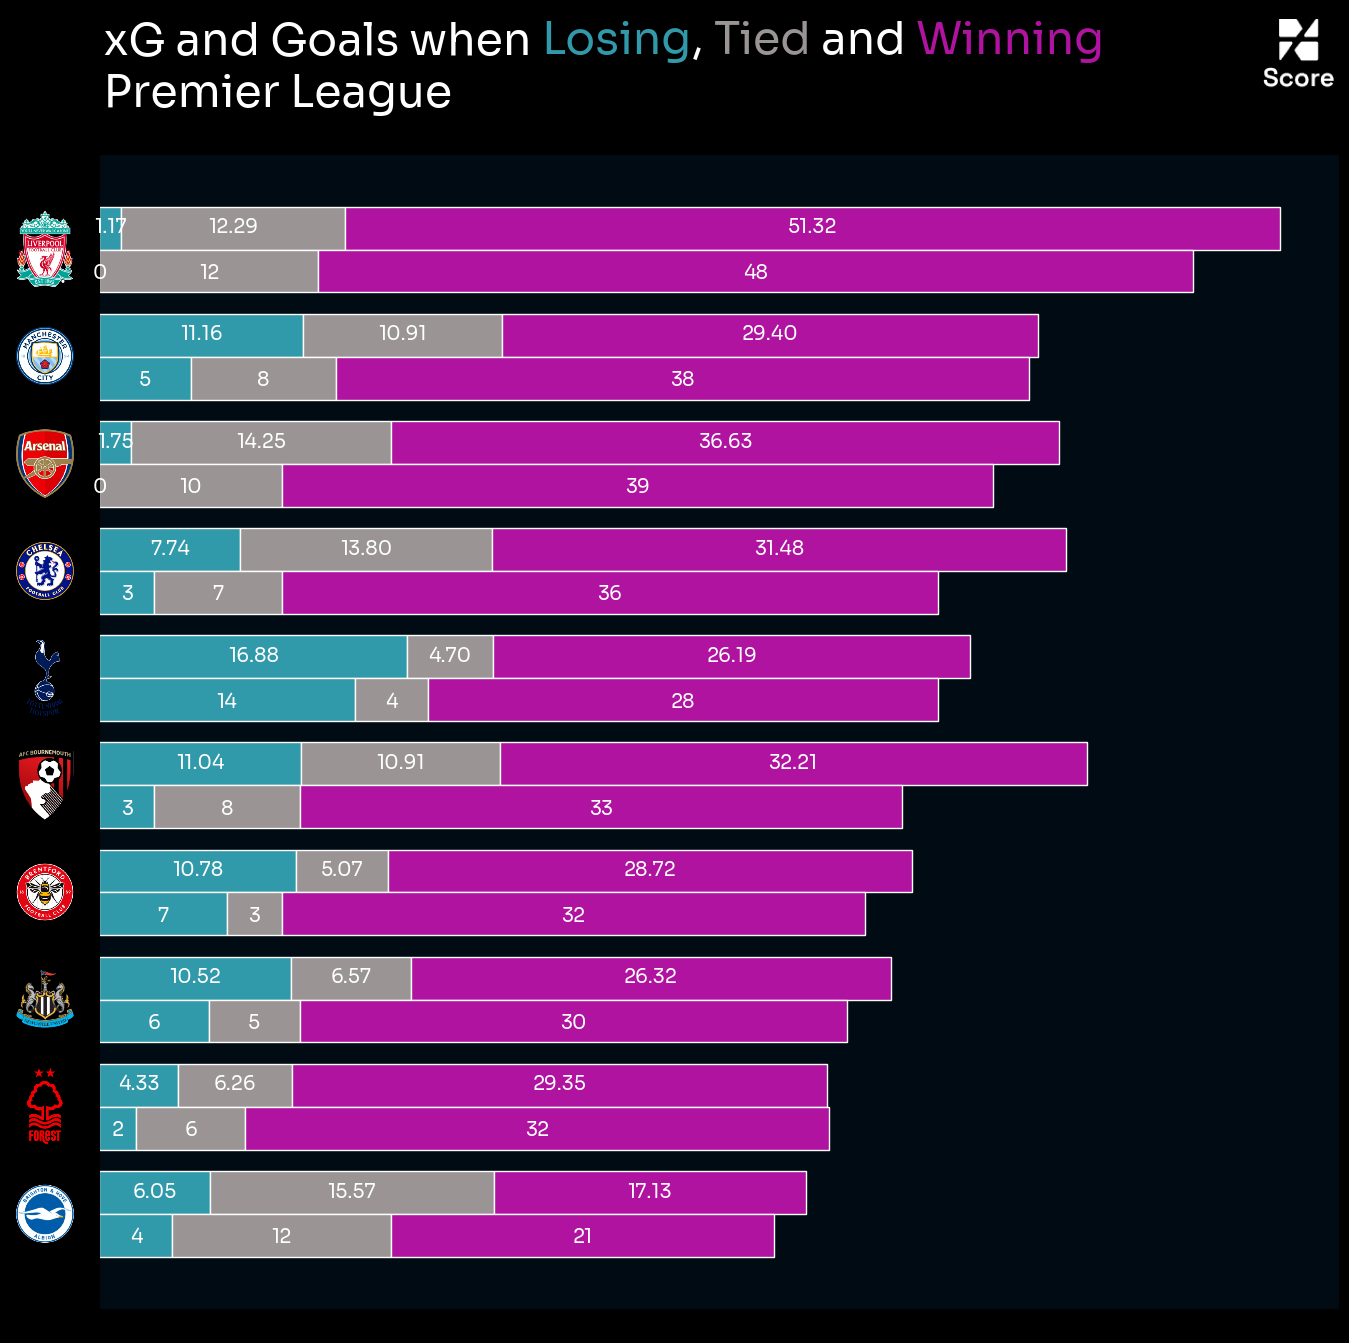

In [219]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

df_top10 = df[:10]

# Set up figure and axes
fig, ax = plt.subplots(figsize=(16, 15),facecolor=background)
background = "#010b14"
text_color = 'white'
ax.set_facecolor(background)

# Number of teams
num_teams = len(df_top10)
y_positions = np.arange(num_teams)
bar_height = 0.4  # Height of each stacked bar

# Stacked Bars for xG
ax.barh(y_positions - bar_height / 2, df_top10["xG_Losing"], height=bar_height, color="#319AAA",edgecolor='white', label="xG (Losing)")
ax.barh(y_positions - bar_height / 2, df_top10["xG_Drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["xG_Losing"], label="xG (Drawing)")
ax.barh(y_positions - bar_height / 2, df_top10["xG_Winning"], height=bar_height, color="#af13a0", edgecolor='white',left=df_top10["xG_Losing"] + df_top10["xG_Drawing"], label="xG (Winning)")

# Stacked Bars for Goals
ax.barh(y_positions + bar_height / 2, df_top10["Goals_Losing"], height=bar_height, color="#319AAA",edgecolor='white', label="Goals (Losing)")
ax.barh(y_positions + bar_height / 2, df_top10["Goals_Drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["Goals_Losing"], label="Goals (Drawing)")
ax.barh(y_positions + bar_height / 2, df_top10["Goals_Winning"], height=bar_height, color="#af13a0",edgecolor='white', left=df_top10["Goals_Losing"] + df_top10["Goals_Drawing"], label="Goals (Winning)")


# Add text labels for xG values
for i, team in enumerate(df_top10["team"]):
    # xG values
    ax.text(df_top10["xG_Losing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xG_Losing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xG_Losing"].iloc[i] + df_top10["xG_Drawing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xG_Drawing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xG_Losing"].iloc[i] + df_top10["xG_Drawing"].iloc[i] + df_top10["xG_Winning"].iloc[i] / 2, 
            y_positions[i] - bar_height / 2.5, f'{df_top10["xG_Winning"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    # Goal values
    ax.text(df_top10["Goals_Losing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["Goals_Losing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["Goals_Losing"].iloc[i] + df_top10["Goals_Drawing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["Goals_Drawing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["Goals_Losing"].iloc[i] + df_top10["Goals_Drawing"].iloc[i] + df_top10["Goals_Winning"].iloc[i] / 2, 
            y_positions[i] + bar_height / 1.5, f'{df_top10["Goals_Winning"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)


for y, img_path in zip(y_positions, df_top10["image_url"]):
    if os.path.exists(img_path):  # Check if the image file exists
        img = mpimg.imread(img_path)  # Load the image
        imagebox = OffsetImage(img, zoom=0.3)  # Adjust zoom level
        ab = AnnotationBbox(imagebox, (0.8, y), frameon=False, xybox=(-50, 0), xycoords='data', boxcoords="offset points")
        ax.add_artist(ab)



logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.85, bottom=0.92, width=0.05, height=0.05,aspect='equal'
)
# Labels and Titles
#ax.set_yticks(y_positions)
#ax.set_yticklabels(df_top10["team"],fontproperties=font_prop, color='white', fontsize=20)
#ax.set_xlabel("xG and Goals per 90")
#ax.set_title("xG vs Goals in Different Game States", fontweight="bold",fontproperties=font_prop, color='white', fontsize=30)


ax_text(-2, -1.5, '''
    xG and Goals when <Losing>, <Tied> and <Winning>\n
    Premier League
    ''',
    color='white',fontproperties=font_prop,
    highlight_textprops=[{'color':'#319AAA'}, {'color':'#9a9594'},{'color':'#af13a0'}], fontsize=32, ha='left', va='center', ax=ax)

# Grid and Legend
#ax.grid(axis="x", linestyle="--", alpha=0.7)
#ax.legend(loc="lower right", ncol=2)

ax.invert_yaxis()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/GameState_Top10.png',dpi=500,bbox_inches = 'tight',facecolor=background)


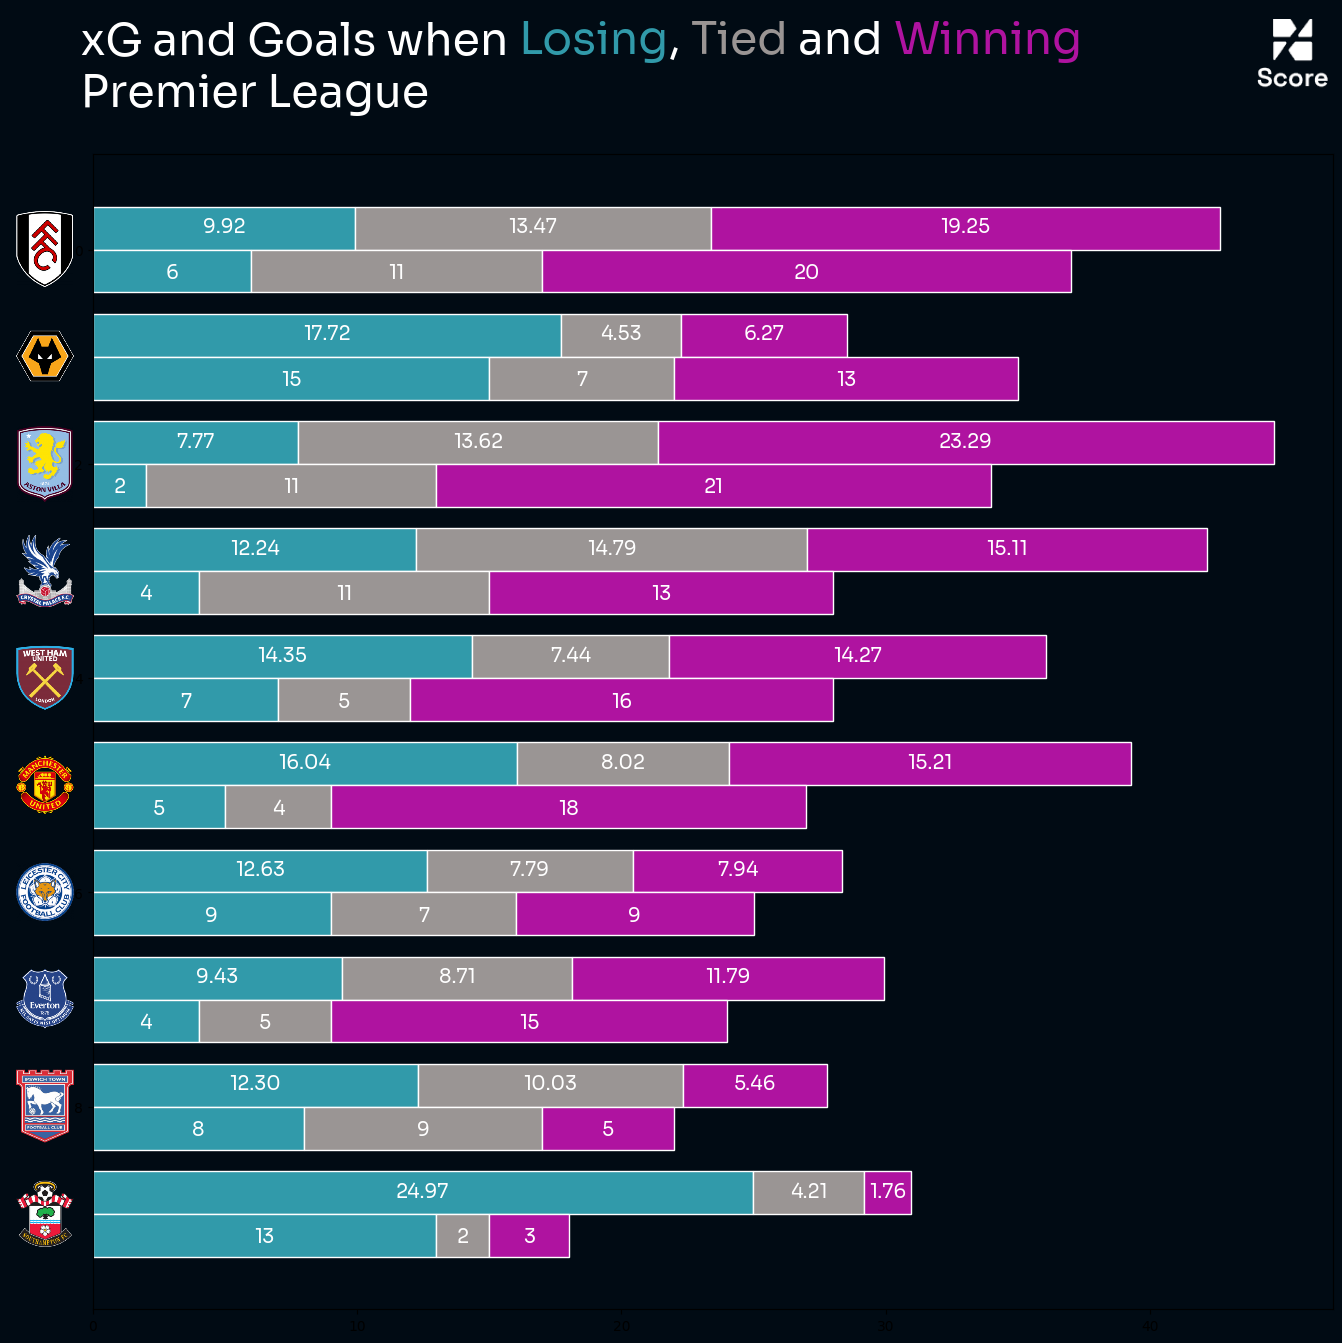

In [220]:
df_top10 = df[10:]

# Set up figure and axes
fig, ax = plt.subplots(figsize=(16, 15),facecolor=background)
background = "#010b14"
text_color = 'white'
ax.set_facecolor(background)

# Number of teams
num_teams = len(df_top10)
y_positions = np.arange(num_teams)
bar_height = 0.4  # Height of each stacked bar

# Stacked Bars for xG
ax.barh(y_positions - bar_height / 2, df_top10["xG_Losing"], height=bar_height, color="#319AAA",edgecolor='white', label="xG (Losing)")
ax.barh(y_positions - bar_height / 2, df_top10["xG_Drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["xG_Losing"], label="xG (Drawing)")
ax.barh(y_positions - bar_height / 2, df_top10["xG_Winning"], height=bar_height, color="#af13a0", edgecolor='white',left=df_top10["xG_Losing"] + df_top10["xG_Drawing"], label="xG (Winning)")

# Stacked Bars for Goals
ax.barh(y_positions + bar_height / 2, df_top10["Goals_Losing"], height=bar_height, color="#319AAA",edgecolor='white', label="Goals (Losing)")
ax.barh(y_positions + bar_height / 2, df_top10["Goals_Drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["Goals_Losing"], label="Goals (Drawing)")
ax.barh(y_positions + bar_height / 2, df_top10["Goals_Winning"], height=bar_height, color="#af13a0",edgecolor='white', left=df_top10["Goals_Losing"] + df_top10["Goals_Drawing"], label="Goals (Winning)")


# Add text labels for xG values
for i, team in enumerate(df_top10["team"]):
    # xG values
    ax.text(df_top10["xG_Losing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xG_Losing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xG_Losing"].iloc[i] + df_top10["xG_Drawing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xG_Drawing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xG_Losing"].iloc[i] + df_top10["xG_Drawing"].iloc[i] + df_top10["xG_Winning"].iloc[i] / 2, 
            y_positions[i] - bar_height / 2.5, f'{df_top10["xG_Winning"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    # Goal values
    ax.text(df_top10["Goals_Losing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["Goals_Losing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["Goals_Losing"].iloc[i] + df_top10["Goals_Drawing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["Goals_Drawing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["Goals_Losing"].iloc[i] + df_top10["Goals_Drawing"].iloc[i] + df_top10["Goals_Winning"].iloc[i] / 2, 
            y_positions[i] + bar_height / 1.5, f'{df_top10["Goals_Winning"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)



for y, img_path in zip(y_positions, df_top10["image_url"]):
    if os.path.exists(img_path):  # Check if the image file exists
        img = mpimg.imread(img_path)  # Load the image
        imagebox = OffsetImage(img, zoom=0.3)  # Adjust zoom level
        ab = AnnotationBbox(imagebox, (0.8, y), frameon=False, xybox=(-50, 0), xycoords='data', boxcoords="offset points")
        ax.add_artist(ab)



logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.85, bottom=0.92, width=0.05, height=0.05,aspect='equal'
)
# Labels and Titles
#ax.set_yticks(y_positions)
#ax.set_yticklabels(df_top10["team"],fontproperties=font_prop, color='white', fontsize=20)
#ax.set_xlabel("xG and Goals per 90")
#ax.set_title("xG vs Goals in Different Game States", fontweight="bold",fontproperties=font_prop, color='white', fontsize=30)


ax_text(-2, -1.5, '''
    xG and Goals when <Losing>, <Tied> and <Winning>\n
    Premier League
    ''',
    color='white',fontproperties=font_prop,
    highlight_textprops=[{'color':'#319AAA'}, {'color':'#9a9594'},{'color':'#af13a0'}], fontsize=32, ha='left', va='center', ax=ax)

# Grid and Legend
#ax.grid(axis="x", linestyle="--", alpha=0.7)
#ax.legend(loc="lower right", ncol=2)

ax.invert_yaxis()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/GameState_Bottom10.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## xG and Goals Conceded For Diff Game States

In [242]:
query = """WITH ShotGameState AS (
    SELECT 
        s.*,
        CASE 
            WHEN h_a = 'h' AND h_goals > a_goals THEN 'winning'
            WHEN h_a = 'h' AND h_goals = a_goals THEN 'drawing'
            WHEN h_a = 'h' AND h_goals < a_goals THEN 'losing'
            WHEN h_a = 'a' AND a_goals > h_goals THEN 'winning'
            WHEN h_a = 'a' AND a_goals = h_goals THEN 'drawing'
            WHEN h_a = 'a' AND a_goals < h_goals THEN 'losing'
        END AS game_state,
        -- Identify the conceding team
        CASE WHEN h_a = 'h' THEN a_team ELSE h_team END AS team
    FROM understat_shots_tb s
    WHERE season = '2024' AND league = 'EPL'
), 

StateChange AS (
    SELECT 
        team, 
        league,
        match_id,
        minute,
        game_state,
        result,
        "xG",
        (CASE WHEN result = 'goal' THEN 1 ELSE 0 END) AS goal
    FROM ShotGameState
),

FilteredShots AS (
    SELECT 
        team, 
        league,
        match_id,
        game_state,
        SUM("xG") AS total_xG_conceded,
        SUM(CASE WHEN result = 'Goal' THEN 1 ELSE 0 END) AS total_goals_conceded
    FROM StateChange
    GROUP BY team, league, match_id, game_state
),

AggregatedTeams AS (
    SELECT 
        team,
        league,
        SUM(CASE WHEN game_state = 'losing' THEN total_xG_conceded ELSE 0 END) AS xg_conceded_losing,
        SUM(CASE WHEN game_state = 'losing' THEN total_goals_conceded ELSE 0 END) AS goals_conceded_losing,
        SUM(CASE WHEN game_state = 'drawing' THEN total_xG_conceded ELSE 0 END) AS xg_conceded_drawing,
        SUM(CASE WHEN game_state = 'drawing' THEN total_goals_conceded ELSE 0 END) AS goals_conceded_drawing,
        SUM(CASE WHEN game_state = 'winning' THEN total_xG_conceded ELSE 0 END) AS xg_conceded_winning,
        SUM(CASE WHEN game_state = 'winning' THEN total_goals_conceded ELSE 0 END) AS goals_conceded_winning
    FROM FilteredShots
    GROUP BY team, league
),

TotalXGConceded AS (
    SELECT 
        team,
        (xg_conceded_losing + xg_conceded_drawing + xg_conceded_winning) AS overall_xG_conceded
    FROM AggregatedTeams
)

SELECT 
    a.team, 
    a.xg_conceded_losing, a.goals_conceded_losing,
    a.xg_conceded_drawing, a.goals_conceded_drawing,
    a.xg_conceded_winning, a.goals_conceded_winning
FROM AggregatedTeams a
JOIN TotalXGConceded t ON a.team = t.team
ORDER BY t.overall_xG_conceded DESC;

"""

with engine.connect() as conn:
    df = pd.read_sql(query, conn)

In [243]:
df.columns

Index(['team', 'xg_conceded_losing', 'goals_conceded_losing',
       'xg_conceded_drawing', 'goals_conceded_drawing', 'xg_conceded_winning',
       'goals_conceded_winning'],
      dtype='object')

In [244]:
df['xg_conceded_losing'] = round(df['xg_conceded_losing'],2)
df['xg_conceded_drawing'] = round(df['xg_conceded_drawing'],2)
df['xg_conceded_winning'] = round(df['xg_conceded_winning'],2)

df['goals_conceded_losing'] = df['goals_conceded_losing'].astype(int)
df['goals_conceded_drawing'] = df['goals_conceded_drawing'].astype(int)
df['goals_conceded_winning'] = df['goals_conceded_winning'].astype(int)

In [248]:
df.loc[6, "team"]  = "Wolves"

In [249]:
# Define local logo folder path
logo_dir = r"C:/Users/acer/Desktop/IndianCityzen/football-logos-master/logos/England - Premier League/"

# Create `image_url` column dynamically
df["image_url"] = df["team"].apply(lambda team: os.path.join(logo_dir, f"{team}.png"))

In [254]:
df.columns

Index(['team', 'xg_conceded_losing', 'goals_conceded_losing',
       'xg_conceded_drawing', 'goals_conceded_drawing', 'xg_conceded_winning',
       'goals_conceded_winning', 'image_url'],
      dtype='object')

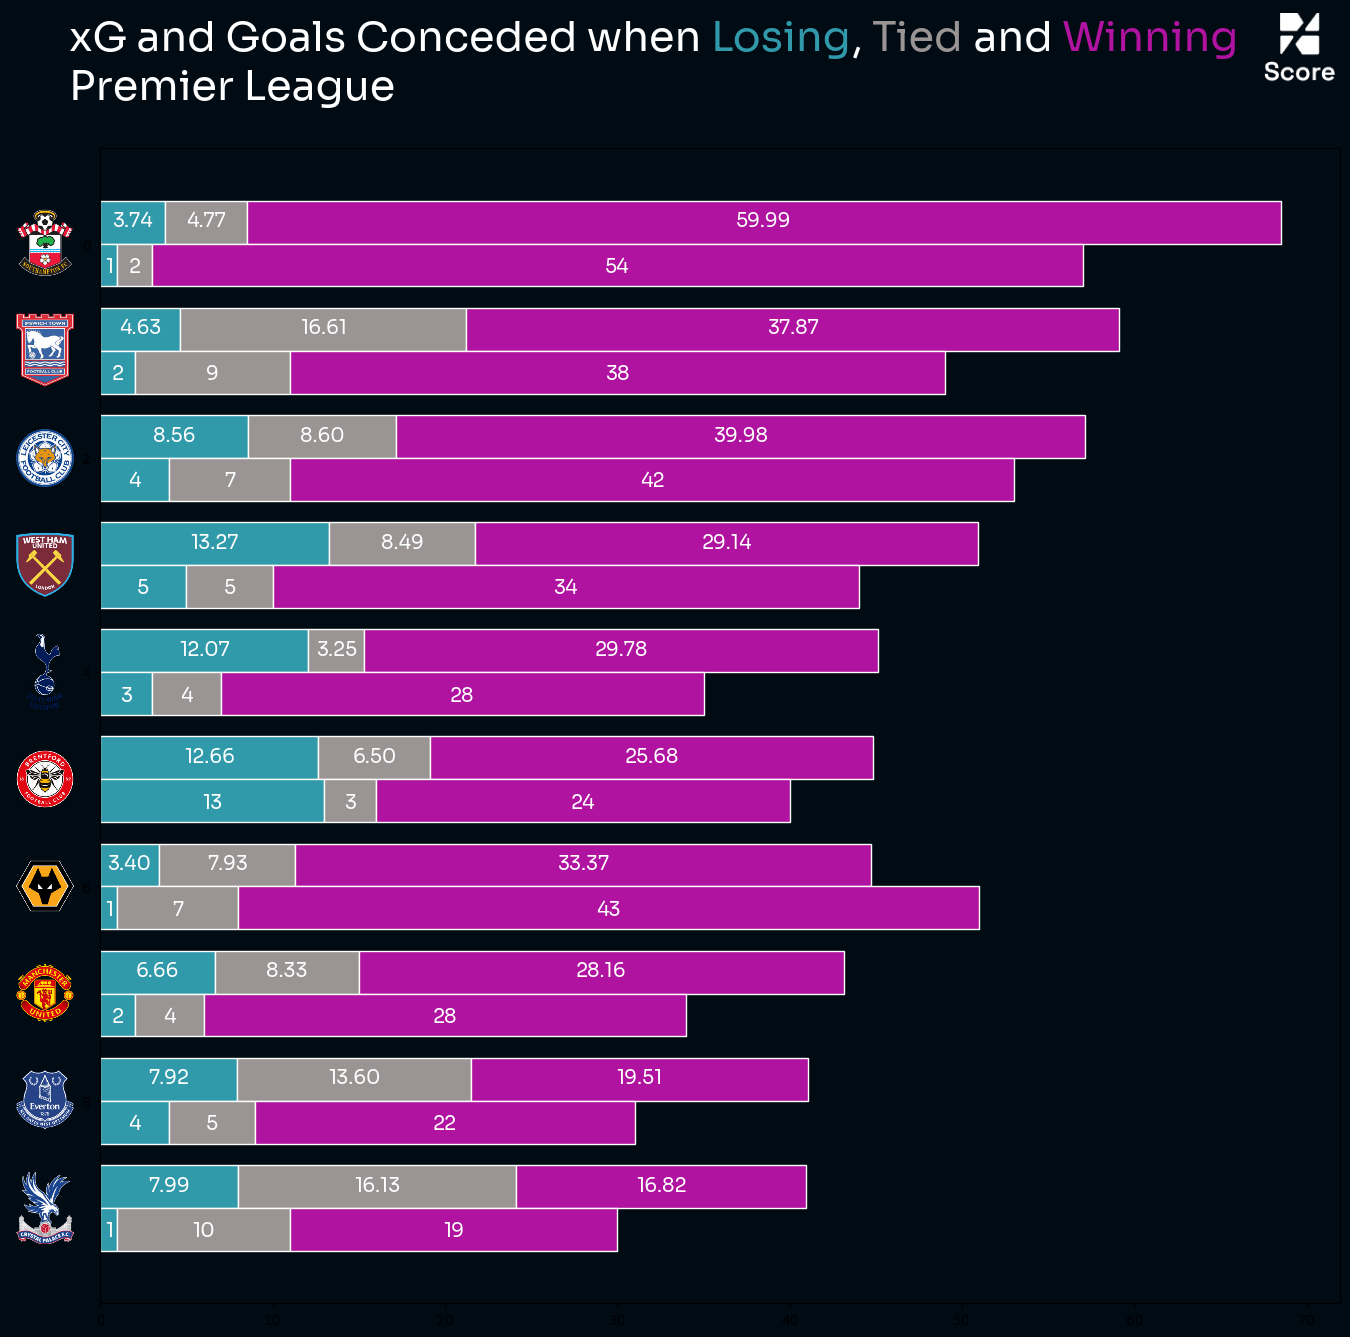

In [265]:
df_top10 = df[:10]

# Set up figure and axes
fig, ax = plt.subplots(figsize=(16, 15),facecolor=background)
background = "#010b14"
text_color = 'white'
ax.set_facecolor(background)

# Number of teams
num_teams = len(df_top10)
y_positions = np.arange(num_teams)
bar_height = 0.4  # Height of each stacked bar

# Stacked Bars for xG
ax.barh(y_positions - bar_height / 2, df_top10["xg_conceded_losing"], height=bar_height, color="#319AAA",edgecolor='white', label="xG (Losing)")
ax.barh(y_positions - bar_height / 2, df_top10["xg_conceded_drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["xg_conceded_losing"], label="xG (Drawing)")
ax.barh(y_positions - bar_height / 2, df_top10["xg_conceded_winning"], height=bar_height, color="#af13a0", edgecolor='white',left=df_top10["xg_conceded_losing"] + df_top10["xg_conceded_drawing"], label="xG (Winning)")

# Stacked Bars for Goals
ax.barh(y_positions + bar_height / 2, df_top10["goals_conceded_losing"], height=bar_height, color="#319AAA",edgecolor='white', label="Goals (Losing)")
ax.barh(y_positions + bar_height / 2, df_top10["goals_conceded_drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["goals_conceded_losing"], label="Goals (Drawing)")
ax.barh(y_positions + bar_height / 2, df_top10["goals_conceded_winning"], height=bar_height, color="#af13a0",edgecolor='white', left=df_top10["goals_conceded_losing"] + df_top10["goals_conceded_drawing"], label="Goals (Winning)")


# Add text labels for xG values
for i, team in enumerate(df_top10["team"]):
    # xG values
    ax.text(df_top10["xg_conceded_losing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xg_conceded_losing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xg_conceded_losing"].iloc[i] + df_top10["xg_conceded_drawing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xg_conceded_drawing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xg_conceded_losing"].iloc[i] + df_top10["xg_conceded_drawing"].iloc[i] + df_top10["xg_conceded_winning"].iloc[i] / 2, 
            y_positions[i] - bar_height / 2.5, f'{df_top10["xg_conceded_winning"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    # Goal values
    ax.text(df_top10["goals_conceded_losing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["goals_conceded_losing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["goals_conceded_losing"].iloc[i] + df_top10["goals_conceded_drawing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["goals_conceded_drawing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["goals_conceded_losing"].iloc[i] + df_top10["goals_conceded_drawing"].iloc[i] + df_top10["goals_conceded_winning"].iloc[i] / 2, 
            y_positions[i] + bar_height / 1.5, f'{df_top10["goals_conceded_winning"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)



for y, img_path in zip(y_positions, df_top10["image_url"]):
    if os.path.exists(img_path):  # Check if the image file exists
        img = mpimg.imread(img_path)  # Load the image
        imagebox = OffsetImage(img, zoom=0.3)  # Adjust zoom level
        ab = AnnotationBbox(imagebox, (0.8, y), frameon=False, xybox=(-50, 0), xycoords='data', boxcoords="offset points")
        ax.add_artist(ab)



logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.85, bottom=0.92, width=0.05, height=0.05,aspect='equal'
)
# Labels and Titles
#ax.set_yticks(y_positions)
#ax.set_yticklabels(df_top10["team"],fontproperties=font_prop, color='white', fontsize=20)
#ax.set_xlabel("xG and Goals per 90")
#ax.set_title("xG vs Goals in Different Game States", fontweight="bold",fontproperties=font_prop, color='white', fontsize=30)


ax_text(-4, -1.5, '''
    xG and Goals Conceded when <Losing>, <Tied> and <Winning>\n
    Premier League
    ''',
    color='white',fontproperties=font_prop,
    highlight_textprops=[{'color':'#319AAA'}, {'color':'#9a9594'},{'color':'#af13a0'}], fontsize=30, ha='left', va='center', ax=ax)

# Grid and Legend
#ax.grid(axis="x", linestyle="--", alpha=0.7)
#ax.legend(loc="lower right", ncol=2)

ax.invert_yaxis()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Conceded_GameState_Top10.png',dpi=500,bbox_inches = 'tight',facecolor=background)


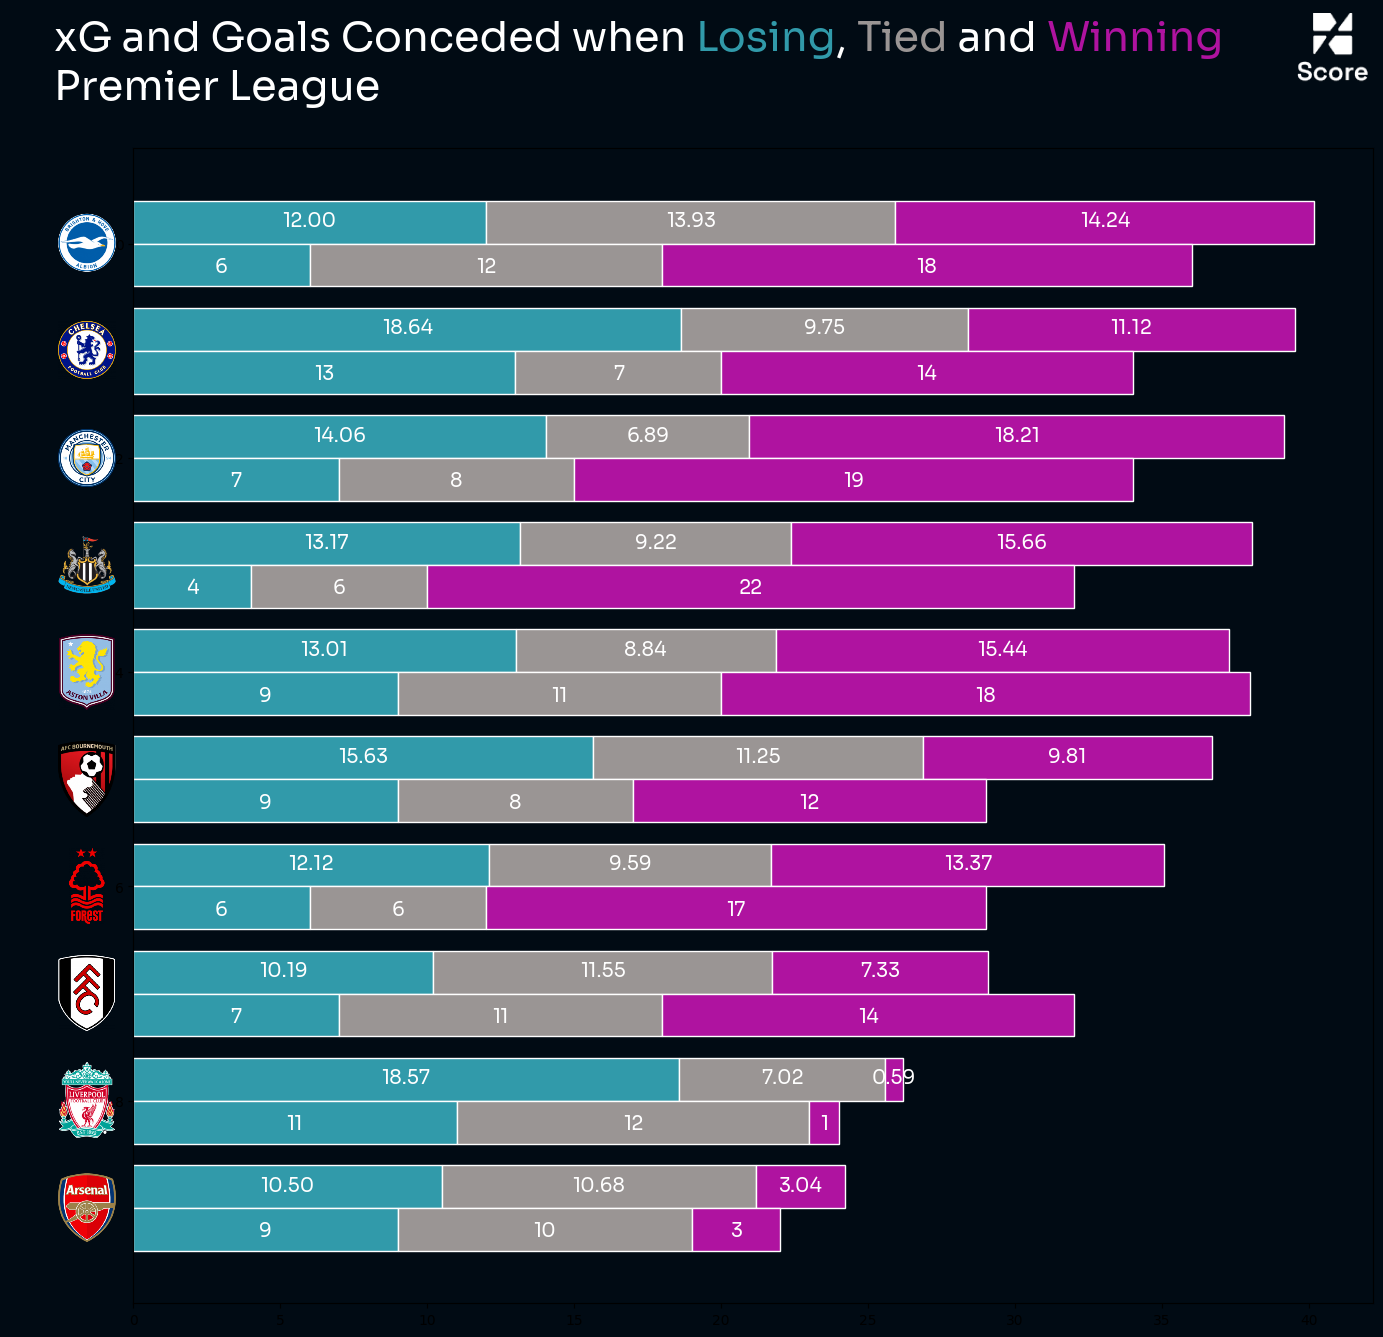

In [267]:
df_top10 = df[10:]

# Set up figure and axes
fig, ax = plt.subplots(figsize=(16, 15),facecolor=background)
background = "#010b14"
text_color = 'white'
ax.set_facecolor(background)

# Number of teams
num_teams = len(df_top10)
y_positions = np.arange(num_teams)
bar_height = 0.4  # Height of each stacked bar

# Stacked Bars for xG
ax.barh(y_positions - bar_height / 2, df_top10["xg_conceded_losing"], height=bar_height, color="#319AAA",edgecolor='white', label="xG (Losing)")
ax.barh(y_positions - bar_height / 2, df_top10["xg_conceded_drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["xg_conceded_losing"], label="xG (Drawing)")
ax.barh(y_positions - bar_height / 2, df_top10["xg_conceded_winning"], height=bar_height, color="#af13a0", edgecolor='white',left=df_top10["xg_conceded_losing"] + df_top10["xg_conceded_drawing"], label="xG (Winning)")

# Stacked Bars for Goals
ax.barh(y_positions + bar_height / 2, df_top10["goals_conceded_losing"], height=bar_height, color="#319AAA",edgecolor='white', label="Goals (Losing)")
ax.barh(y_positions + bar_height / 2, df_top10["goals_conceded_drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["goals_conceded_losing"], label="Goals (Drawing)")
ax.barh(y_positions + bar_height / 2, df_top10["goals_conceded_winning"], height=bar_height, color="#af13a0",edgecolor='white', left=df_top10["goals_conceded_losing"] + df_top10["goals_conceded_drawing"], label="Goals (Winning)")


# Add text labels for xG values
for i, team in enumerate(df_top10["team"]):
    # xG values
    ax.text(df_top10["xg_conceded_losing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xg_conceded_losing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xg_conceded_losing"].iloc[i] + df_top10["xg_conceded_drawing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xg_conceded_drawing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xg_conceded_losing"].iloc[i] + df_top10["xg_conceded_drawing"].iloc[i] + df_top10["xg_conceded_winning"].iloc[i] / 2, 
            y_positions[i] - bar_height / 2.5, f'{df_top10["xg_conceded_winning"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    # Goal values
    ax.text(df_top10["goals_conceded_losing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["goals_conceded_losing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["goals_conceded_losing"].iloc[i] + df_top10["goals_conceded_drawing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["goals_conceded_drawing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["goals_conceded_losing"].iloc[i] + df_top10["goals_conceded_drawing"].iloc[i] + df_top10["goals_conceded_winning"].iloc[i] / 2, 
            y_positions[i] + bar_height / 1.5, f'{df_top10["goals_conceded_winning"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)



for y, img_path in zip(y_positions, df_top10["image_url"]):
    if os.path.exists(img_path):  # Check if the image file exists
        img = mpimg.imread(img_path)  # Load the image
        imagebox = OffsetImage(img, zoom=0.3)  # Adjust zoom level
        ab = AnnotationBbox(imagebox, (0.8, y), frameon=False, xybox=(-50, 0), xycoords='data', boxcoords="offset points")
        ax.add_artist(ab)



logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.85, bottom=0.92, width=0.05, height=0.05,aspect='equal'
)
# Labels and Titles
#ax.set_yticks(y_positions)
#ax.set_yticklabels(df_top10["team"],fontproperties=font_prop, color='white', fontsize=20)
#ax.set_xlabel("xG and Goals per 90")
#ax.set_title("xG vs Goals in Different Game States", fontweight="bold",fontproperties=font_prop, color='white', fontsize=30)


ax_text(-4, -1.5, '''
    xG and Goals Conceded when <Losing>, <Tied> and <Winning>\n
    Premier League
    ''',
    color='white',fontproperties=font_prop,
    highlight_textprops=[{'color':'#319AAA'}, {'color':'#9a9594'},{'color':'#af13a0'}], fontsize=30, ha='left', va='center', ax=ax)

# Grid and Legend
#ax.grid(axis="x", linestyle="--", alpha=0.7)
#ax.legend(loc="lower right", ncol=2)

ax.invert_yaxis()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Conceded_GameState_Bottom10.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## Passing V Carrying

In [38]:
df = pd.read_csv('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Data/PassingVPossession/final_stats_La-Liga-Stats.csv')

In [39]:
df.head()

player team_x  \
0               Alex Baena     VI   
1            Gerard Moreno     VI   
2              Ayoze Pérez     VI   
3  Iñigo Ruiz de Galarreta     AT   
4               Iago Aspas     CE   

                                          url_x  pass_metric      id_x  \
0               /en/players/518f2234/Alex-Baena         3.07  518f2234   
1            /en/players/81f0781e/Gerard-Moreno         3.01  81f0781e   
2              /en/players/819aa8e7/Ayoze-Perez         2.61  819aa8e7   
3  /en/players/91f7631f/Inigo-Ruiz-de-Galarreta         2.60  91f7631f   
4               /en/players/7dcf86f6/Iago-Aspas         2.59  7dcf86f6   

                                        headshot_url team_y  \
0  https://fbref.com/req/202302030/images/headsho...     VI   
1  https://fbref.com/req/202302030/images/headsho...     VI   
2  https://fbref.com/req/202302030/images/headsho...     VI   
3  https://fbref.com/req/202302030/images/headsho...     AT   
4  https://fbref.com/req/202302030/images/headsho...     CE   

                                          url_y  carry_metric      id_y  
0               /en/players/518f2234/Alex-Baena          1.01  518f2234  
1            /en/players/81f0781e/Gerard-Moreno          0.08  81f0781e  
2              /en/players/819aa8e7/Ayoze-Perez          2.36  819aa8e7  
3  /en/players/91f7631f/Inigo-Ruiz-de-Galarreta         -0.17  91f7631f  
4               /en/players/7dcf86f6/Iago-Aspas          0.52  7dcf86f6

In [65]:
df1 = df.drop_duplicates(subset=['player'])

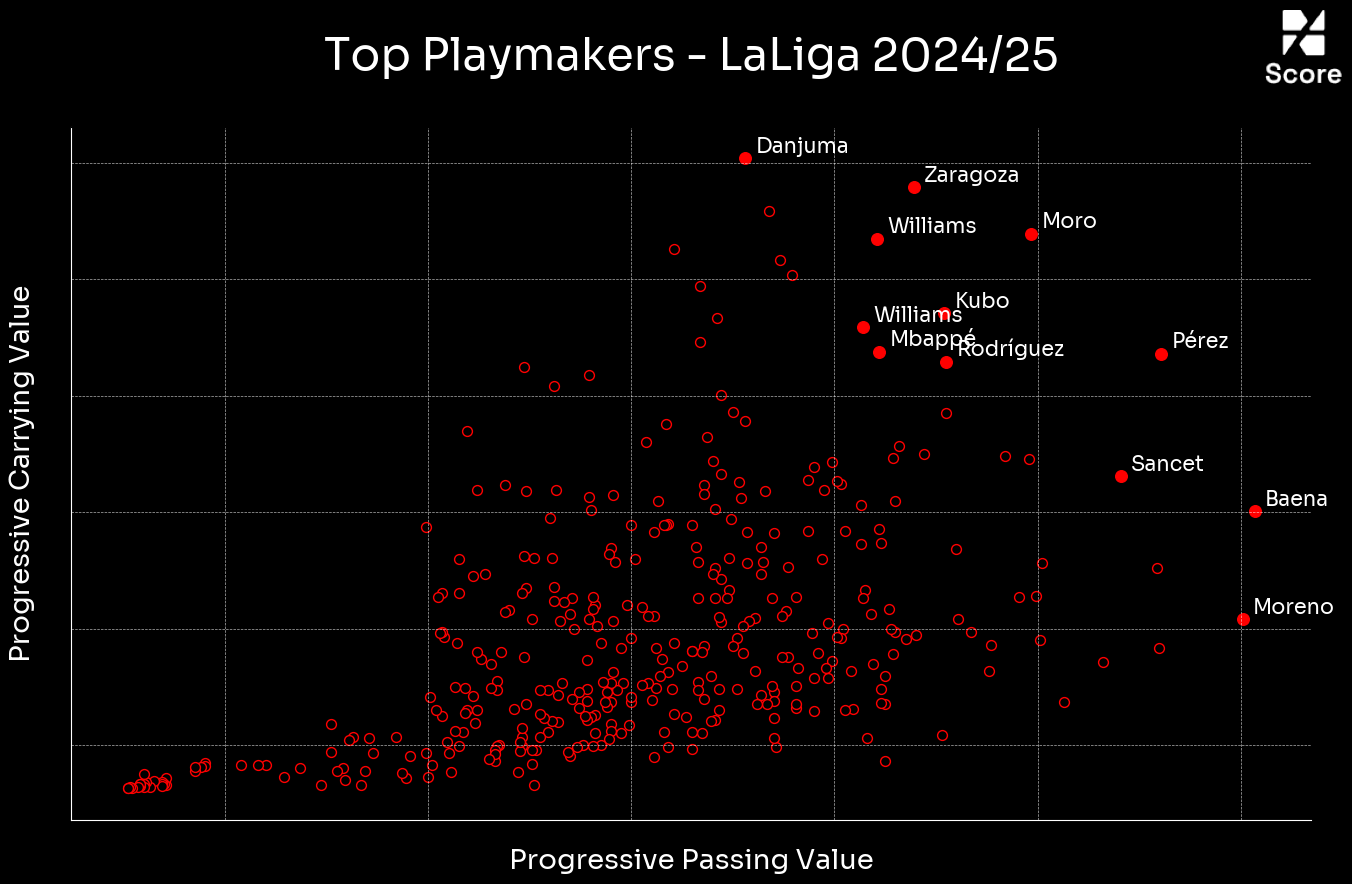

In [83]:
fig, ax = plt.subplots(figsize=(16,9))
fig.set_facecolor(background)
ax.set_facecolor(background)
ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.7)

for index,row in df1.iterrows():
  if ((row['pass_metric'] >= 2.0) & (row['carry_metric'] >= 1.0)) or (row['pass_metric'] >= 1.0) & (row['carry_metric'] >= 2.0) or (row['pass_metric'] >= 3.0) or (row['carry_metric'] >= 4.0):
    ax.scatter(row['pass_metric'], row['carry_metric'],color='red',s=70)
    ax.annotate(row['player'].split(' ')[-1],xy = (row['pass_metric']+0.05,row['carry_metric']+0.05),fontproperties=font_prop,color='white',fontsize=15)
  else:
    ax.scatter(row['pass_metric'], row['carry_metric'],color=background,edgecolor='red',s=50)


logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.85, bottom=0.92, width=0.09, height=0.09,aspect='equal'
)

#ax.tick_params(axis='x', colors='white')
#ax.tick_params(axis='y', colors='white')
#ax.spines['top'].set_color('white')
#ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.set_xlabel("Progressive Passing Value",fontproperties=font_prop,color='white',fontsize=20)
ax.set_ylabel("Progressive Carrying Value",fontproperties=font_prop,color='white',fontsize=20)
ax.set_title("Top Playmakers - LaLiga 2024/25",fontproperties=font_prop,color='white',fontsize=32,y=1.07)
#ax.suptitle("Players With 100+ Passes and Carries",fontsize=18,color='white')
#fig.text(0.5, 0, "Data from FBRef | Ishdeep Chahda | @indian_citizen", ha='center', fontsize=10,color='white')

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Playmakers_LaLiga.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## TreeMap for ShotType

In [204]:
query = """WITH PlayerGoals AS (
    -- Count total goals per player by shot type
    SELECT 
        player,
        "shotType",
        COUNT(*) AS goals
    FROM understat_shots_tb
    WHERE result = 'Goal' and season = 2024
    GROUP BY player, "shotType"
),

TopScorers AS (
    -- Identify the top 10 goal scorers
    SELECT 
        player,
        SUM(goals) AS total_goals
    FROM PlayerGoals
    GROUP BY player
    ORDER BY total_goals DESC
    LIMIT 9
),

GoalDistribution AS (
    -- Get goal distribution by shot type for top scorers
    SELECT 
        pg.player,
        pg."shotType",
        pg.goals
    FROM PlayerGoals pg
    JOIN TopScorers ts ON pg.player = ts.player
)

-- Pivot shot types into separate columns
SELECT 
    player,
    COALESCE(MAX(CASE WHEN "shotType" = 'RightFoot' THEN goals END), 0) AS right_foot_goals,
    COALESCE(MAX(CASE WHEN "shotType" = 'LeftFoot' THEN goals END), 0) AS left_foot_goals,
    COALESCE(MAX(CASE WHEN "shotType" = 'Head' THEN goals END), 0) AS head_goals,
    COALESCE(MAX(CASE WHEN "shotType" = 'OtherBodyPart' THEN goals END), 0) AS other_goals,
    SUM(goals) AS total_goals
FROM GoalDistribution
GROUP BY player
ORDER BY total_goals DESC;


"""

with engine.connect() as conn:
    df = pd.read_sql(query, conn)

In [152]:
df.columns

Index(['player', 'right_foot_goals', 'left_foot_goals', 'head_goals',
       'other_goals', 'total_goals'],
      dtype='object')

In [143]:
df.head()

player  right_foot_goals  left_foot_goals  head_goals  \
0       Mohamed Salah                 3               22           0   
1       Mateo Retegui                 8                8           5   
2          Harry Kane                15                3           3   
3      Erling Haaland                 2               14           4   
4  Robert Lewandowski                13                5           2   

   other_goals  total_goals  
0            0         25.0  
1            0         21.0  
2            0         21.0  
3            0         20.0  
4            0         20.0

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import matplotlib.cm as cm


In [206]:
df_long = df.melt(id_vars=["player", "total_goals"], 
                  value_vars=["right_foot_goals", "left_foot_goals", "head_goals", "other_goals"],
                  var_name="shot_type", value_name="goals")


In [207]:
df_long = df_long[df_long["goals"] > 0]


In [208]:
shot_type_map = {
    "right_foot_goals": "Right Foot",
    "left_foot_goals": "Left Foot",
    "head_goals": "Header",
    "other_goals": "Other"
}
df_long["shot_type"] = df_long["shot_type"].map(shot_type_map)


C:\Users\acer\AppData\Local\Temp\ipykernel_46908\2030691291.py:27: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\acer\AppData\Local\Temp\ipykernel_46908\2030691291.py:27: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\acer\AppData\Local\Temp\ipykernel_46908\2030691291.py:27: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\acer\AppData\Local\Temp\ipykernel_46908\2030691291.py:27: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matp

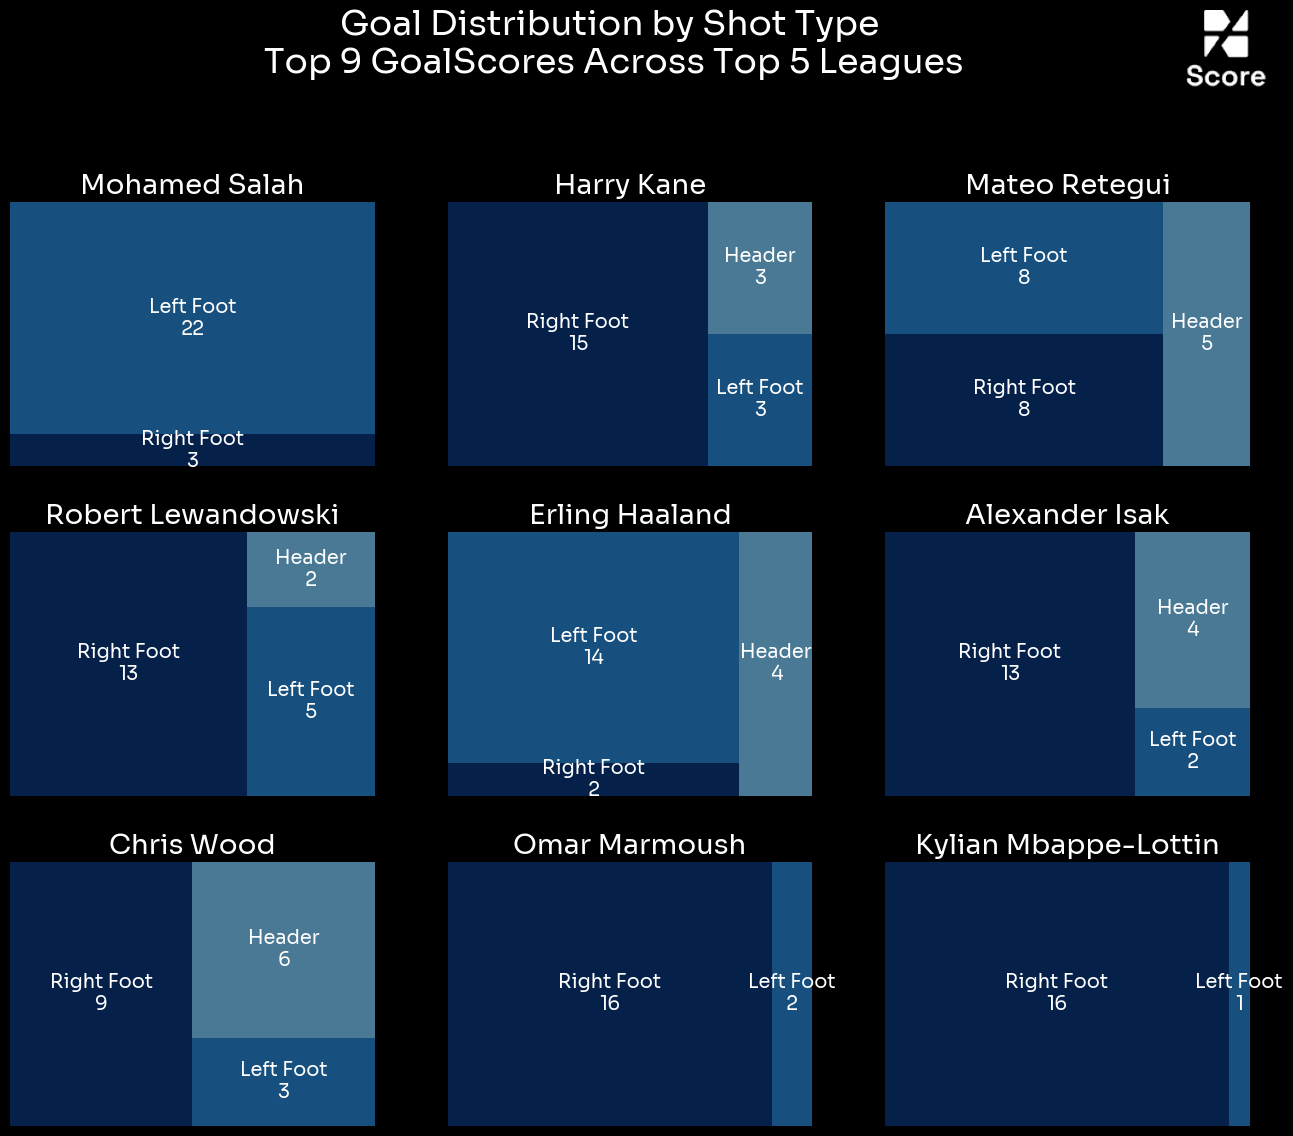

In [219]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()  # Convert 2D array to 1D for easier looping
fig.set_facecolor(background)
# Unique players
players = df["player"].unique()

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.85, bottom=0.97, width=0.07, height=0.07,aspect='equal'
)

# Loop through each player and create a treemap
for i, player in enumerate(players):
    ax = axes[i]  # Select subplot
    
    # Filter player's data
    player_data = df_long[df_long["player"] == player]
    
    # If no goals exist for the player, skip the subplot
    if player_data.empty:
        ax.axis("off")
        continue
    
    # Treemap labels
    labels = player_data["shot_type"] + "\n" + player_data["goals"].astype(str)
    cmap = cm.get_cmap("Blues_r", 5)  # Get "Blues" colormap
    colors = [cmap(i) for i in range(num_colors)]  # Extract shades
    # Plot treemap
    squarify.plot(sizes=player_data["goals"], 
                  label=labels,
                  color=colors,
                  alpha=0.7, 
                  ax=ax)
    for text in ax.texts:  
        text.set_color("white")
        text.set_fontproperties(font_prop)
        text.set_fontsize(14)

    # Titles
    ax.set_title(player, fontproperties=font_prop,color='white', fontsize=20)
    ax.axis("off")

for j in range(len(players), 9):
    axes[j].axis("off")  # Hide empty subplots

plt.suptitle("Goal Distribution by Shot Type\n Top 9 GoalScores Across Top 5 Leagues", fontsize=25,y=1.04, fontproperties=font_prop,color='white')
plt.subplots_adjust(wspace=0.2, hspace=0.25)

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Top9Goal_ShotType.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## Defensive Actions in Middle Third

In [300]:
df['x'] = df['x']*1.05
df['y'] = df['y']*0.68
df['endX'] = df['endX']*1.05
df['endY'] = df['endY']*0.68
df['goalMouthY'] = df['goalMouthY']*0.68

In [301]:
df['period'] = df['period'].replace({'FirstHalf': 1, 'SecondHalf': 2, 'FirstPeriodOfExtraTime': 3, 'SecondPeriodOfExtraTime': 4,
                                     'PenaltyShootout': 5, 'PostGame': 14, 'PreMatch': 16})
# new column for cumulative minutes, This part is taken from the "jakeyk11.github.io" github repository and modified for my use
def cumulative_match_mins(events_df):
    events_out = pd.DataFrame()
    # Add cumulative time to events data, resetting for each unique match
    match_events = events_df.copy()
    match_events['cumulative_mins'] = match_events['minute'] + (1/60) * match_events['second']
    # Add time increment to cumulative minutes based on period of game.
    for period in np.arange(1, match_events['period'].max() + 1, 1):
        if period > 1:
            t_delta = match_events[match_events['period'] == period - 1]['cumulative_mins'].max() - \
                                   match_events[match_events['period'] == period]['cumulative_mins'].min()
        elif period == 1 or period == 5:
            t_delta = 0
        else:
            t_delta = 0
        match_events.loc[match_events['period'] == period, 'cumulative_mins'] += t_delta
    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events])
    return events_out

df = cumulative_match_mins(df)

In [302]:
# New Column for Team Names and Oppositon TeamNames
df['teamName'] = df['teamId'].map(teams_dict)
team_names = list(teams_dict.values())

In [303]:
def find_defensive_actions(events_df):
    # Defensive Aerials
    aerials = events_df[events_df['type']=='Aerial']
    defensive_aerials = aerials[aerials['qualifiers'].apply(
    lambda x: isinstance(x, list) and any(isinstance(q, dict) and q.get('type', {}).get('value') == 285 for q in x))]

    # Define and filter defensive events
    defensive_actions = ['BallRecovery', 'BlockedPass', 'Clearance', 'Foul', 'Interception', 'Tackle',
                         'Claim', 'KeeperPickup', 'KeeperSweeper', 'Smother', 'Punch', 'Save']
    defensive_action_df = events_df[(events_df['type'].isin(defensive_actions)) & (events_df['outcomeType'] == 'Successful')]

    defensive_action_df = pd.concat([defensive_action_df,
                                     defensive_aerials], axis=0).sort_values(['matchId', 'cumulative_mins'])

    # Note challenges are never successful and represent when the opposition completes a take on
    return defensive_action_df

In [304]:
def group_player_events(events, player_data, group_type='count', agg_columns=None, col_names='Column Name'):
    # Specify agg_columns as list if not assigned
    if agg_columns is None:
        agg_columns = list()
    elif type(agg_columns) == str:
        agg_columns = [agg_columns]

    # Initialise output dataframe
    player_data_out = player_data.copy()

    # Perform aggregation based on grouping type input
    if group_type == 'count':
        grouped_events = events.groupby('playerId', axis=0).count()
        selected_events = grouped_events[agg_columns].copy()
        selected_events.loc[:, col_names] = grouped_events['match_id']
    elif group_type == 'sum':
        grouped_events = events.groupby('playerId', axis=0).sum(numeric_only=True)
        selected_events = grouped_events[agg_columns].copy()
    elif group_type == 'mean':
        grouped_events = events.groupby('playerId', axis=0).mean(numeric_only=True)
        selected_events = grouped_events[agg_columns].copy()
    else:
        selected_events = pd.DataFrame()

    # Merge into player information dataframe
    player_data_out = player_data_out.merge(selected_events, left_on='playerId', right_index=True, how='left')
    if type(col_names) == str:
        col_names = [col_names]
    if agg_columns != list() and group_type in ['sum', 'mean']:
        for idx in np.arange(len(agg_columns)):
            player_data_out = player_data_out.rename(columns={agg_columns[idx]: col_names[idx]})

    # Remove nulls and replace with 0
    player_data_out[col_names] = player_data_out[col_names].fillna(0)

    return player_data_out

In [305]:
 # Filter only pass events
def_df = find_defensive_actions(df)

middlethird = def_df[(def_df['x'] > 35) & (def_df['x'] < 70)]

# Count passes per player
def_counts = middlethird.groupby('playerName')['id'].count().reset_index()

In [306]:
def_counts.head()

playerName  id
0   Aarón Martín  75
1  Abdou Harroui  21
2   Adam Marusic  43
3    Adam Masina  52
4     Adam Obert  42

In [307]:
# Rename column for clarity
def_counts.rename(columns={'id': 'defensive_actions'}, inplace=True)

# Get the top 12 players
top_12_players = def_counts.nlargest(12, 'defensive_actions')

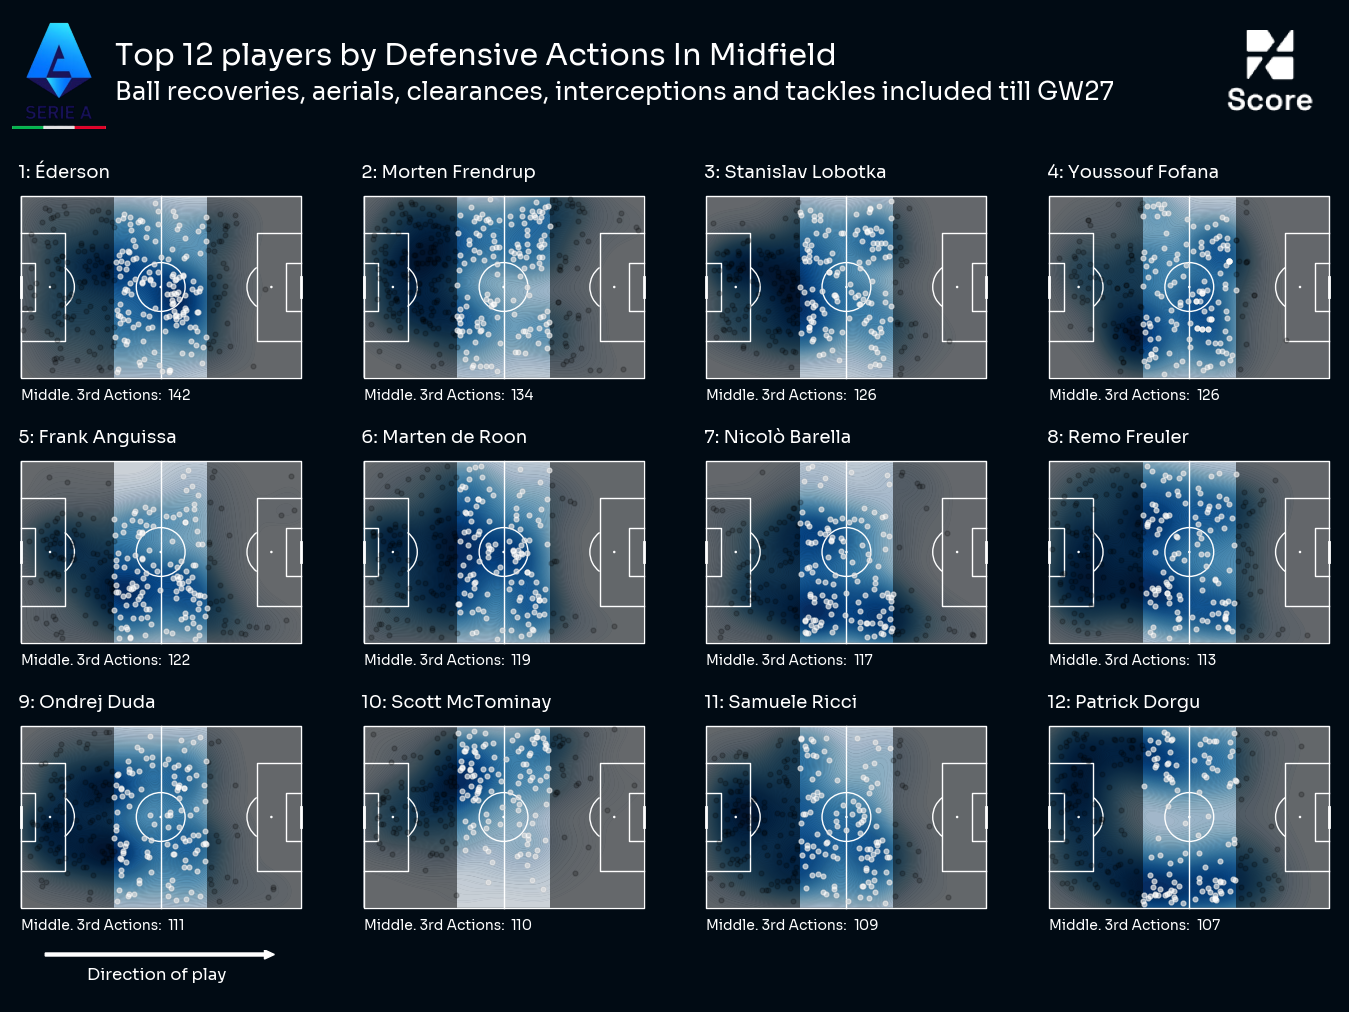

In [310]:
# Set-up pitch subplots
pitch = Pitch(pitch_color=background, pitch_type='uefa', line_color='white', linewidth=1, stripe=False)
fig, ax = pitch.grid(nrows=3, ncols=4, grid_height=0.75, space=0.12, axis=False)
fig.set_size_inches(14, 10)
fig.set_facecolor(background)
ax['pitch'] = ax['pitch'].reshape(-1)

# Plot successful prog passes as arrows, using for loop to iterate through each player and each pass
idx = 0

for _, row in top_12_players.iterrows():
    player_name = row['playerName']
    player_def_actions = def_df[def_df['playerName'] == player_name]
    player_opp_middle_def_actions = middlethird[middlethird['playerName'] == player_name]
    
    ax['pitch'][idx].set_title(f"  {idx + 1}: {player_name}", loc="left", color='w',fontproperties=font_prop, fontsize=13)

    # KDE plot for defensive actions
    pitch.kdeplot(player_def_actions['x'], player_def_actions['y'], ax=ax['pitch'][idx], fill=True, 
                  levels=80, thresh=0, cmap='Blues', cut=8, alpha=0.6, antialiased=True, zorder=0)  
    pitch.kdeplot(player_def_actions['x'], player_def_actions['y'], ax=ax['pitch'][idx], fill=True, 
                  levels=100, thresh=0, cmap='Blues', cut=8, alpha=0.6, antialiased=True, zorder=0)  

    # Shade the left (defensive) third
    ax['pitch'][idx].fill([0, 35, 35, 0], [0, 0, 68, 68], 'black', alpha=0.5, zorder=0)

    # Shade the right (attacking) third
    ax['pitch'][idx].fill([70, 105, 105, 70], [0, 0, 68, 68], 'black', alpha=0.5, zorder=0)


    # Scatter plot for defensive actions
    pitch.scatter(player_def_actions['x'], player_def_actions['y'], color='k', alpha=0.2, s=12, zorder=1, ax=ax['pitch'][idx])
    pitch.scatter(player_opp_middle_def_actions['x'], player_opp_middle_def_actions['y'], color='w', alpha=0.6, s=12, zorder=1, ax=ax['pitch'][idx])

    ax['pitch'][idx].text(0, -8, "Middle. 3rd Actions:",fontproperties=font_prop ,fontsize=10, fontweight='bold', color='w', zorder=1)
    ax['pitch'][idx].text(55, -8, f"{len(player_opp_middle_def_actions)}", fontproperties=font_prop,fontsize=10, color='w', zorder=1)

    idx += 1
    if idx >= 12:  # Prevents out-of-bounds error
        break


title_text = f"Top 12 players by Defensive Actions In Midfield"
subtitle_text = f"Ball recoveries, aerials, clearances, interceptions and tackles included till GW27"

# Title
fig.text(0.1, 0.945, title_text, fontweight="bold",fontproperties=font_prop, fontsize=22, color='w')
fig.text(0.1, 0.91, subtitle_text, fontweight="regular",fontproperties=font_prop, fontsize=18, color='w')

# Add direction of play arrow
ax = fig.add_axes([0.042, 0.05, 0.18, 0.01])
ax.axis("off")
plt.arrow(0.51, 0.15, 0.1, 0, color="white")
fig.text(0.13, 0.03, "Direction of play", ha="center",fontproperties=font_prop, fontsize=12, color="white", fontweight="regular")

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.88, bottom=0.89, width=0.09, height=0.09,aspect='equal'
)

league_logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/serieA.png')

ax_image = add_image(
    league_logo, fig, left=0, bottom=0.88, width=0.12, height=0.12,aspect='equal'
)

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/SerieA_Top12MidDefActions.png',dpi=500,bbox_inches = 'tight',facecolor=background)

## Where does Teams lose the possession of the ball

In [231]:
df['teamName'] = df['teamId'].map(teams_dict)
team_names = list(teams_dict.values())

In [232]:
df['x'] = df['x']*1.05
df['y'] = df['y']*0.68
df['endX'] = df['endX']*1.05
df['endY'] = df['endY']*0.68

In [233]:
conditions = [
    df['x'] < 35,  # Defensive Third
    (df['x'] >= 35) & (df['x'] < 70),  # Middle Third
    df['x'] >= 70  # Final Third
]

values = ['defensive_third', 'middle_third', 'final_third']
df['area_type'] = np.select(conditions, values, default='middle_third')

In [234]:
df_epl = df.copy()

In [235]:
turnover_counts = df_epl[df_epl['turnover'] == True].groupby(['teamName','area_type']).size().reset_index(name='count')
turnover_pivot = turnover_counts.pivot(index='teamName', columns='area_type', values='count').fillna(0)
turnover_pivot.reset_index(inplace=True)

In [236]:
# Calculate total turnovers per team
turnover_pivot['total_turnovers'] = (
    turnover_pivot[['defensive_third', 'middle_third', 'final_third']].sum(axis=1)
)

# Convert to percentage
turnover_pivot['defensive_third_pct'] = round((turnover_pivot['defensive_third'] / turnover_pivot['total_turnovers']) * 100,1)
turnover_pivot['middle_third_pct'] = round((turnover_pivot['middle_third'] / turnover_pivot['total_turnovers']) * 100,1)
turnover_pivot['final_third_pct'] = round((turnover_pivot['final_third'] / turnover_pivot['total_turnovers']) * 100,1)

turnover_pivot.drop(columns=['total_turnovers'], inplace=True)

In [237]:
turnover_pivot

area_type           teamName  defensive_third  final_third  middle_third  \
0                    Arsenal               49          192            97   
1                Aston Villa               58          169           141   
2                Bournemouth               52          217           191   
3                  Brentford               67          174           122   
4                   Brighton               58          216           134   
5                    Chelsea               61          166           122   
6             Crystal Palace               63          133           143   
7                    Everton               51          184           130   
8                     Fulham               63          153           132   
9                    Ipswich               70          158           162   
10                 Leicester               55          137           150   
11                 Liverpool               57          193           119   
12                  Man City               43          199            84   
13                   Man Utd               50          165           129   
14                 Newcastle               55          163           118   
15         Nottingham Forest               73          169           148   
16               Southampton               71          136           124   
17                 Tottenham               66          178           131   
18                  West Ham               54          153           128   
19                    Wolves               76          179           141   

area_type  defensive_third_pct  middle_third_pct  final_third_pct  
0                         14.5              28.7             56.8  
1                         15.8              38.3             45.9  
2                         11.3              41.5             47.2  
3                         18.5              33.6             47.9  
4                         14.2              32.8             52.9  
5                         17.5              35.0             47.6  
6                         18.6              42.2             39.2  
7                         14.0              35.6             50.4  
8                         18.1              37.9             44.0  
9                         17.9              41.5             40.5  
10                        16.1              43.9             40.1  
11                        15.4              32.2             52.3  
12                        13.2              25.8             61.0  
13                        14.5              37.5             48.0  
14                        16.4              35.1             48.5  
15                        18.7              37.9             43.3  
16                        21.5              37.5             41.1  
17                        17.6              34.9             47.5  
18                        16.1              38.2             45.7  
19                        19.2              35.6             45.2

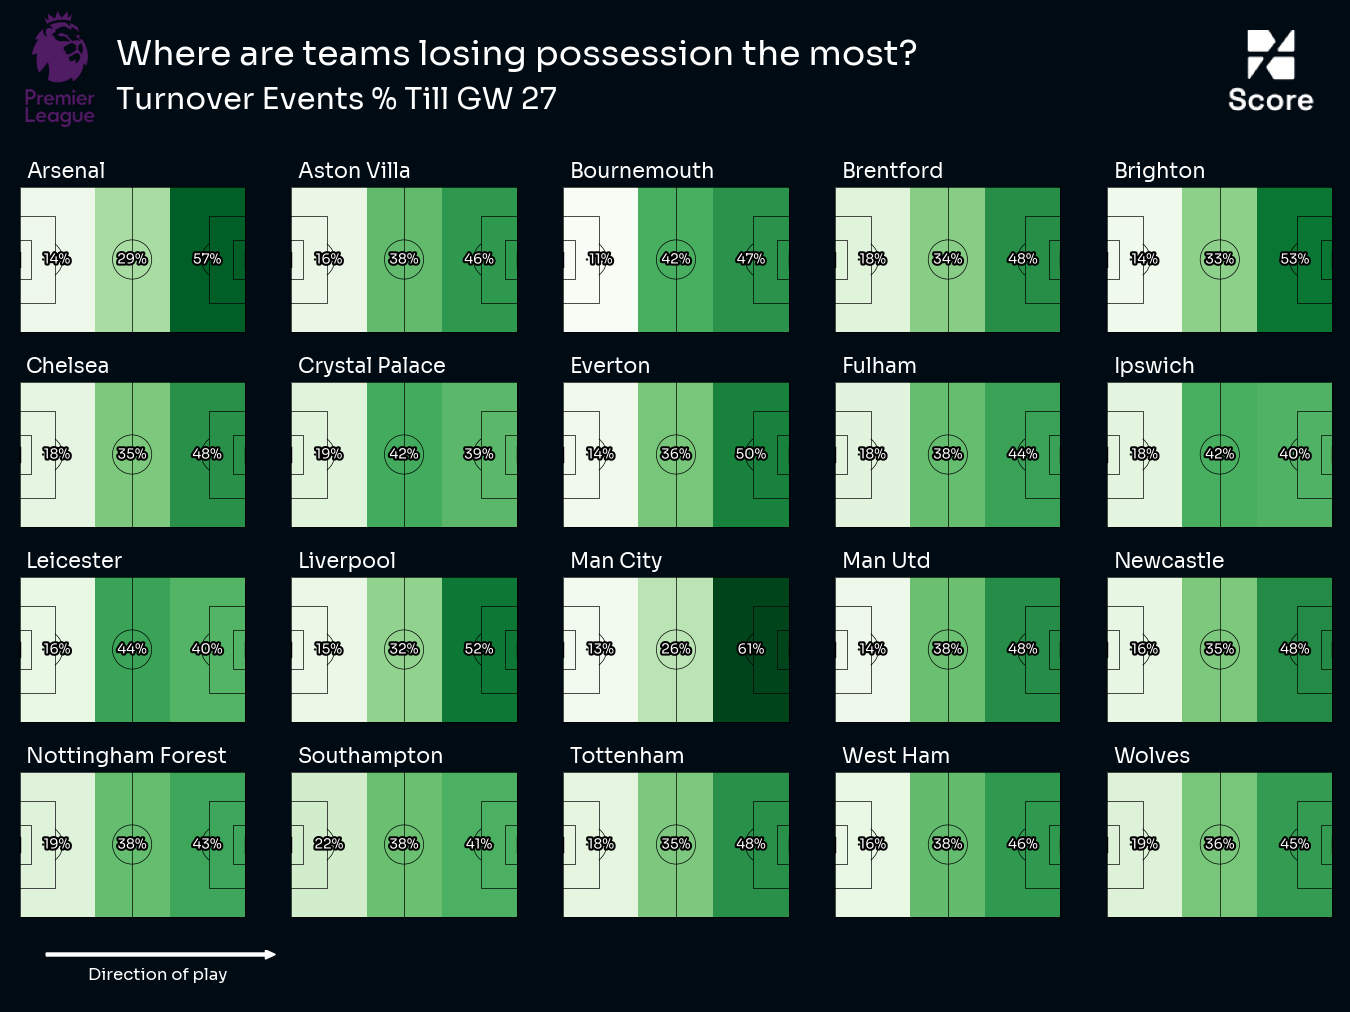

In [253]:
import matplotlib.patheffects as path_effects
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]
pitch = Pitch(pitch_color=background, pitch_type='uefa', line_color='black', linewidth=0.5,line_zorder=2, stripe=False)
fig, ax = pitch.grid(nrows=4, ncols=5, grid_height=0.75, space=0.12, axis=False)
fig.set_size_inches(14, 10)
fig.set_facecolor(background)
ax['pitch'] = ax['pitch'].reshape(-1)

bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3, 1))
teams = turnover_pivot['teamName'].values

turover_cols = ['defensive_third_pct' , 'middle_third_pct','final_third_pct']

vmin = turnover_pivot[turover_cols].min().min()  # we normalise the heatmaps with the min / max values
vmax = turnover_pivot[turover_cols].max().max()

idx = 0
for i, ax in enumerate(ax['pitch'].flat[:len(teams)]):
    # the top of the pitch is zero
    # plot the title half way between zero and -20 (the top padding)
    ax.text(3, 75, teams[i],color='white',
            ha='left', va='center', fontsize=15,
            fontproperties=font_prop)

    # fill in the bin statistics from df and plot the heatmap
    bin_statistic['statistic'] = turnover_pivot.loc[turnover_pivot.teamName == teams[i], turover_cols].values
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='Greens', vmin=vmin, vmax=vmax)
    annotate = pitch.label_heatmap(bin_statistic, color='white', fontproperties=font_prop,
                                   path_effects=path_eff, fontsize=10, ax=ax,
                                   str_format='{0:.0f}%', ha='center', va='center')

    idx += 1
    if idx >= 20:  # Prevents out-of-bounds error
        break



# 🔹 Title
title_text = f"Where are teams losing possession the most?"
subtitle_text = f"Turnover Events % Till GW 27"

fig.text(0.1, 0.945, title_text, fontweight="bold",fontproperties=font_prop, fontsize=25, color='w')
fig.text(0.1, 0.9, subtitle_text, fontweight="regular",fontproperties=font_prop, fontsize=22, color='w')

# 🔹 Add direction of play arrow
ax = fig.add_axes([0.042, 0.05, 0.18, 0.01])
ax.axis("off")
plt.arrow(0.51, 0.15, 0.1, 0, color="white")
fig.text(0.13, 0.03, "Direction of play", ha="center",fontproperties=font_prop, fontsize=12, color="white", fontweight="regular") 

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.88, bottom=0.89, width=0.09, height=0.09,aspect='equal'
)

league_logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/pl.png')

ax_image = add_image(
    league_logo, fig, left=0, bottom=0.88, width=0.12, height=0.12,aspect='equal'
)

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/PL_Turovers.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## Top 20 Players with most Shots

In [406]:
df['teamName'] = df['teamId'].map(teams_dict)
team_names = list(teams_dict.values())

In [407]:
# Filter only shot events
shot_types = ['MissedShots', 'Goal', 'SavedShot', 'ShotOnPost']
shots_df = df[df['type'].isin(shot_types)]

# Count shots per player
shot_counts = shots_df.groupby('playerName', as_index=False)['id'].count()

# Get the top 20 players by shot count
top_20_players = shot_counts.nlargest(15, 'id')

In [404]:
top_shots_df['playerName'].unique()

array(['Kylian Mbappé', 'Vinícius Júnior', 'Johan Bakayoko',
       'Jamal Musiala', 'Michael Olise', 'Harry Kane', 'Mohamed Salah',
       'Ousmane Dembélé', 'Serhou Guirassy', 'Erling Haaland',
       'Phil Foden', 'Lamine Yamal', 'Raphinha', 'Vangelis Pavlidis',
       'Ademola Lookman'], dtype=object)

In [403]:
shot_summary['playerName'].unique()

array(['Ademola Lookman', 'Erling Haaland', 'Harry Kane', 'Jamal Musiala',
       'Kylian Mbappé', 'Lamine Yamal', 'Michael Olise', 'Mohamed Salah',
       'Ousmane Dembélé', 'Phil Foden', 'Raphinha', 'Serhou Guirassy',
       'Vinícius Júnior'], dtype=object)

In [408]:
# Filter data for only top 20 players
top_20_players_list = top_20_players['playerName'].tolist()
top_shots_df = shots_df[shots_df['playerName'].isin(top_20_players_list)]

# Count different types of shots per player
shot_summary = top_shots_df.pivot_table(
    index=['playerName', 'teamName'],
    columns='type',
    values='id',
    aggfunc='count',
    fill_value=0
).reset_index()

# Add a "Total Shots" column (sum of all shot types)
shot_summary['Total Shots'] = shot_summary.iloc[:, 2:].sum(axis=1)

# Rename columns for clarity
shot_summary.columns.name = None  # Remove pivot column name
shot_summary = shot_summary.rename_axis(None, axis=1)  # Remove index name

# Sort shot_summary by "Total Shots" in descending order
shot_summary = shot_summary.sort_values(by='Total Shots', ascending=False)

# Reset index after sorting
shot_summary = shot_summary.reset_index(drop=True)

In [409]:
shot_summary

playerName           teamName  Goal  MissedShots  SavedShot  \
0     Ousmane Dembélé                PSG     8           13         29   
1       Kylian Mbappé        Real Madrid     8           10         29   
2          Harry Kane      Bayern Munich    10           11         19   
3      Erling Haaland           Man City     8            8         22   
4            Raphinha          Barcelona    11           15         12   
5       Michael Olise      Bayern Munich     5           11         19   
6       Jamal Musiala      Bayern Munich     3            6         22   
7        Lamine Yamal          Barcelona     3            8         22   
8     Vinícius Júnior        Real Madrid     7           10         15   
9     Serhou Guirassy  Borussia Dortmund    10           10         12   
10      Mohamed Salah          Liverpool     4           11         13   
11  Vangelis Pavlidis            Benfica     7            4         19   
12    Ademola Lookman           Atalanta     5            7         16   
13     Johan Bakayoko                PSV     2           10         15   
14         Phil Foden           Man City     3            9         15   

    ShotOnPost  Total Shots  
0            2           52  
1            0           47  
2            1           41  
3            1           39  
4            1           39  
5            0           35  
6            3           34  
7            0           33  
8            1           33  
9            0           32  
10           3           31  
11           1           31  
12           1           29  
13           0           27  
14           0           27

In [410]:
shot_summary.to_csv('Top_15_Players_By_Shots_UCL.csv')